## QSRR Prediction Models

#### 1. Datasets creation and preprocessing
Uses functionality found in 'Preprocess_datasets' class. Just create a class object:
 - Reads the xlsx and csv files, describing each dataset, present in 'Datasets' directory
 - Using RDKit calculates the Molecular Descriptors for all compounds in datasets
 - Applies filtering processes to produce the 4 configurations of each dataset
 - Creates separate directories/subdirectories for each dataset/confoguration with corresponding dependent and independent variables files

#### 2. Datasets analysis by selected Machine Learning regression algorithms
Uses functionality found in 'Dataset_ML_analysis' class. Εach class object corresponds to a specific dataset and has functionality to:
 - Perfom analysis of specific dataset configuration/metric using all or part of available algorithms
 - Store analysis results in 'RAW_data' directory, creating all the necessary subfolders corresponding to each dataset/configuration
 - Create summary for all the analysis iterations
 
#### 3. Collection of RAW experimental data for all datasets
Uses functionality found in 'RAW_data' class. Just create a class object:
 - Reads all available results files (analysis iterations) for each dataset/configuration
 - Creates a separate excel file for each dataset, containing, for each configuration and each iteration of analysis, the predictions made by each algorithm as well as calculates the values for all available metrics for each prediction.
 - RAW data files are stored in 'Evaluation_Results/Collect_RAW_data' directory

#### 4. Analysis of experimental data
Uses functionality found in 'Data_analysis' class. This is the basic class for all data manipulation, statistical analysis, data plotting etc. Εach class object has functionality to (each analysis results are stored in a corresponding object's dictionary-dataframe):
 - Compute the best model (algorithm) and the best predictions (iteration) for all datasets
     - Stores results in the 'Evaluation_Results/Best_models_predictions' directory
 - Compute the regression error (algorithms' performance) for all datasets together, for each combination of configuration and metric used
     - Stores results in the 'Evaluation_Results/Regression_errors' directory
 - Apply various statistical methods on algorithms' performance values for all datasets' configurations on each available combination of dataset-algorithm-metric
     - Stores results (files and plots) in the 'Evaluation_Results/Statistical_tests' directory
 - Create various types of Regression and Residuals plots to evaluate performance for the best algorithm found for each dataset for all combinations of metric-datasets' configurations.
     - Stores results (files and plots) in the 'Evaluation_Results/Regression_Residuals_plots' directory
 - Create Performance plots, comparing the performance of each algorithm on all datasets for all combinations of metric-datasets' configurations.
     - Stores results (files and plots) in the 'Evaluation_Results/Models_performance_(matrices_plots)' directory

In [1]:
import numpy as np
import pandas as pd
import os
import pickle
import io
from pathlib import Path
import sys


import warnings
warnings.filterwarnings("ignore")

In [2]:
### Basic Directories
# Current directory (code)
cwd = os.getcwd()

# Parent directory (root directory for all folders)
parent = Path(cwd).parent

# Modules directory
modules_dir = os.path.join(cwd,'modules')

# Datasets directory
dsets_dir = os.path.join(parent,'Datasets')

# Evaluation Results Directory
res_dir = os.path.join(parent,'Evaluation_Results')
if not os.path.exists(res_dir):
    os.makedirs(res_dir)

# RAW Data Directory
raw_data_dir = os.path.join(parent,'RAW_data')

# Directory to store collected RAW data
res_raw_dir = os.path.join(res_dir,'Collect_RAW_data')

# Directory to store computed best models and predictions for all datatsets
res_best_models_preds_dir = os.path.join(res_dir,'Best_models_predictions')

# Directory to store various types of Regression-Residuals plots
res_reg_resd_plots_dir = os.path.join(res_dir,'Regression_Residuals_plots')

# Directory to store results for Models performance analysis for various metrics, CC values
res_mod_perf_dir = os.path.join(res_dir,'Models_performance_(matrices_plots)')

# Directory to store results and plots for Statistical Analysis
res_stat_dir = os.path.join(res_dir, 'Statistical_tests')


#----- Include modules' dir into system to import modules
sys.path.insert(0, modules_dir)

In [3]:
### Imports from modules
from Preprocess_datasets import Preprocess_datasets
from Dataset_ML_analysis import Dataset_ML_analysis
from Data_analysis import Data_analysis
from RAW_data import RAW_data

RDKit WARNING: [20:19:00] Enabling RDKit 2019.09.1 jupyter extensions
[20:19:00] Enabling RDKit 2019.09.1 jupyter extensions


### 1. Datasets creation and PreProcessing
#### Create a Preproc_datasets object. The following functionality is automatically implemented:
For each one of the in-house datasets:
 - Reads the corresponding excel file,
 - Creates a subforlder having the dataset's name,
 - Stores inside the independend and dependent variables in to separate files, 'X_input_data.csv' and 'y_input_data.csv'.
 
For each one of the external datasets:
 - Reads file with molecule representations for ALL compounds in METLIN's SMRT dataset.
     - Already stored in pickle file or recomputed. Compounds having RT<300sec removed
 - Extracts randomly the apprpriate number of compounds
 - Creates a subforlder having the dataset's name,
 - Stores inside the independend and dependent variables in to separate files, 'X_input_data.csv' and 'y_input_data.csv', as well an additional excel file having compounds InChI representations for compounds.

Finally for all datasets:
 - Computes the 4 different configurations, applying the fildering procedure, and stores results in corresponding subfolders

In [4]:
### Perform datasets creation and preprocessing
Preprocess_datasets(dsets_dir)

Start calculating MDs for in-house datasets...
	*** DONE ***
Start creatind external-datasets and calculating MDs...


RDKit ERROR: [20:19:07] Explicit valence for atom # 8 N, 4, is greater than permitted
[20:19:07] Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [20:19:07] ERROR: Could not sanitize molecule ending on line 28625
RDKit ERROR: [20:19:07] ERROR: Explicit valence for atom # 8 N, 4, is greater than permitted
[20:19:07] ERROR: Could not sanitize molecule ending on line 28625
RDKit ERROR: [20:19:07] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [20:19:07] ERROR: Could not sanitize molecule ending on line 29669
[20:19:07] ERROR: Explicit valence for atom # 8 N, 4, is greater than permitted
[20:19:07] Explicit valence for atom # 7 N, 4, is greater than permitted
[20:19:07] ERROR: Could not sanitize molecule ending on line 29669
RDKit ERROR: [20:19:07] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
[20:19:07] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
[20:19:07] Explicit valence for atom # 3 N

	*** DONE ***

Starting preprocess procedure for dataset 'IH_FC_C8'
	Starting filtration procedure with Cor Coef threshold '1'
	Starting filtration procedure with Cor Coef threshold '0.96'
	Starting filtration procedure with Cor Coef threshold '0.9'
	Starting filtration procedure with Cor Coef threshold '0.8'

Starting preprocess procedure for dataset 'IH_LLC_C8'
	Starting filtration procedure with Cor Coef threshold '1'
	Starting filtration procedure with Cor Coef threshold '0.96'
	Starting filtration procedure with Cor Coef threshold '0.9'
	Starting filtration procedure with Cor Coef threshold '0.8'

Starting preprocess procedure for dataset 'SMRT_200'
	Starting filtration procedure with Cor Coef threshold '1'
	Starting filtration procedure with Cor Coef threshold '0.96'
	Starting filtration procedure with Cor Coef threshold '0.9'
	Starting filtration procedure with Cor Coef threshold '0.8'

Starting preprocess procedure for dataset 'SMRT_75'
	Starting filtration procedure with Cor C

### 2. Analyse datasets with selected Machine Learning regression algorithms
 - Create a Dataset_ML_analysis object for a specific dataset
     - Contains a dictionary ('dset_dic') with the dependent and independent variables for each dataset configuration
 - Set analysis parameters:
     - Number of cv iterations for optimization and predictions
     - Number of random parameters sets to examine during optimization
     - Metric to be used (only 'MAE' is available)
     - Number of analysis iterations
 - Set dataset parameters:
     - Dataset configuration to be analyzed
 - Set any of the available algorithms to be excluded from analysis
 - Perform analysis using the *basic_algos()* function
 - Analysis results are stored in 'RAW_data' directory, creating all the necessary subfolders corresponding to each dataset/configuration
     - Each iterartion creates a separate results file
 - Create summary from all analysis iterations using the *summary_expr_results()* function
     - For all or a specific list of datasets, not only the one the object refers to

In [5]:
### Define a specific dataset name
dset_n = 'SMRT_100'

dset_lnk = os.path.join(dsets_dir, dset_n)
dset = Dataset_ML_analysis(dset_lnk)

#### 2.1 Analyze dataset with ML algorithms

In [6]:
### Set analysis parameters
# Metric to use (only 'MAE' is available)
metric_n = 'MAE'
# Number of predictions cv iterations
pred_splits = 10
# Number of optimization cv iterations
opt_cv = 10
# Number of random parameters sets to examine during optimization
opt_iters = 200
# Number of analysis iterations
n = 1

In [7]:
### Set dataset parameters
# Dataset configuration to be analyzed
# Available choices: 'CC1', 'CC96', 'CC90", "CC80"
cc = 'CC1'

In [8]:
### Methods to be excluded from the analysis
# Available algorithms: 'BayesianRidge', 'SVR_lin', 'SVR_nlin', 'XGBRegressor'
ex_mods = ['SVR_lin', 'SVR_nlin', 'XGBRegressor']

In [9]:
### Perform analysis
# Directory to store results for specific dataset's confguration
dset_store_lnk = os.path.join(raw_data_dir, dset_n, cc, 'Dataset Analysis')
if not os.path.exists(dset_store_lnk):
    os.makedirs(dset_store_lnk)

dset.analyse_datasets(dset_lnk, dset_store_lnk, cc, ex_mods=ex_mods, metric_n=metric_n, pred_splits=pred_splits,
                 opt_cv=opt_cv, opt_iters=opt_iters, n=n)


Round 1 of 1

Starting analysis with method: BayesianRidge (20:20)
Iteration 10 of 10
20:20
        BayesianRidge
R2           0.596094
Adj_R2      -4.712391
Q2           0.596263
MAE         98.750699
MedAE       79.584174
PMAE         0.119818
MSE      15896.622553
RMSE       126.081809
PRMSE       14.967446


### 3. Read RAW experimental data for all datasets
#### Create a RAW_data object. The following functionality is automatically implemented:
 - For each dataset/configuration reads all available experimental results files for all analysis iterations
 - Calculates the values for all available metrics for each set of predictions, for all algorithms and all analysis iterations
 - Detects the best performing algorithm (and the corresponding analysis iteration) for each different metric used
 - Creates a separate excel file for each dataset, containg analytical results for all dataset's configurations
 - Stores the excel files into the 'Evaluation_Results/Collect_RAW_data' directory, using the *export_to_file()* function


All above computed results are stored internally in the object using 2 dictionaries:
1. A dictionary with the collected RAW data for all datasets<br>
Dictionary's key levels:<br>
    dataset / CC value / {'Metrics', 'Predictions', 'Best_Performers_per_Metric'}

2. A dictionary with compounds and corresponding Experimental RT for all datasets<br>
Dictionary's key levels:<br>
    dataset / {'Compounds', 'Exp_RT'}

In [10]:
### Perform operation
rd = RAW_data(raw_data_dir, res_raw_dir)

RAW data will be collected for the following 12 datasets
['IH_BA_C18', 'IH_BA_C8', 'IH_FA_C18', 'IH_FA_C8', 'IH_FC_C8', 'IH_LLC_C18', 'IH_LLC_C8', 'SMRT_75', 'SMRT_100', 'SMRT_200', 'SMRT_275', 'SMRT_350']
	Starting dataset IH_BA_C18
	Starting dataset IH_BA_C8
	Starting dataset IH_FA_C18
	Starting dataset IH_FA_C8
	Starting dataset IH_FC_C8
	Starting dataset IH_LLC_C18
	Starting dataset IH_LLC_C8
	Starting dataset SMRT_75
	Starting dataset SMRT_100
	Starting dataset SMRT_200
	Starting dataset SMRT_275
	Starting dataset SMRT_350


#### Store resulting dictionary to pickle file or to separate excel files (one per dataset)

In [11]:
# Directory to store collected RAW data
if not os.path.exists(res_raw_dir):
    os.makedirs(res_raw_dir)

In [12]:
# Store collected RAW data in a pickle file. The whole object is stored
rd_dic_fn = 'All_datasets_raw_data.pickle'
rd_dic_fn_lnk = os.path.join(res_raw_dir, rd_dic_fn)
rd.export_to_file(rd_dic_fn_lnk)


In [13]:
# In the case of excel files, a separate multisheet file is created for each dataset
rd_dic_fn = 'X_raw_data.xlsx'
rd_dic_fn_lnk = os.path.join(res_raw_dir, rd_dic_fn)
rd.export_to_file(rd_dic_fn_lnk)

### 4. Experimental Data Analysis
#### Uses a link to a stored 'RAW_data' object and creates a 'Data_analysis' object<br>

In [14]:
### Create a Data_analysis object based on a stored RAW_data object
rd_obj_fn = 'All_datasets_raw_data.pickle'
rd_obj_fn_lnk = os.path.join(res_raw_dir, rd_obj_fn)

da = Data_analysis(rd_obj_fn_lnk)

#### 4.1 Compute Best Model and Predictions (model's iteration) for all datasets
Uses the *comp_best_models_and_predictions(rank_type='Median')* function.<br>
Creates the best_models_and_predictions_dic dictionary with data for best models and predictions for all datasets and CC, metric, rank types<br>
Dictionary's key levels:<br>
    dataset / CC values: {'CC1', 'CC96', 'CC90', 'CC80'}

In [15]:
# Compute best models and predictions for each dataset
da.comp_best_models_and_predictions(rank_type='Median')

#### Store resulting dictionary to a single pickle file or separate excel files (one per dataset)

In [16]:
# Directory to store results for computed best models and predictions
if not os.path.exists(res_best_models_preds_dir):
    os.makedirs(res_best_models_preds_dir)

In [17]:
# Store computed best models and predictions in a pickle file. The whole dictionary is stored
ar_dic_fn = 'All_datasets_best_models_predictions.pickle'
ar_dic_fn_lnk = os.path.join(res_best_models_preds_dir, ar_dic_fn)
da.export_dict_to_file(da.best_models_and_predictions_dic, ar_dic_fn_lnk)

In [18]:
# In the case of excel files, a separate multisheet file is created for each dataset
ar_dic_fn = 'X_best_models_predictions.xlsx'
ar_dic_fn_lnk = os.path.join(res_best_models_preds_dir, ar_dic_fn)
da.export_dictionary_to_file(da.best_models_and_predictions_dic, ar_dic_fn_lnk)

### 4.2 Statistical tests
Performs statistical anaysis on algorithms' performance values for all datasets' configurations on each available combination of dataset-algorithm-metric

#### 4.2.1 Collect necessary performance data
Collects and organizes all performance data needed for statistical analysis, using the *comp_statistical_data()* function<br>
Creates the statistical_data_dic dictionary with algorithms' performance values (all iterations) on all datasets' configurations for each available combination of dataset-algorithm-metric<br>
Dictionary's key levels:<br>
    datasets / method_metric / dataframe with iterations' metric values for each dataset's configuration

In [19]:
# Collect performance data needed for statistical analysis
da.comp_statistical_data()

#### Store resulting dictionary to a single excel file

In [20]:
# Export dict with collected performance values to a multisheet excel file
# Each sheet corresponds to a specific combination of dataset-algorithm-metric
if not os.path.exists(res_stat_dir):
    os.makedirs(res_stat_dir)
store_link = os.path.join(res_stat_dir, 'Collected_metrics_values.xlsx')
da.export_dict_to_file(da.statistical_data_dic, store_link, keep_index=False, kl=2)

#### 4.2.2 Comparative BoxPlots of algorithms' performance values under all conditions
For each dataset creates boxplots with algorithms' performance values (all iterations) on all datasets' configurations for each algorithm-metric combination, using the *comparative_metric_boxplots()* function<br>
Creates the comparative_boxplots_dic dictionary with the returned comparative boxplots figures for each dataset<br>

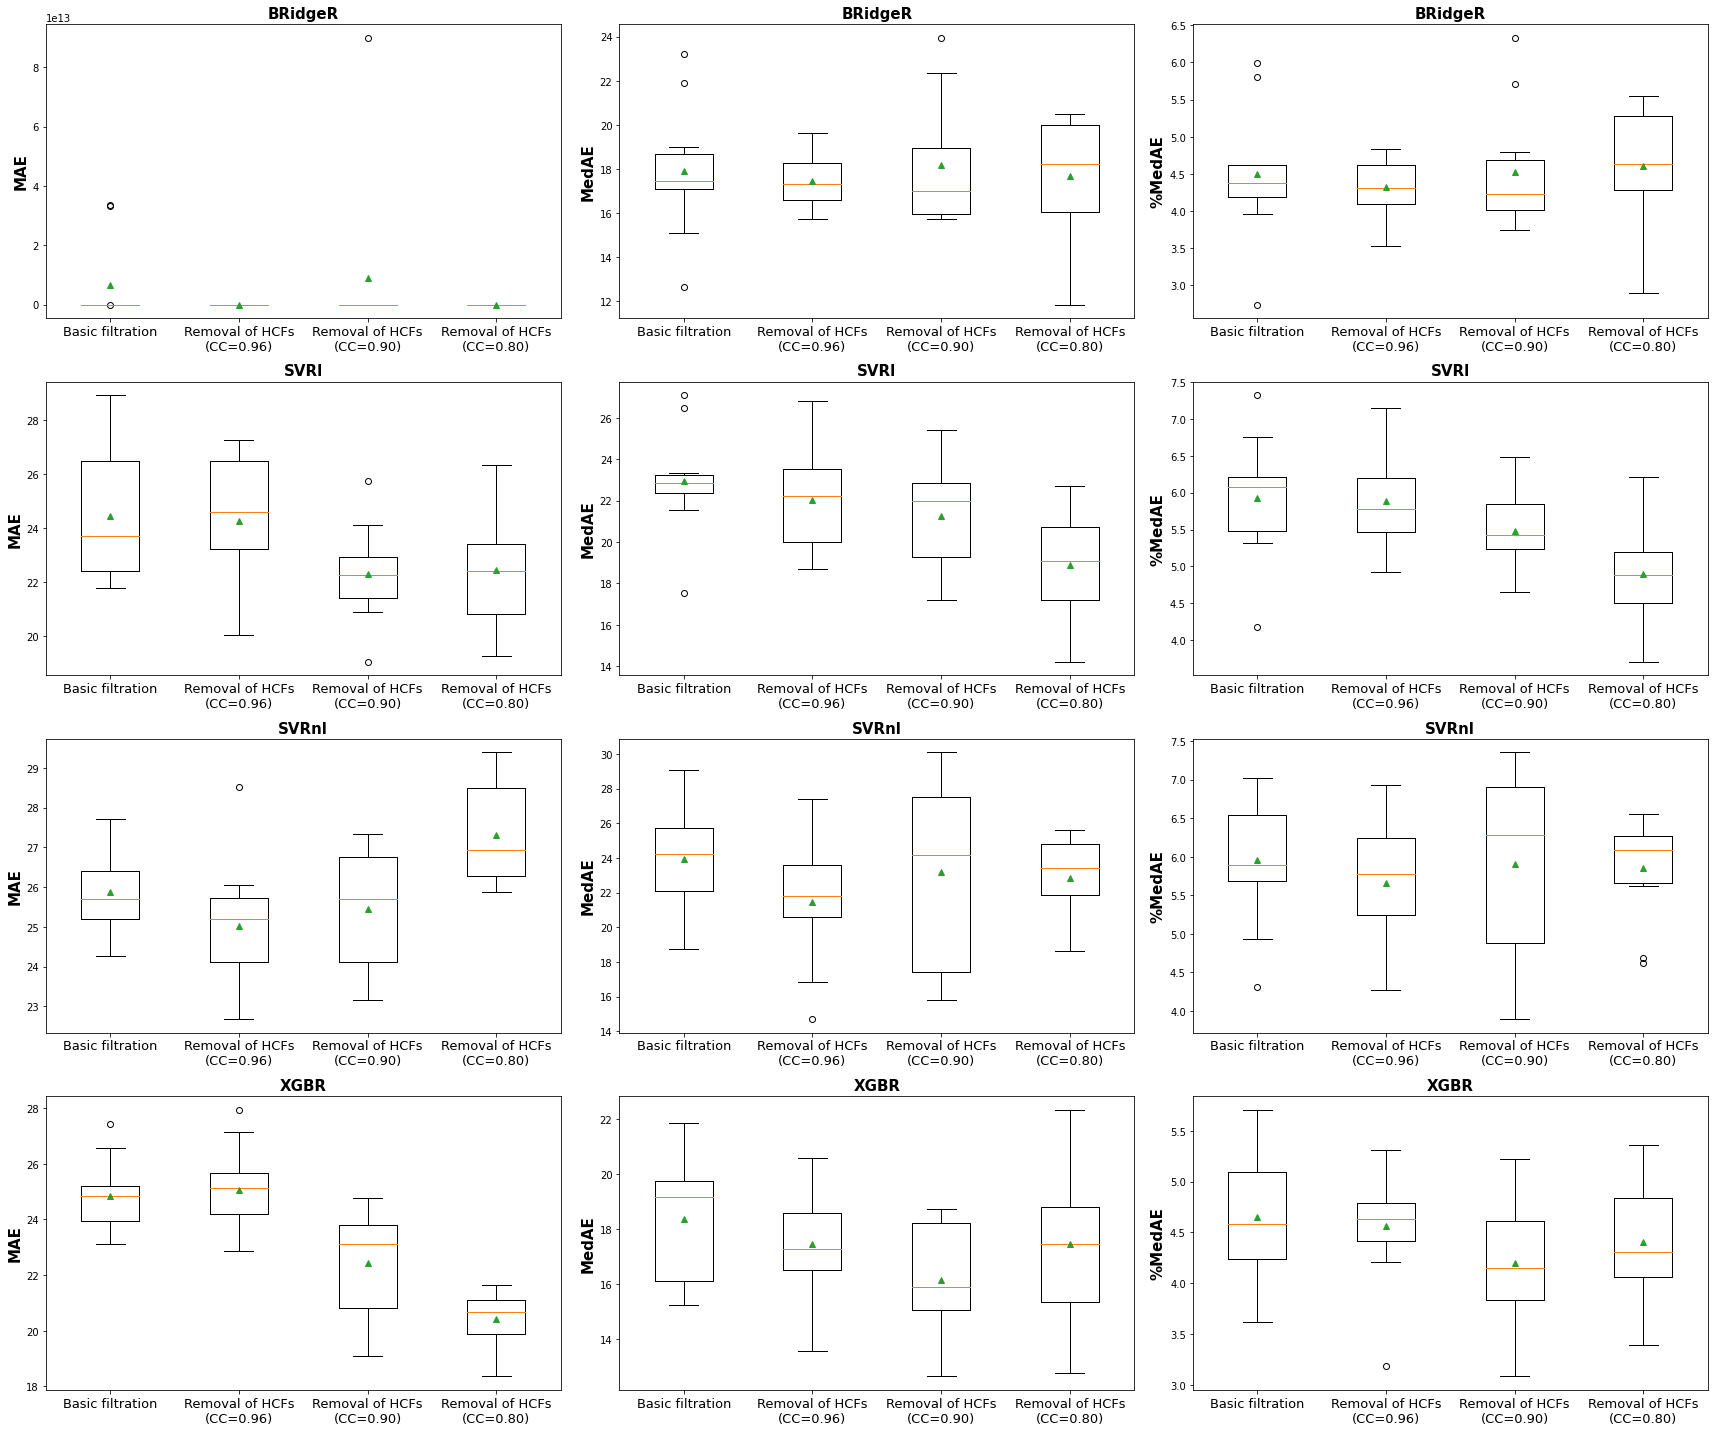

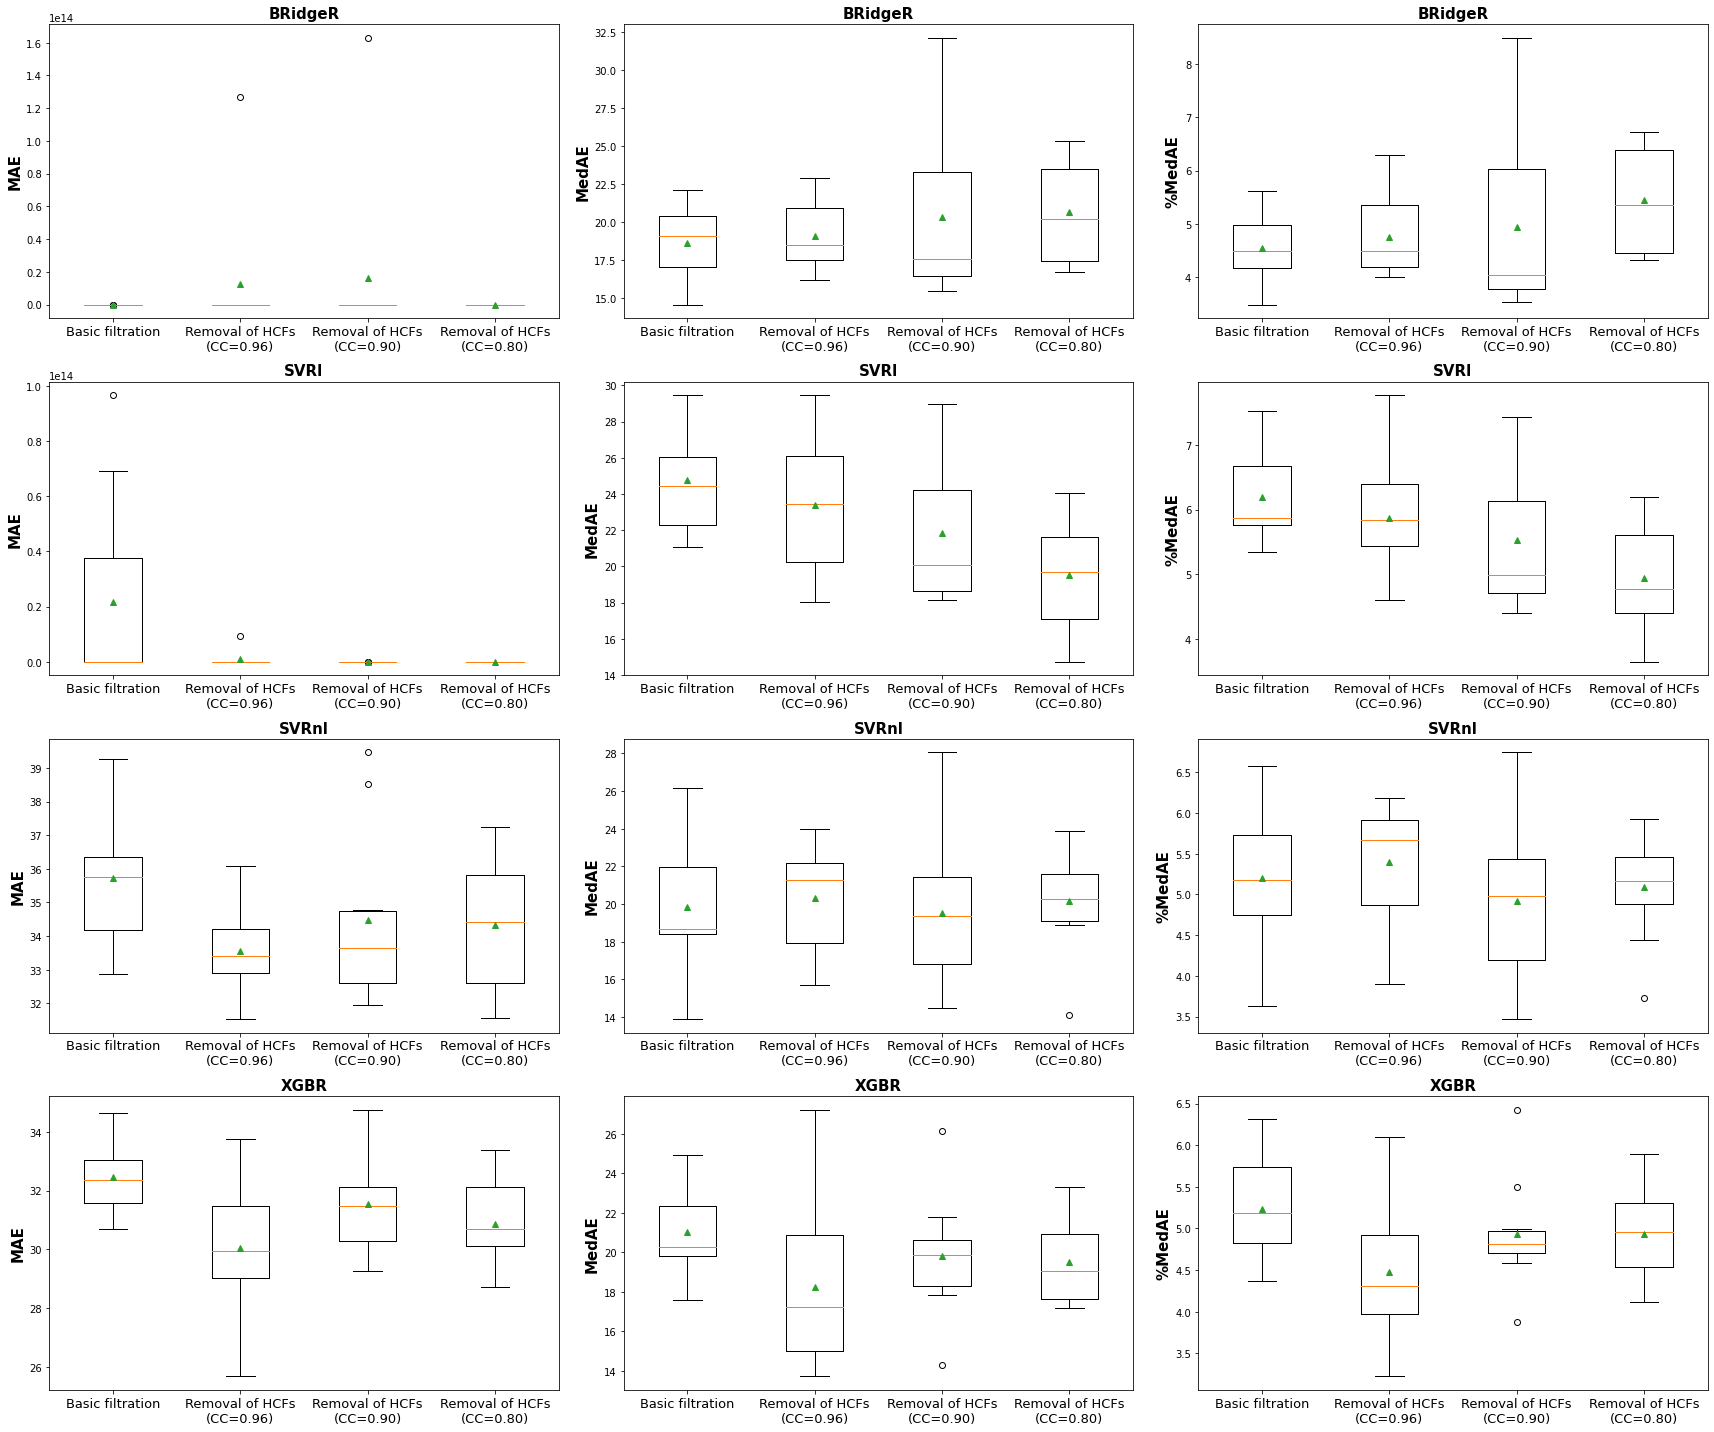

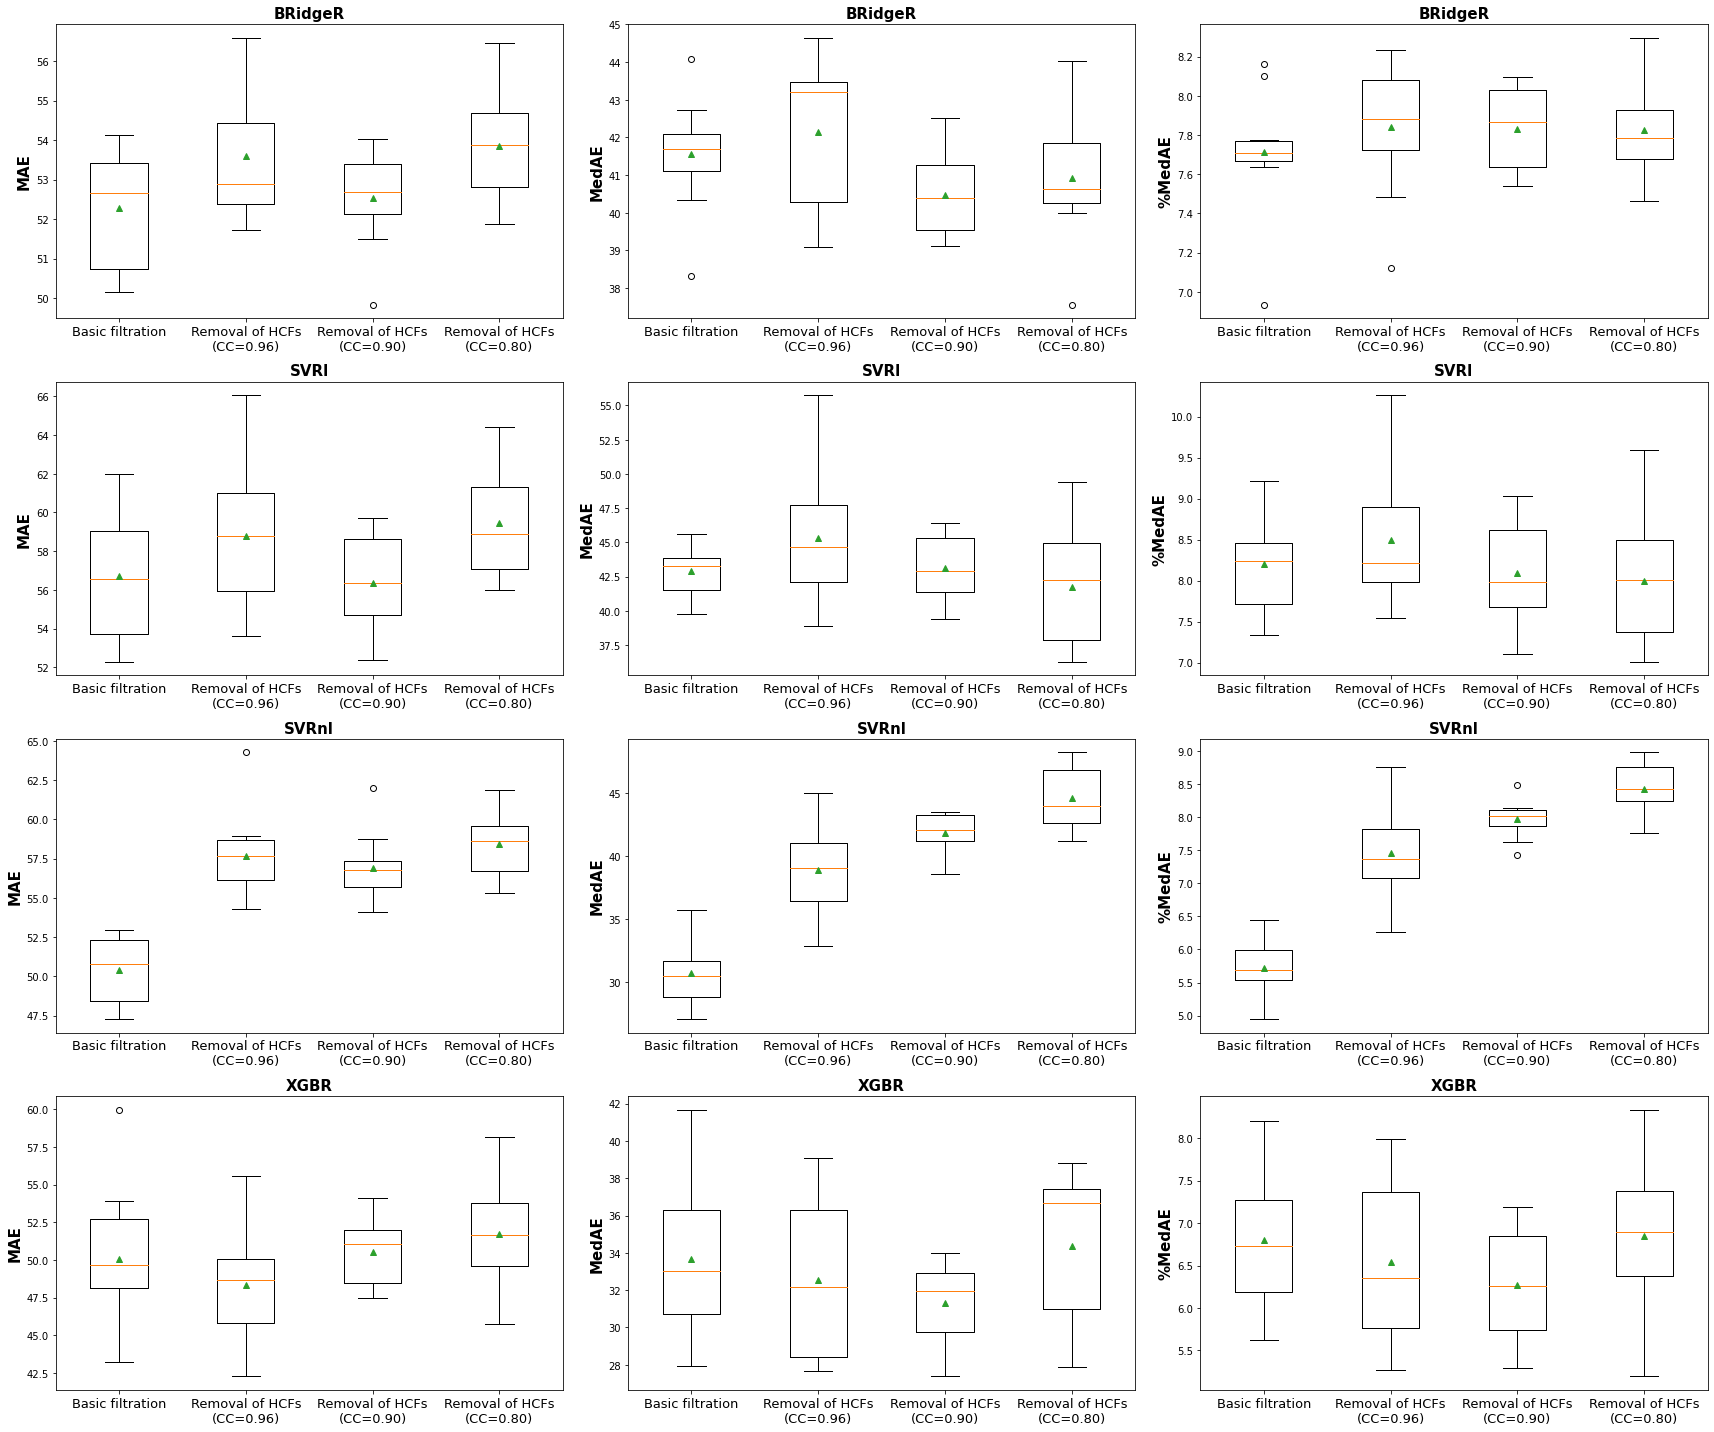

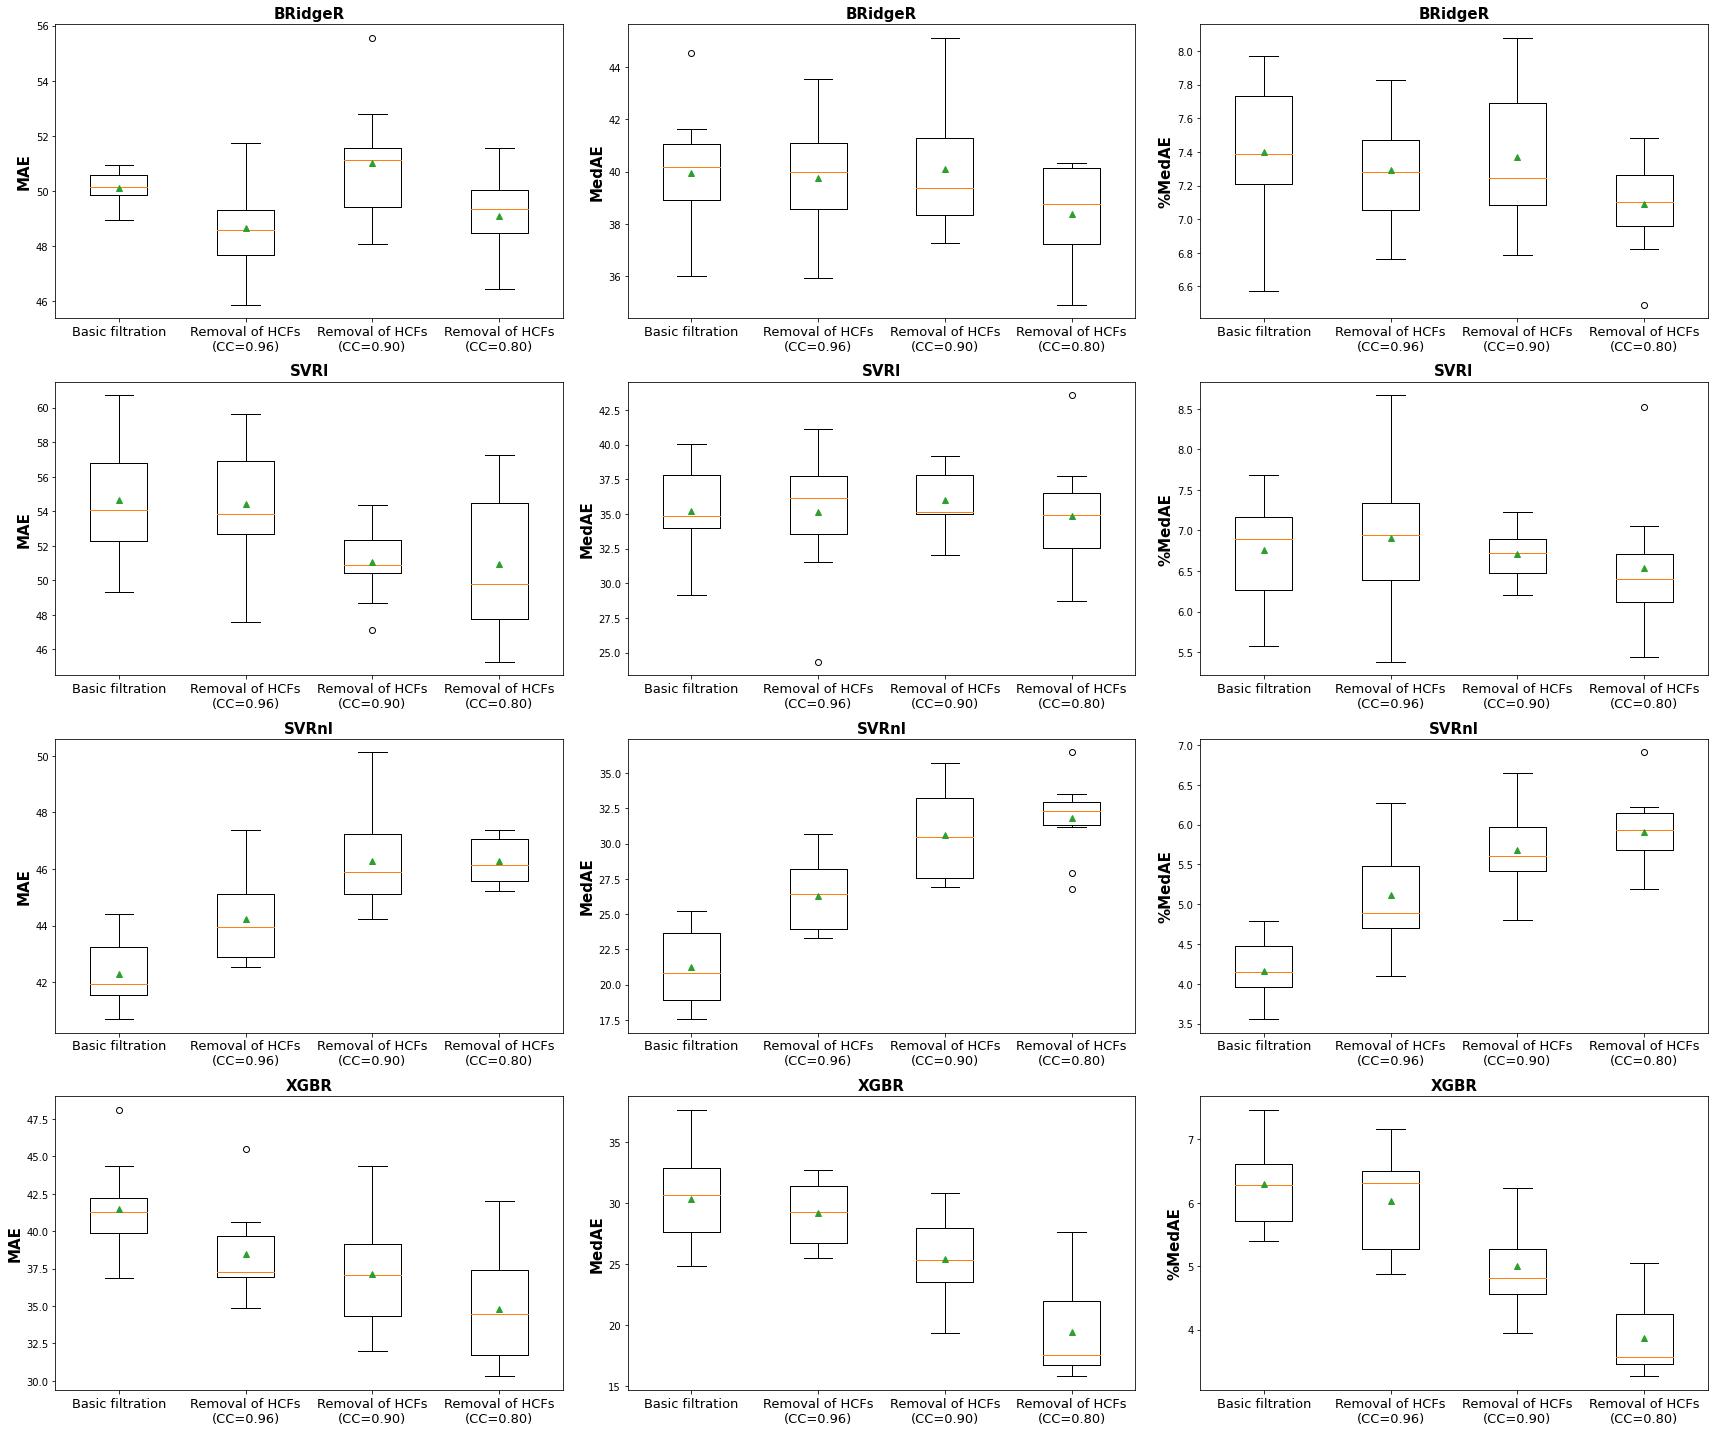

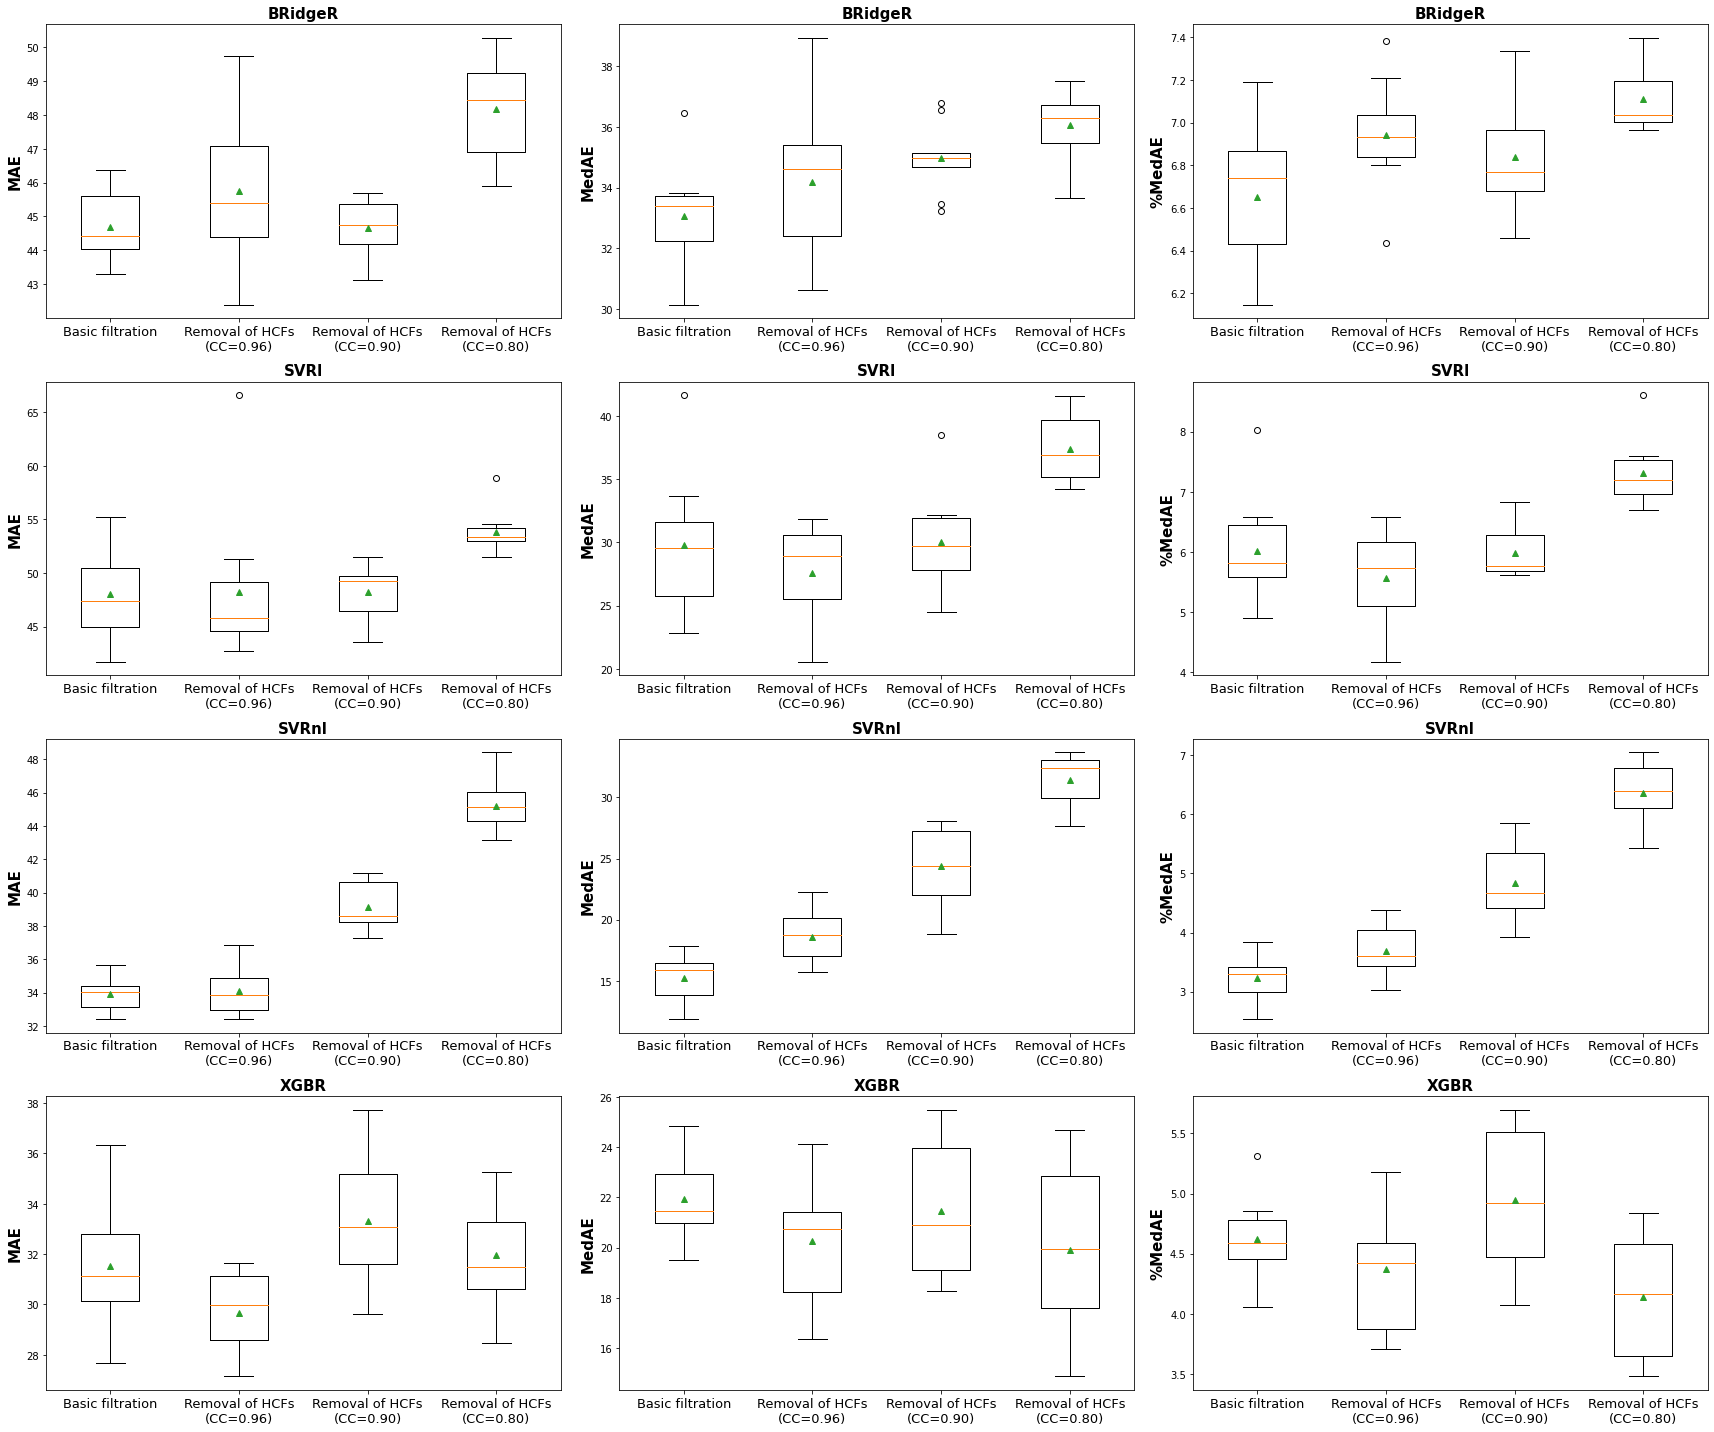

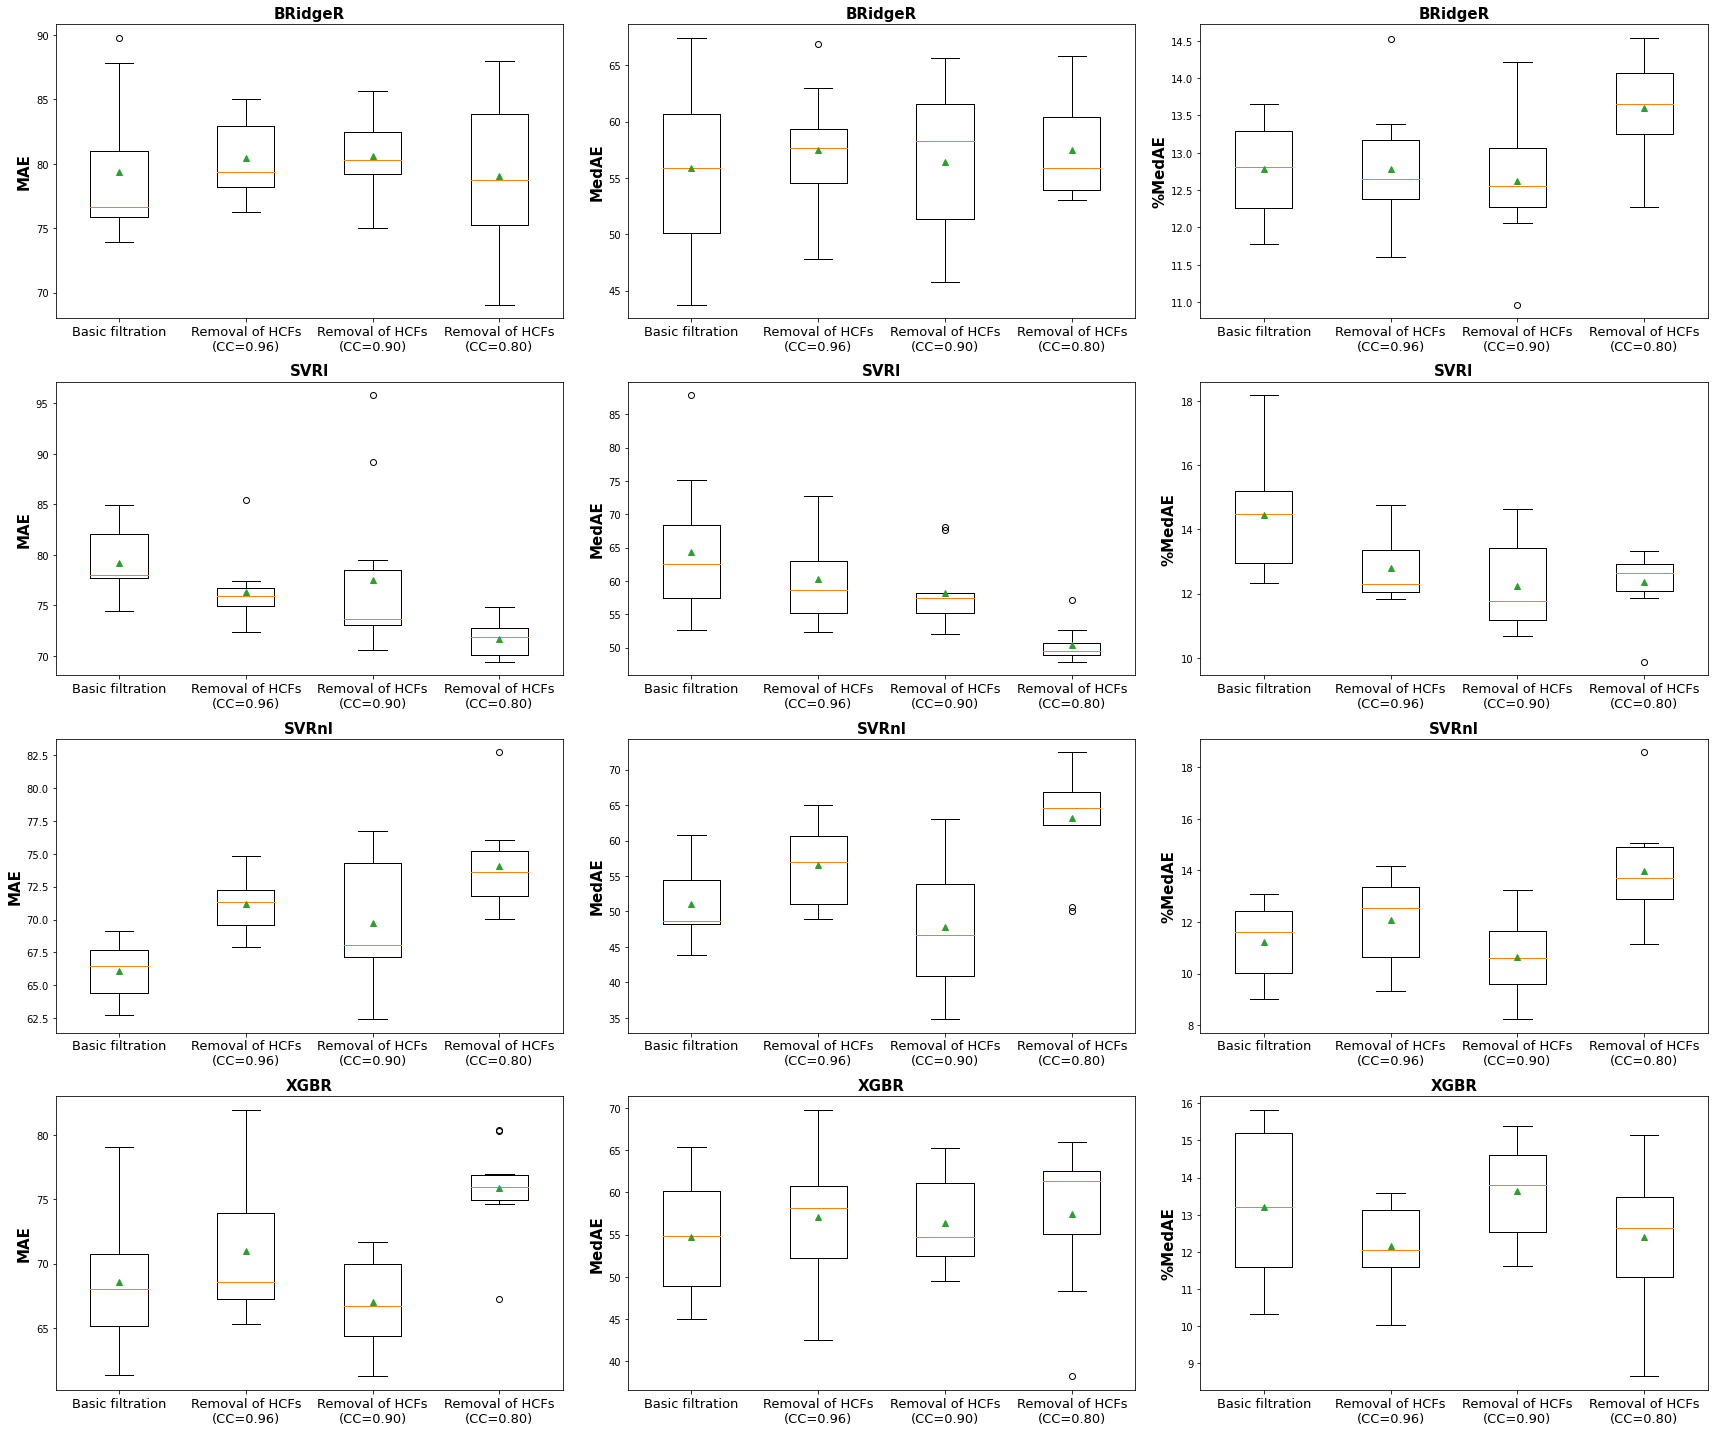

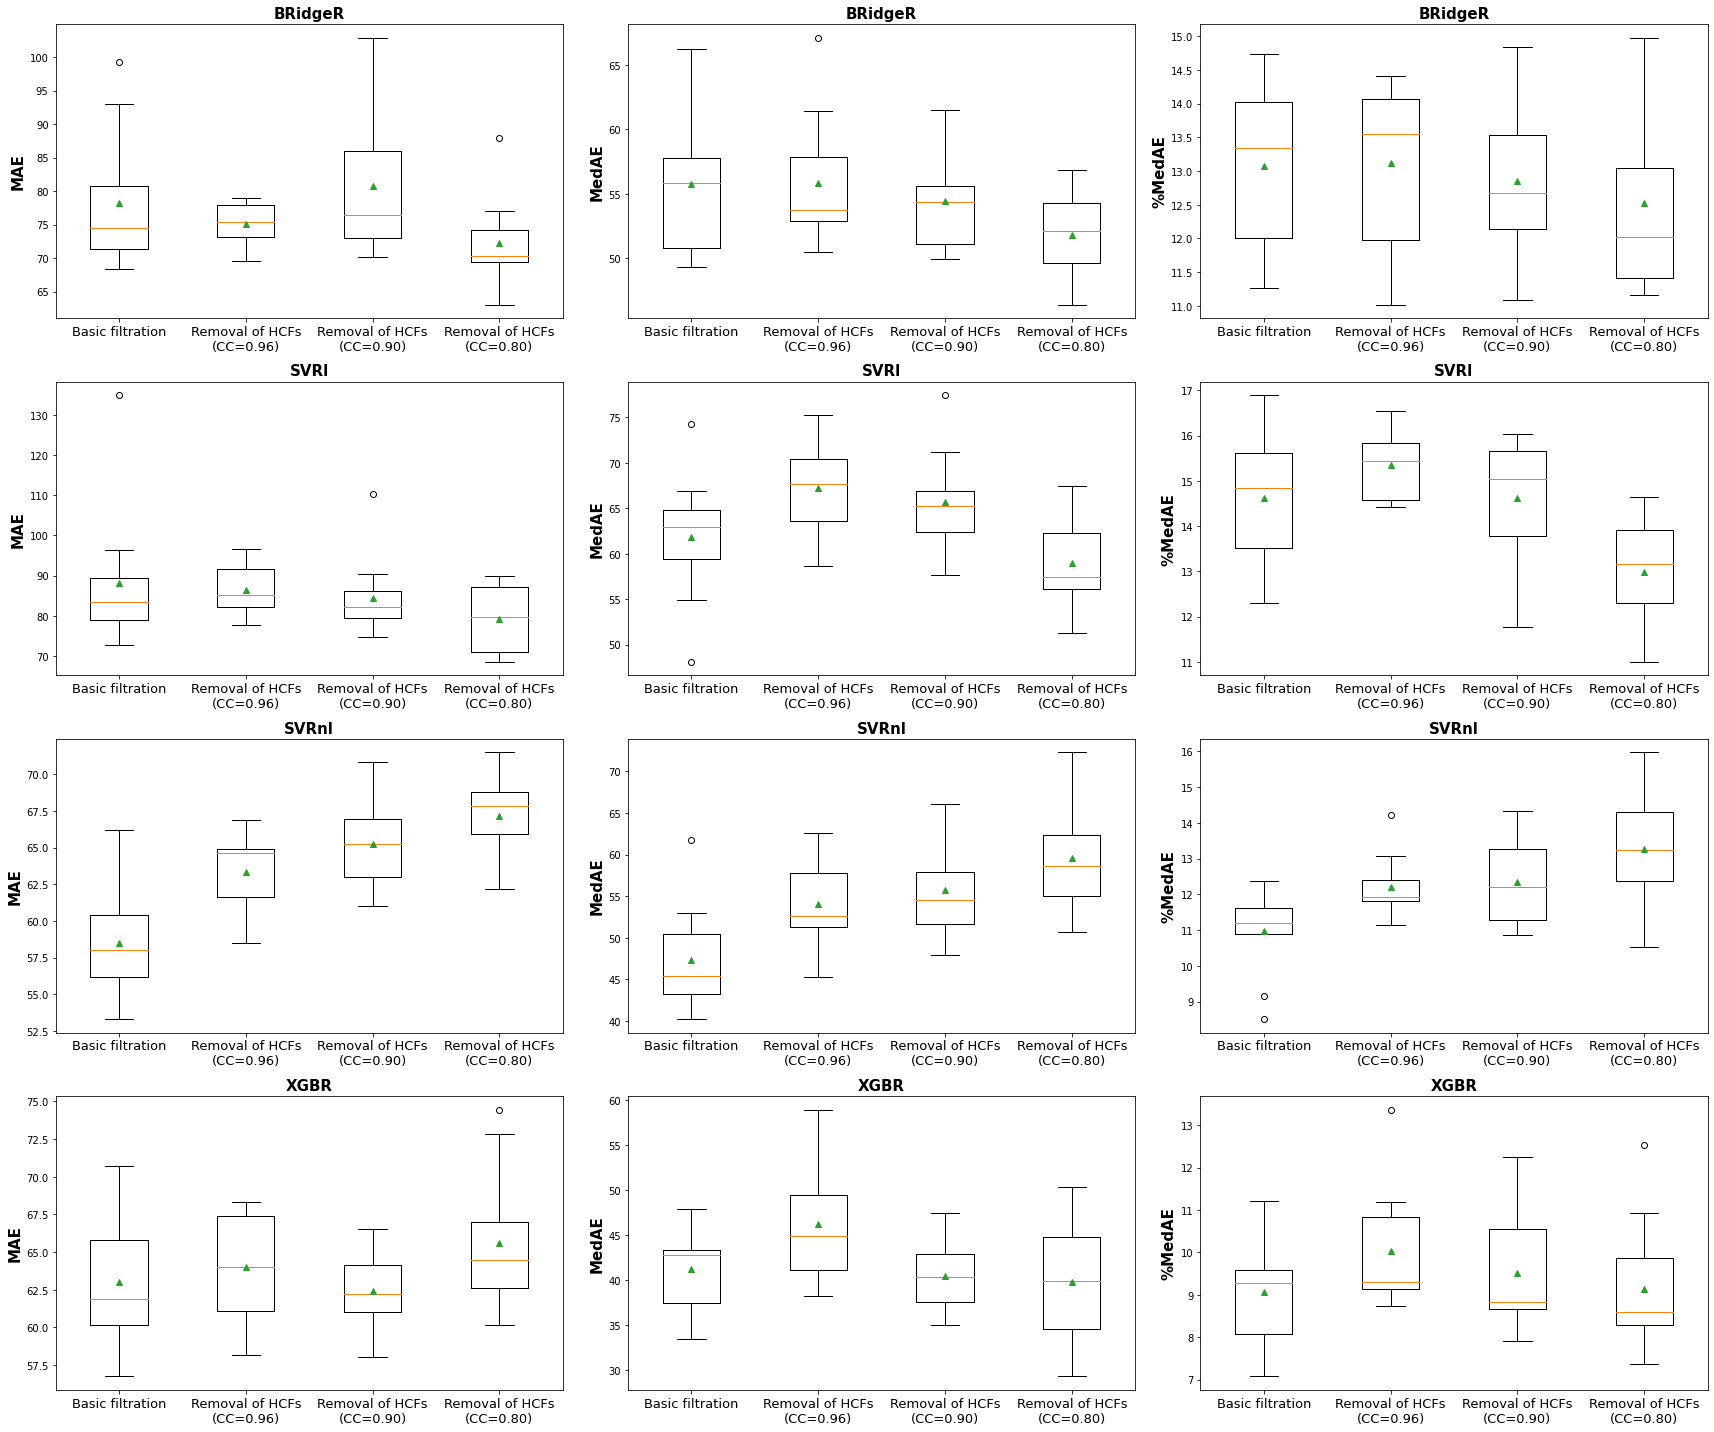

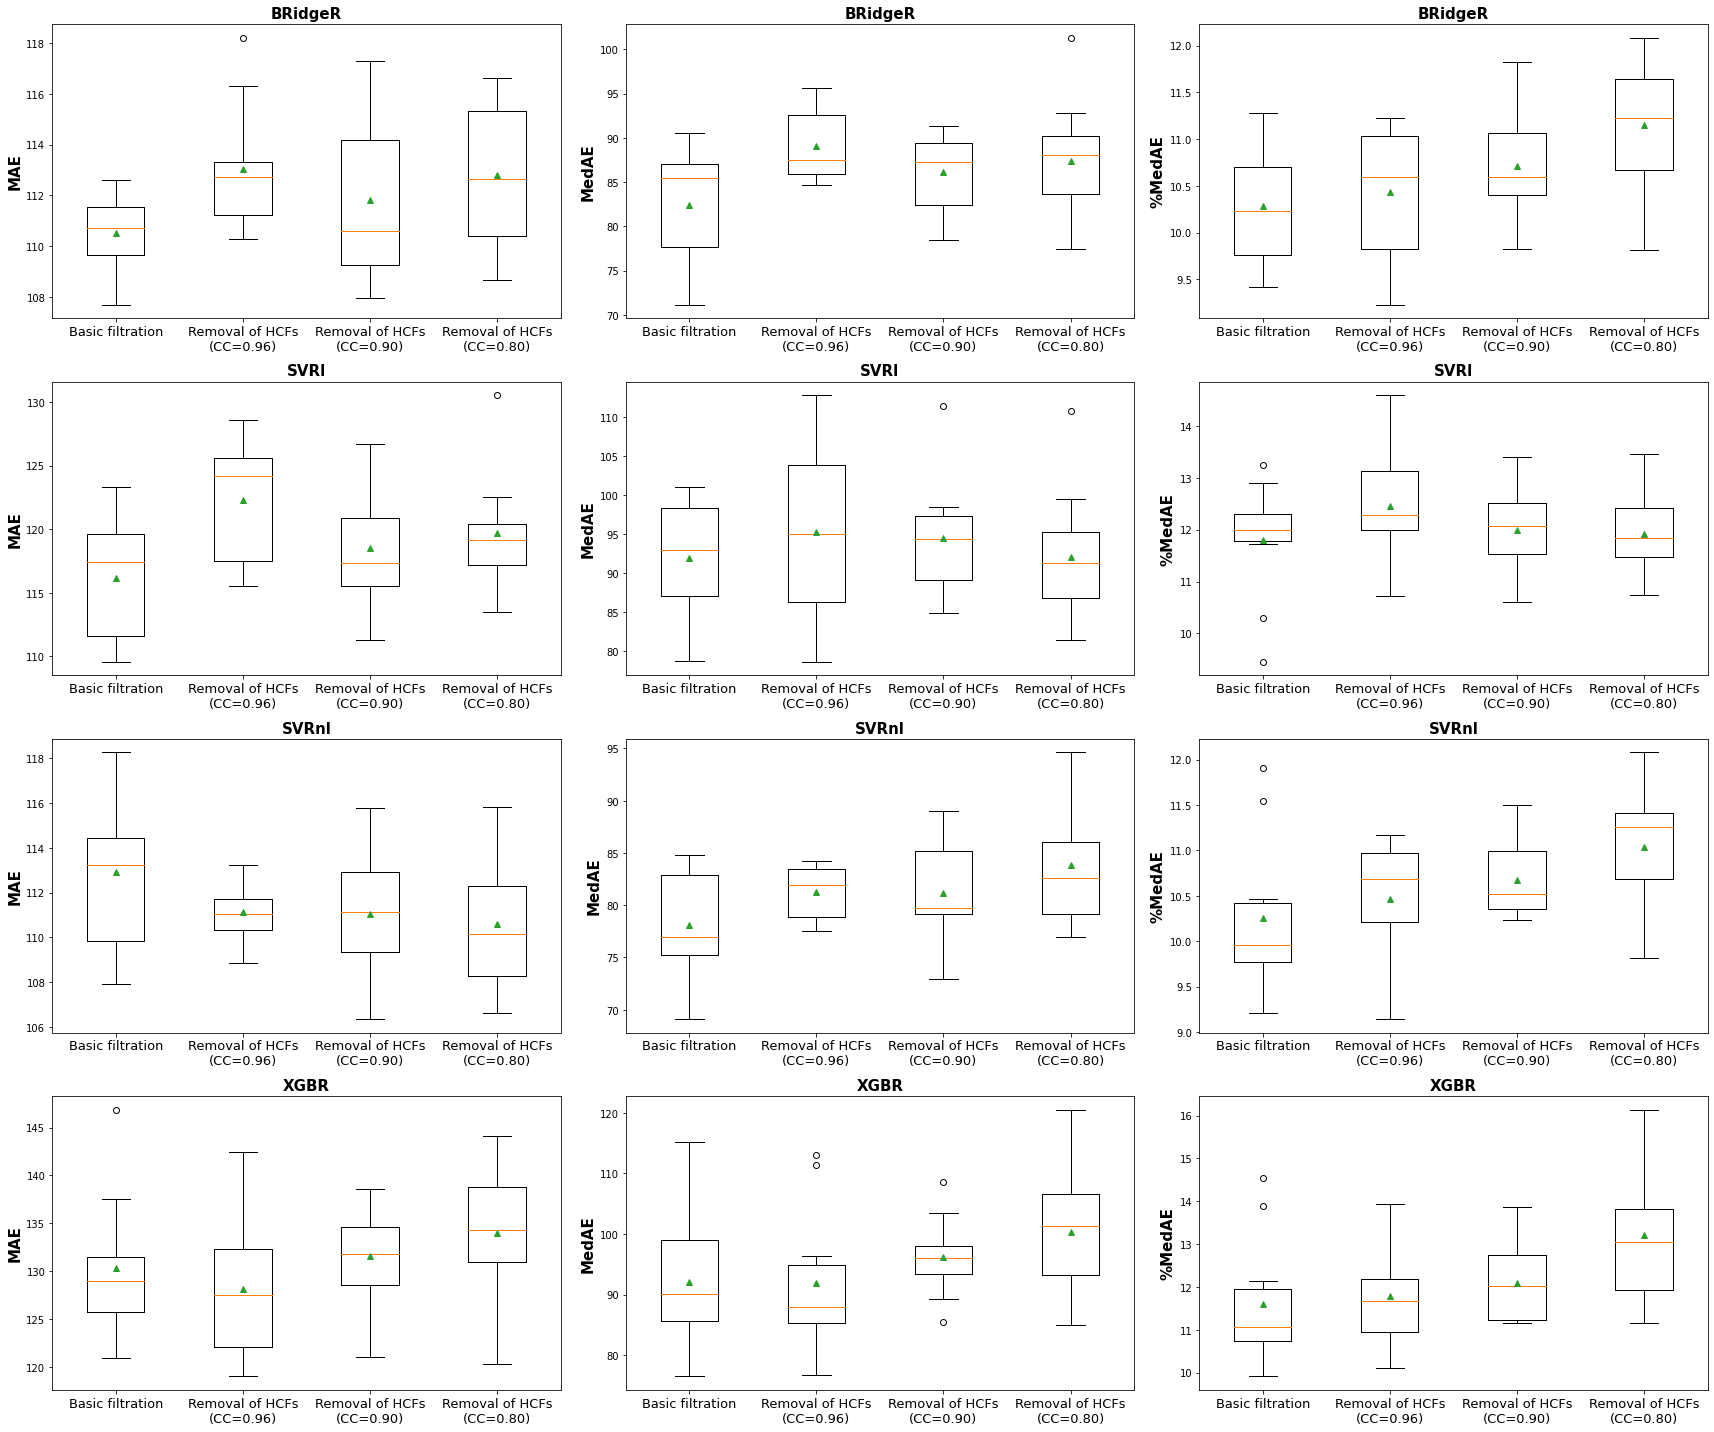

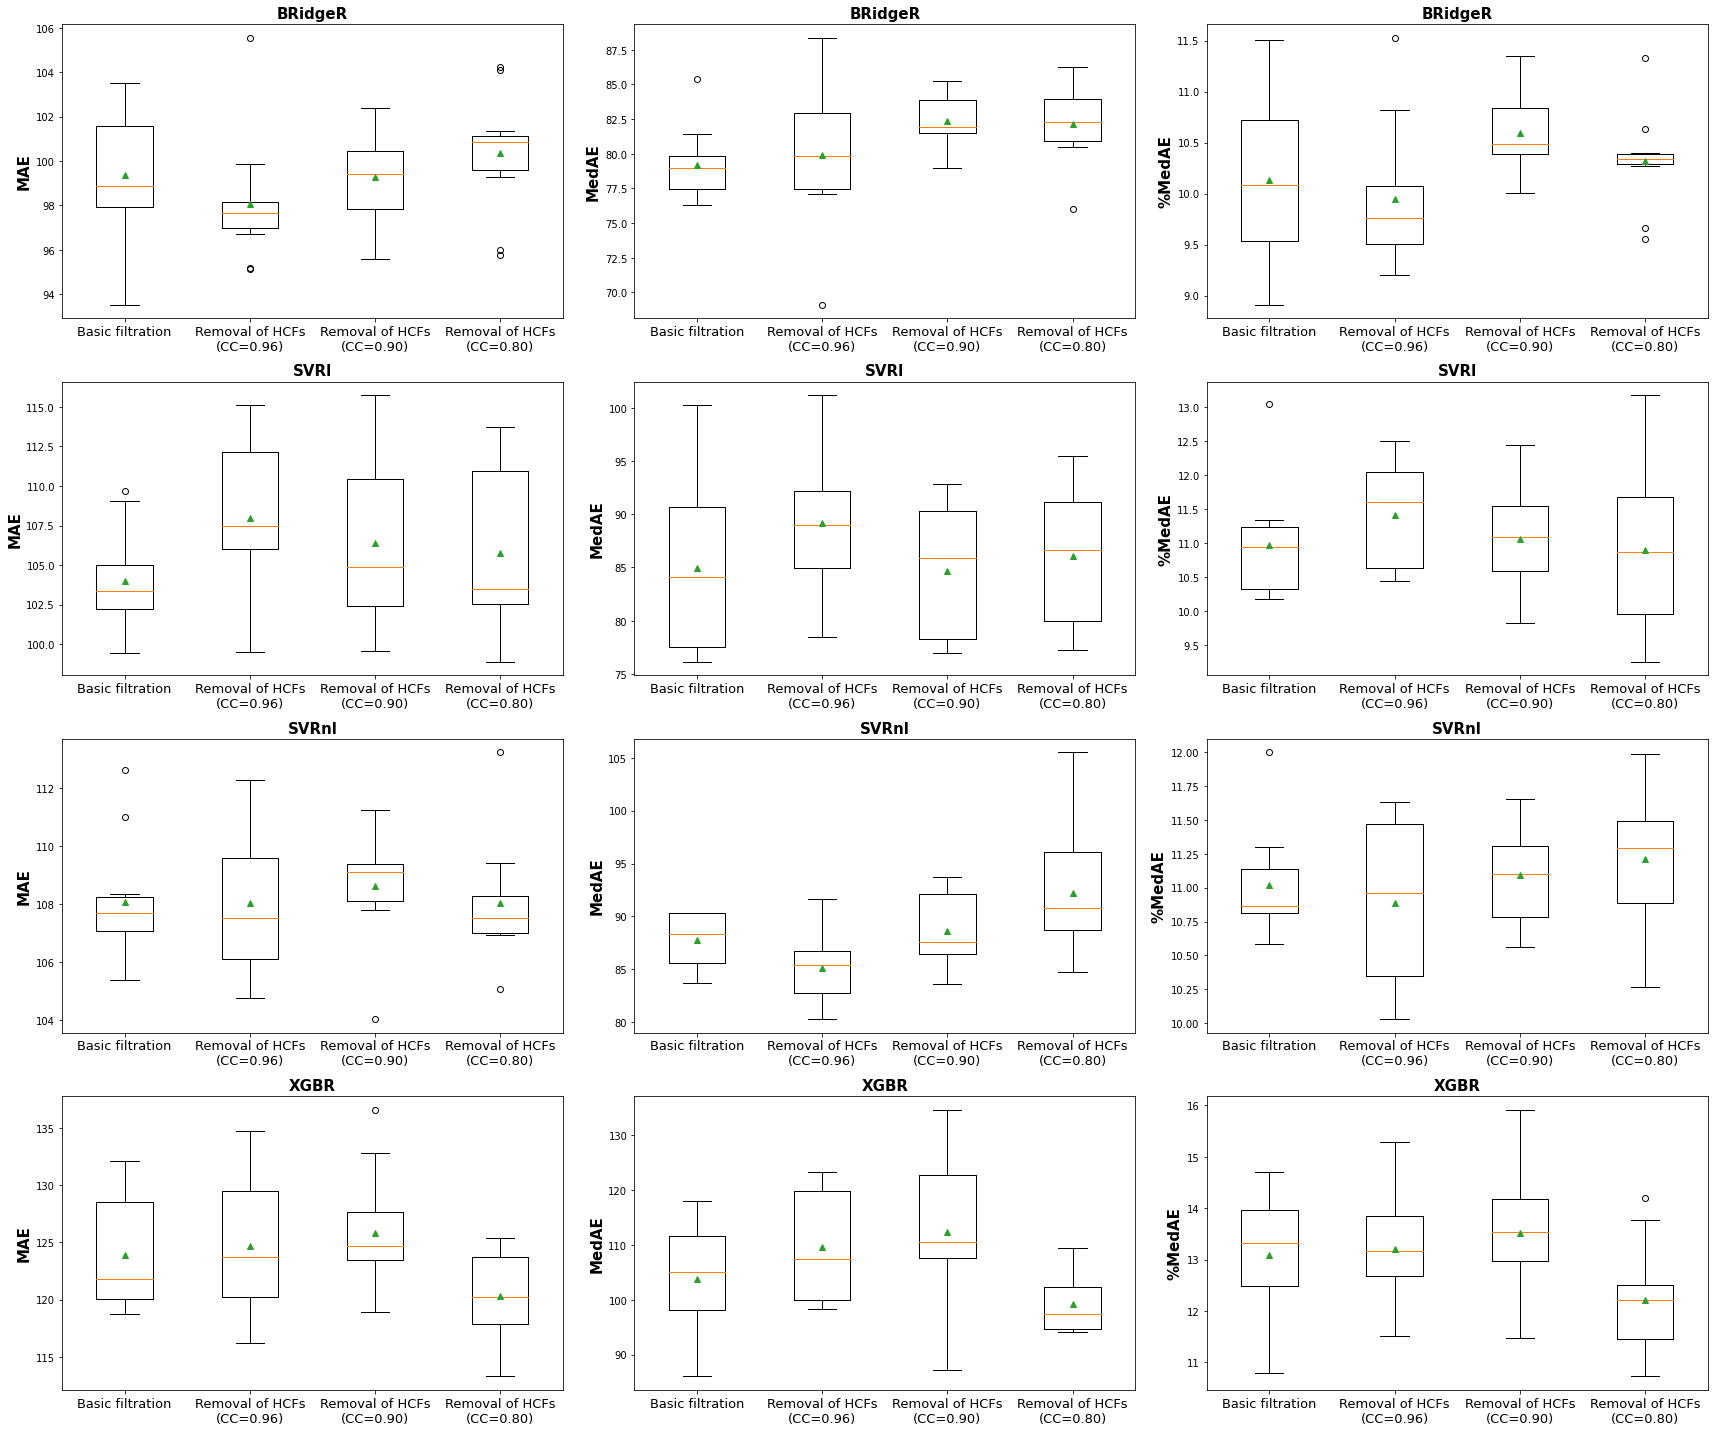

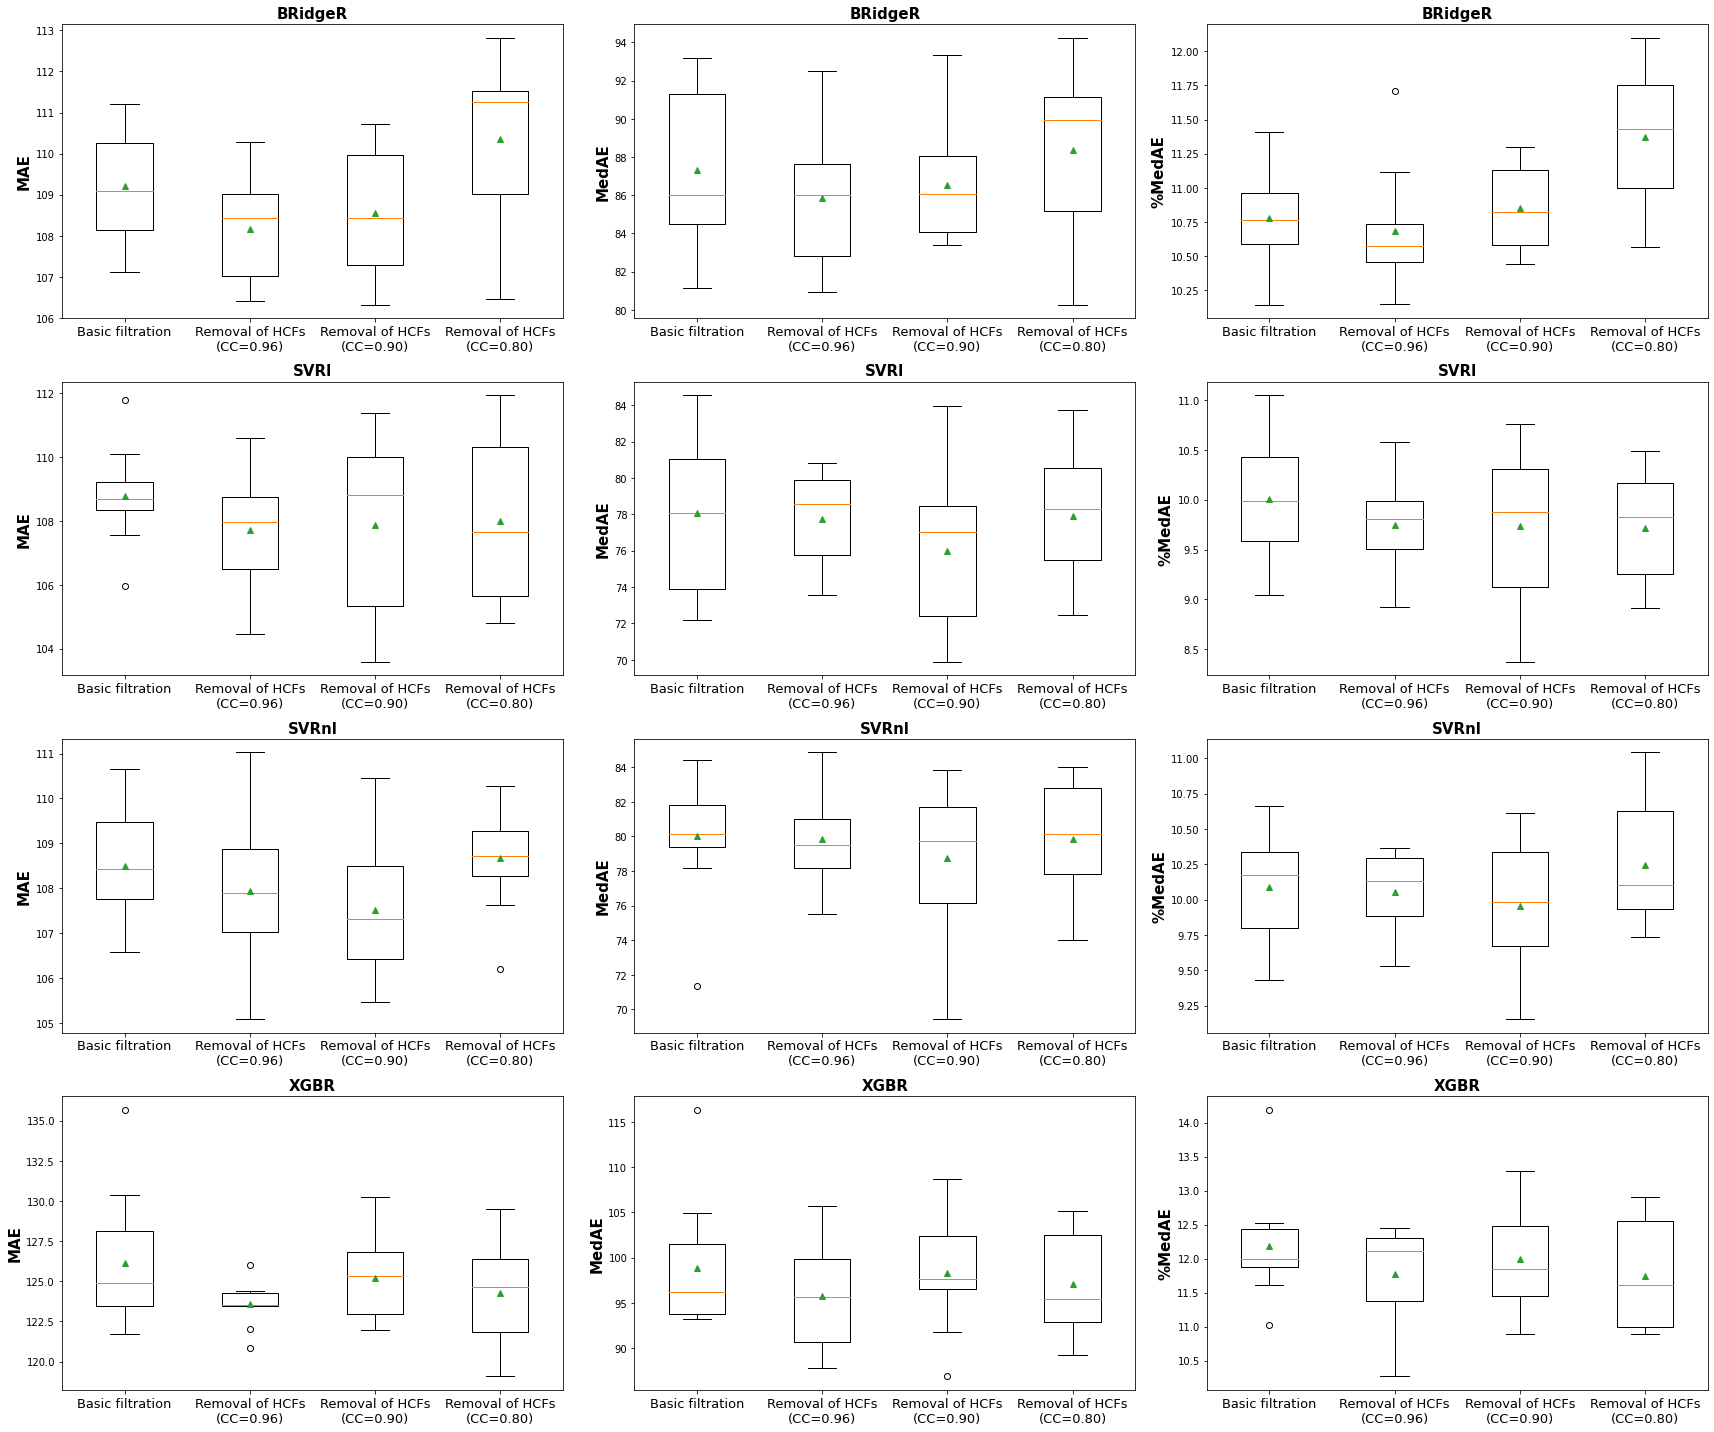

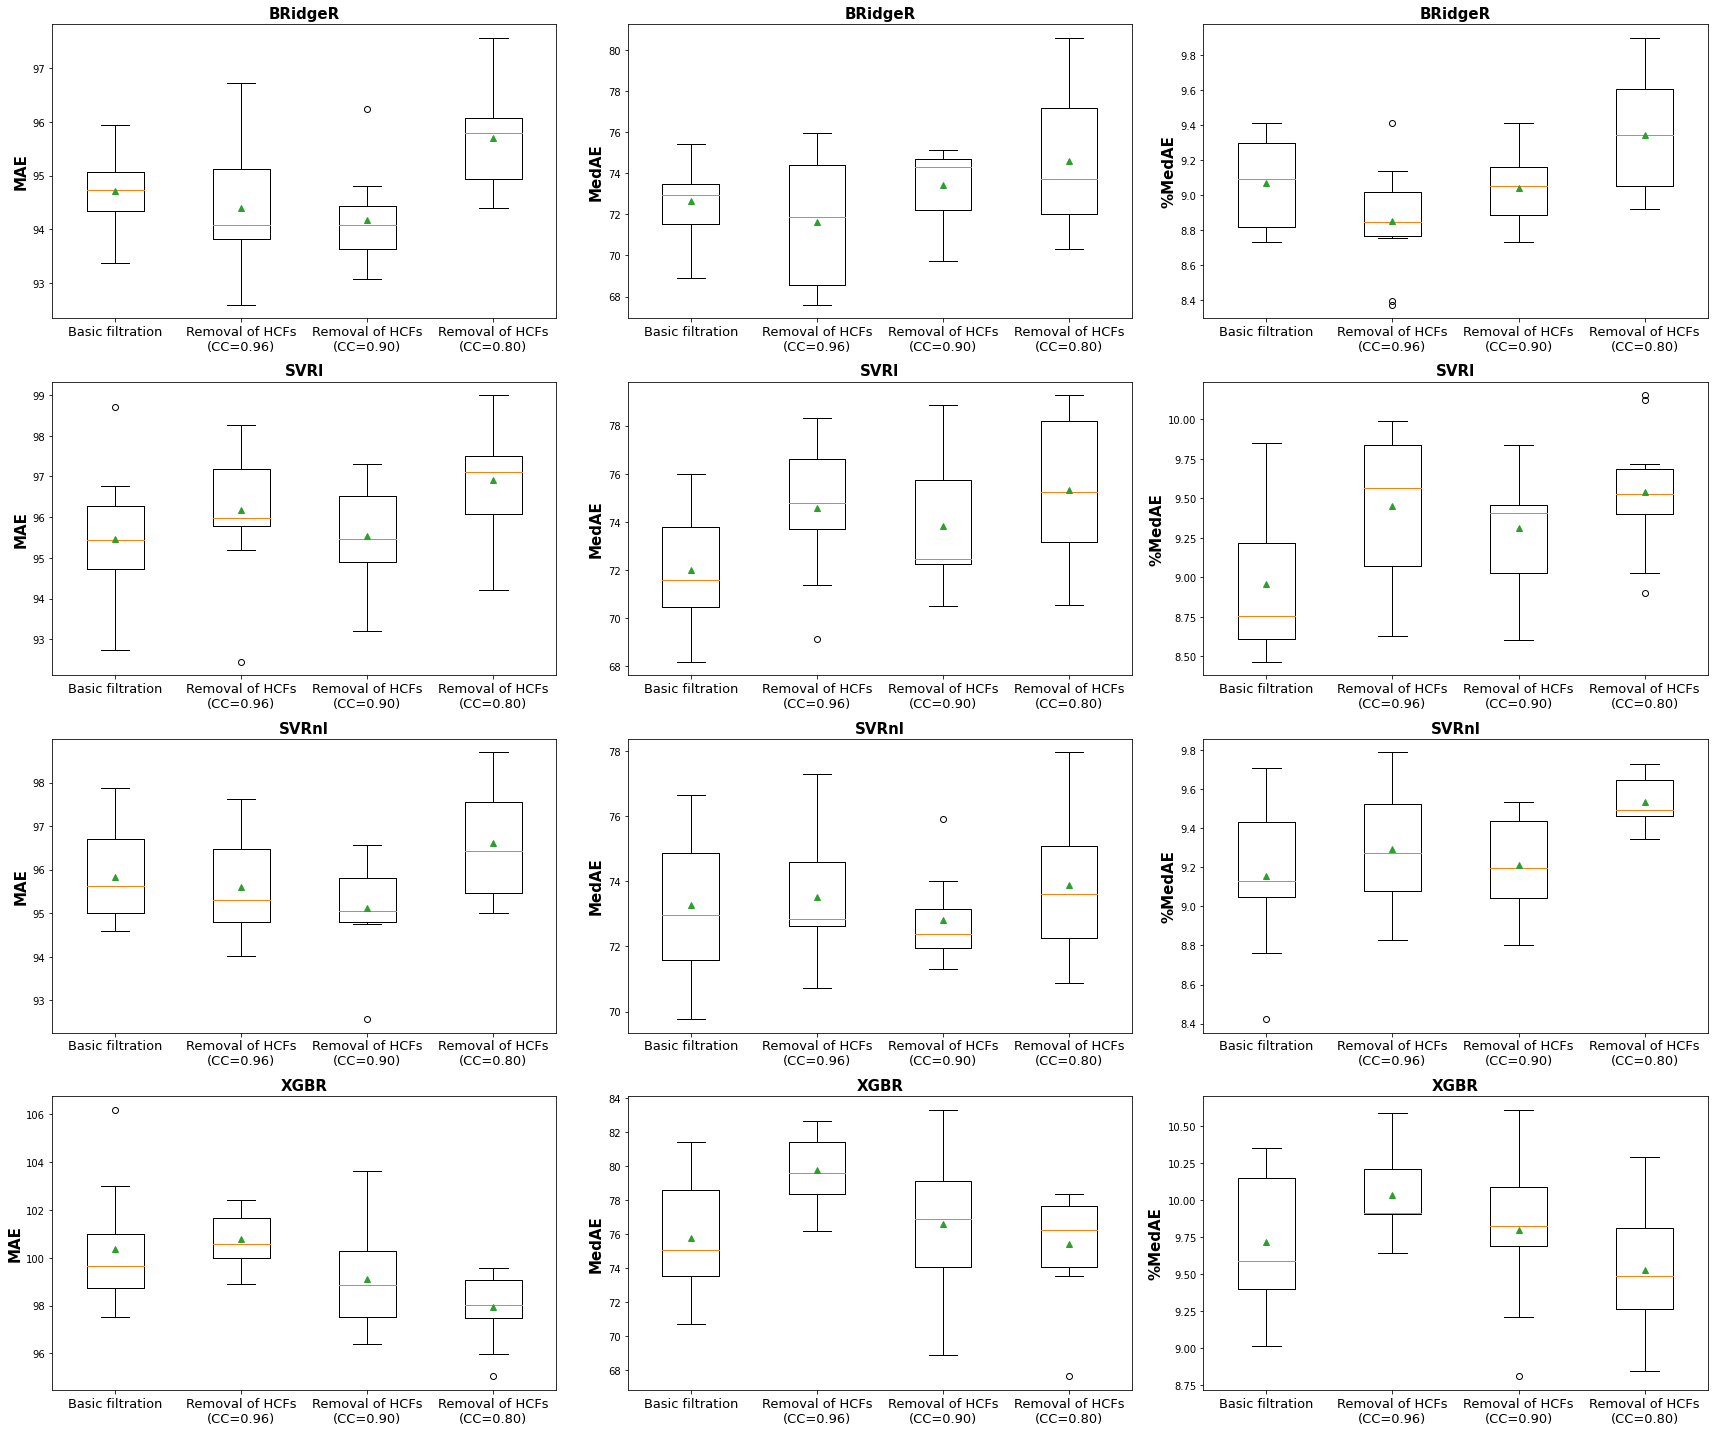

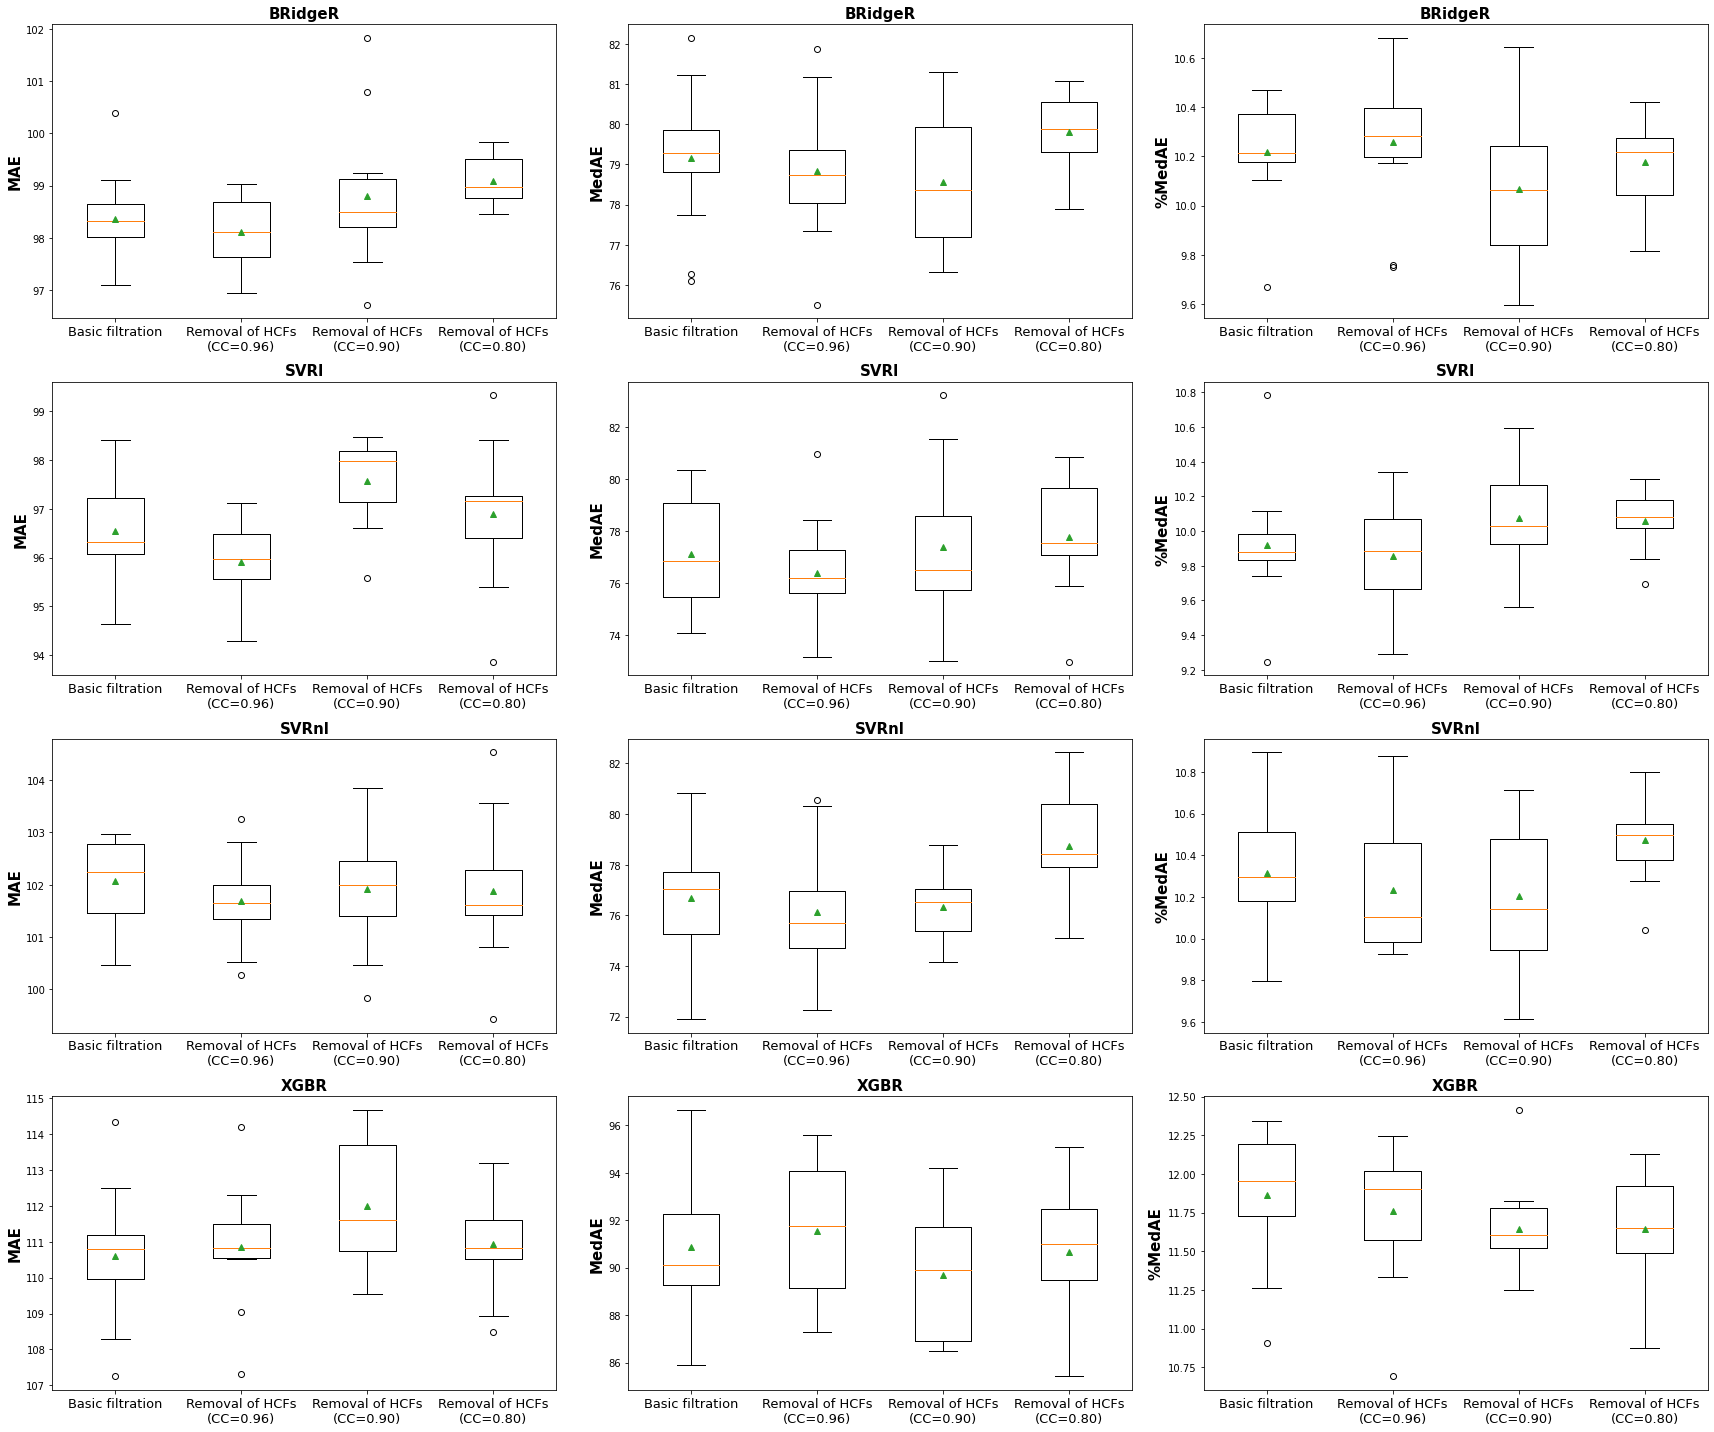

In [37]:
# Create comparative boxplots for all conditions
da.comparative_metric_boxplots(show_plot=True)

#### Store resulting dictionary to a single excel file

In [22]:
# Export dict with boxplots figures to a multisheet excel file
# Each sheet corresponds to a specific dataset
bxp_fn = 'QSRR_models_performance_comparative_BoxPlots.xlsx'
bxp_lnk = os.path.join(res_stat_dir, bxp_fn)
da.export_plots_dict_to_file(plots_dic=da.comparative_boxplots_dic, store_link=bxp_lnk, kl=1)

#### 4.2.3 Kruskal-Wallis non parametric test
Performs the specific statistical test for each combination of dataset-algorithm-metric compares algorithms' performance values (all iterations) on all datasets' configurations, using the *kruskal_wallis_test()* function<br>
H0: The median values of all groups are equal<br>
Creates the kruskal_wallis_dic dictionary with the returned p-values, computed for each condition<br>

In [23]:
# Perform K-W test
# Returns a dictionary with only p-values for each condition
da.kruskal_wallis_test(dropna=False, fillna='median')

#### Plot resulting p-values dictionary to a single HeatMap plot

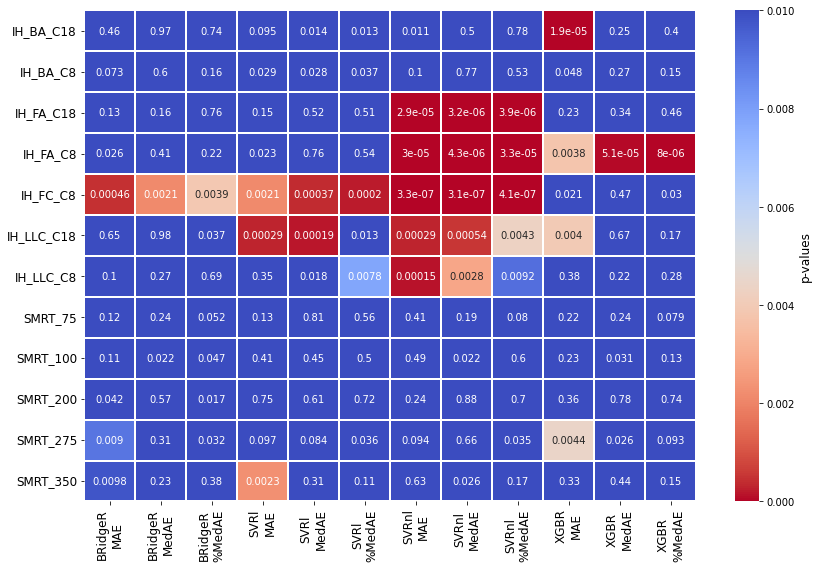

In [24]:
# Plot Kruskal_Wallis test results (p-values) as a heatmap plot and store it on disk
a = 0.01
hmp_fn = 'Kruskal_Wallis_heatmap_(a=%s).tiff'%a
hmp_lnk = os.path.join(res_stat_dir, hmp_fn)
da.kruskal_wallis_heatmap_plot(store_link=hmp_lnk, a=a, show_plot=True)

#### 4.2.4 Dunn's post-hoc test with Bonferroni adjustment
Conducts the specific statistical test for each combination of dataset-algorithm-metric found to be statistical important by K-W test, using the *bonferroni_post_hoc_test()* function<br>
Dunn's post-hoc test performs pairwise analysis of all groups applying Bonferroni adjustment for multiple comparisons<br>
Only interest to compare 'CC1' datasets' configuration against all others<br>
Creates the bonferroni_post_hoc_df dataframe with the returned p-values<br>

In [25]:
# Perform Dunn's test
da.bonferroni_post_hoc_test(a=a, p_adjust='bonferroni')

#### Plot resulting p-values dictionary to a single HeatMap plot

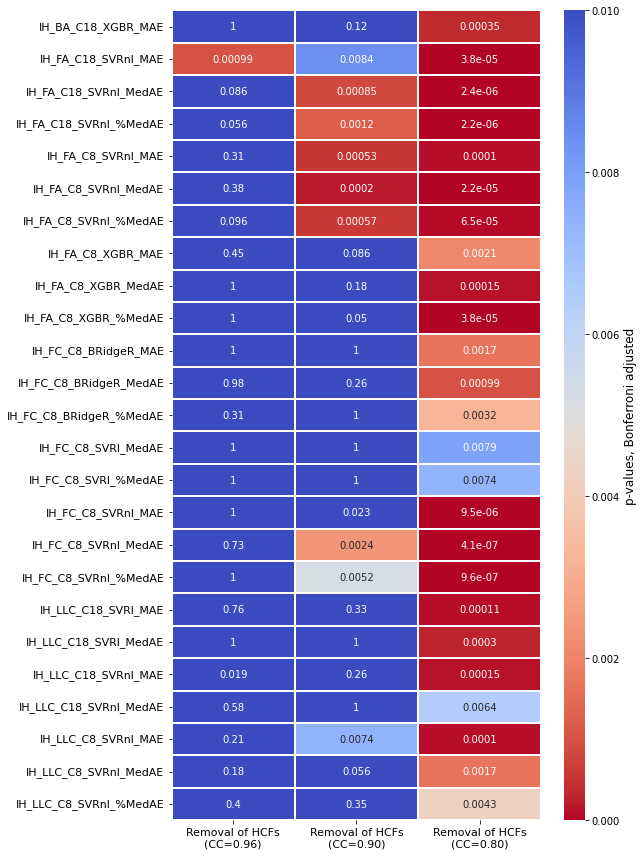

In [26]:
# Plot Bonferroni test results (p-values) as a heatmap plot and store it on disk
bon_hmp_fn = 'Bonferroni_post_hoc_test_heatmap_(a=%s).tiff'%a
bon_hmp_lnk = os.path.join(res_stat_dir, bon_hmp_fn)
da.bonferroni_test_heatmap_plot(store_link=bon_hmp_lnk, a=a, show_plot=True)

#### 4.2.5 Annotate K-W heatmap with Dunn's test results
Highlight K-W heatmap's rectangles (specific combinations of dataset-algorithm-metric) returned statistically significant results by Dunn's test, using the *highlight_kruskal_wallis_heatmap()* function

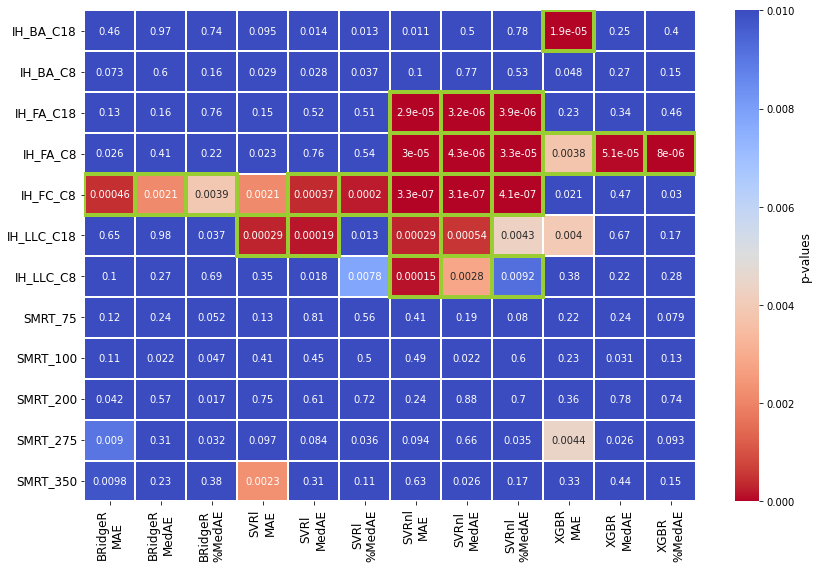

In [27]:
# Plot highlighted K-W heatmap and store it on disk
hl_kw_hmp_fn = 'Kruskal_Wallis_highlighted_heatmap_(a=%s).tiff'%a
hl_kw_hmp_lnk = os.path.join(res_stat_dir, hl_kw_hmp_fn)
da.highlight_kruskal_wallis_heatmap(store_link=hl_kw_hmp_lnk, a=a, show_plot=True)

#### 4.3 Regression-Residuals plots
Creates various types of Regression-Residuals plots for all datasets for each combination of metric-datasets' configuration, using the *create_regr_resid_plots()* function<br>
There are 3 available types of plot to choose:
 - plot_type 1: Regression plots<br>
 - plot_type 2: Single Residuals plots<br>
 - plot_type 3: Complex Residuals-Hist-QQ plots<br>

In each case only the best iteration for the best model is plotted<br>
Creates the regr_resid_plots_dic dictionary with the returned figures for each metric-datasets' configuration combination<br>

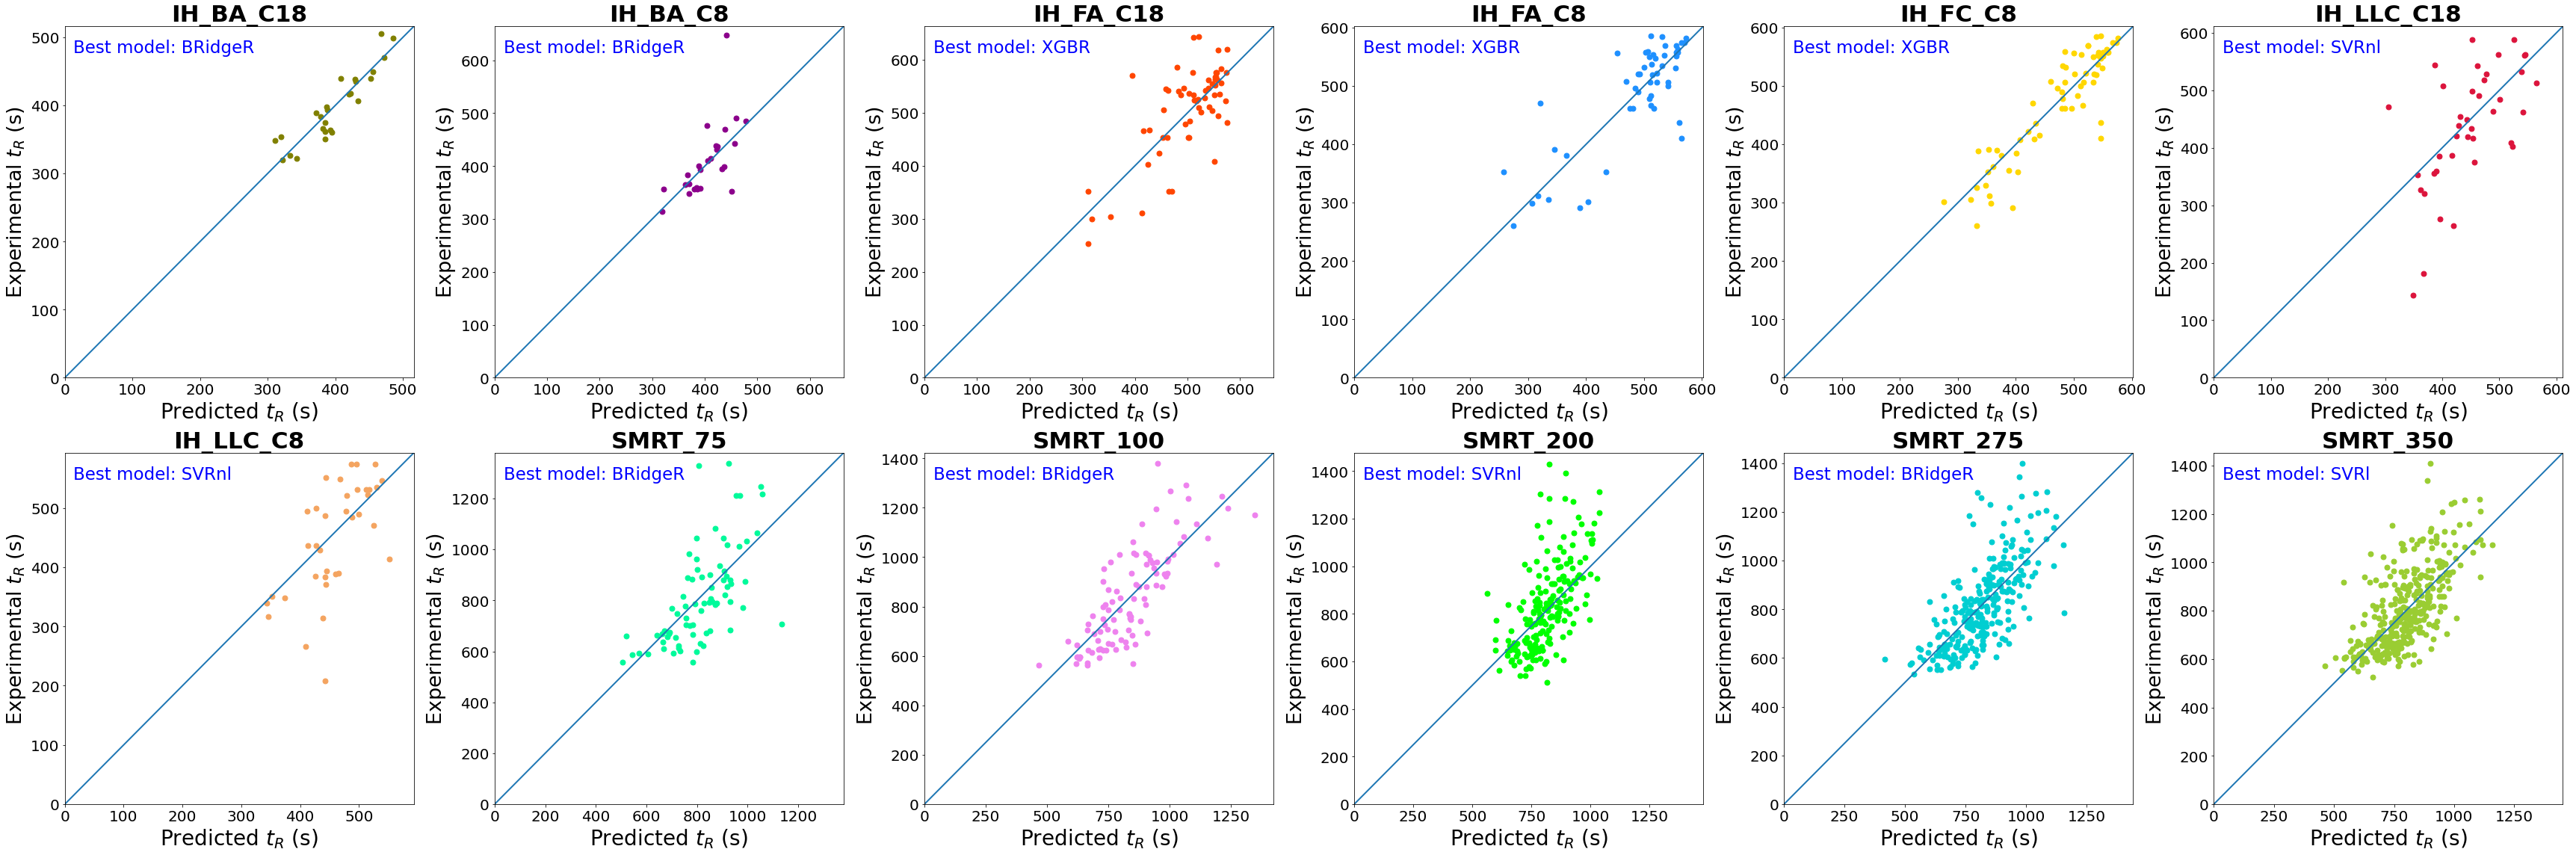

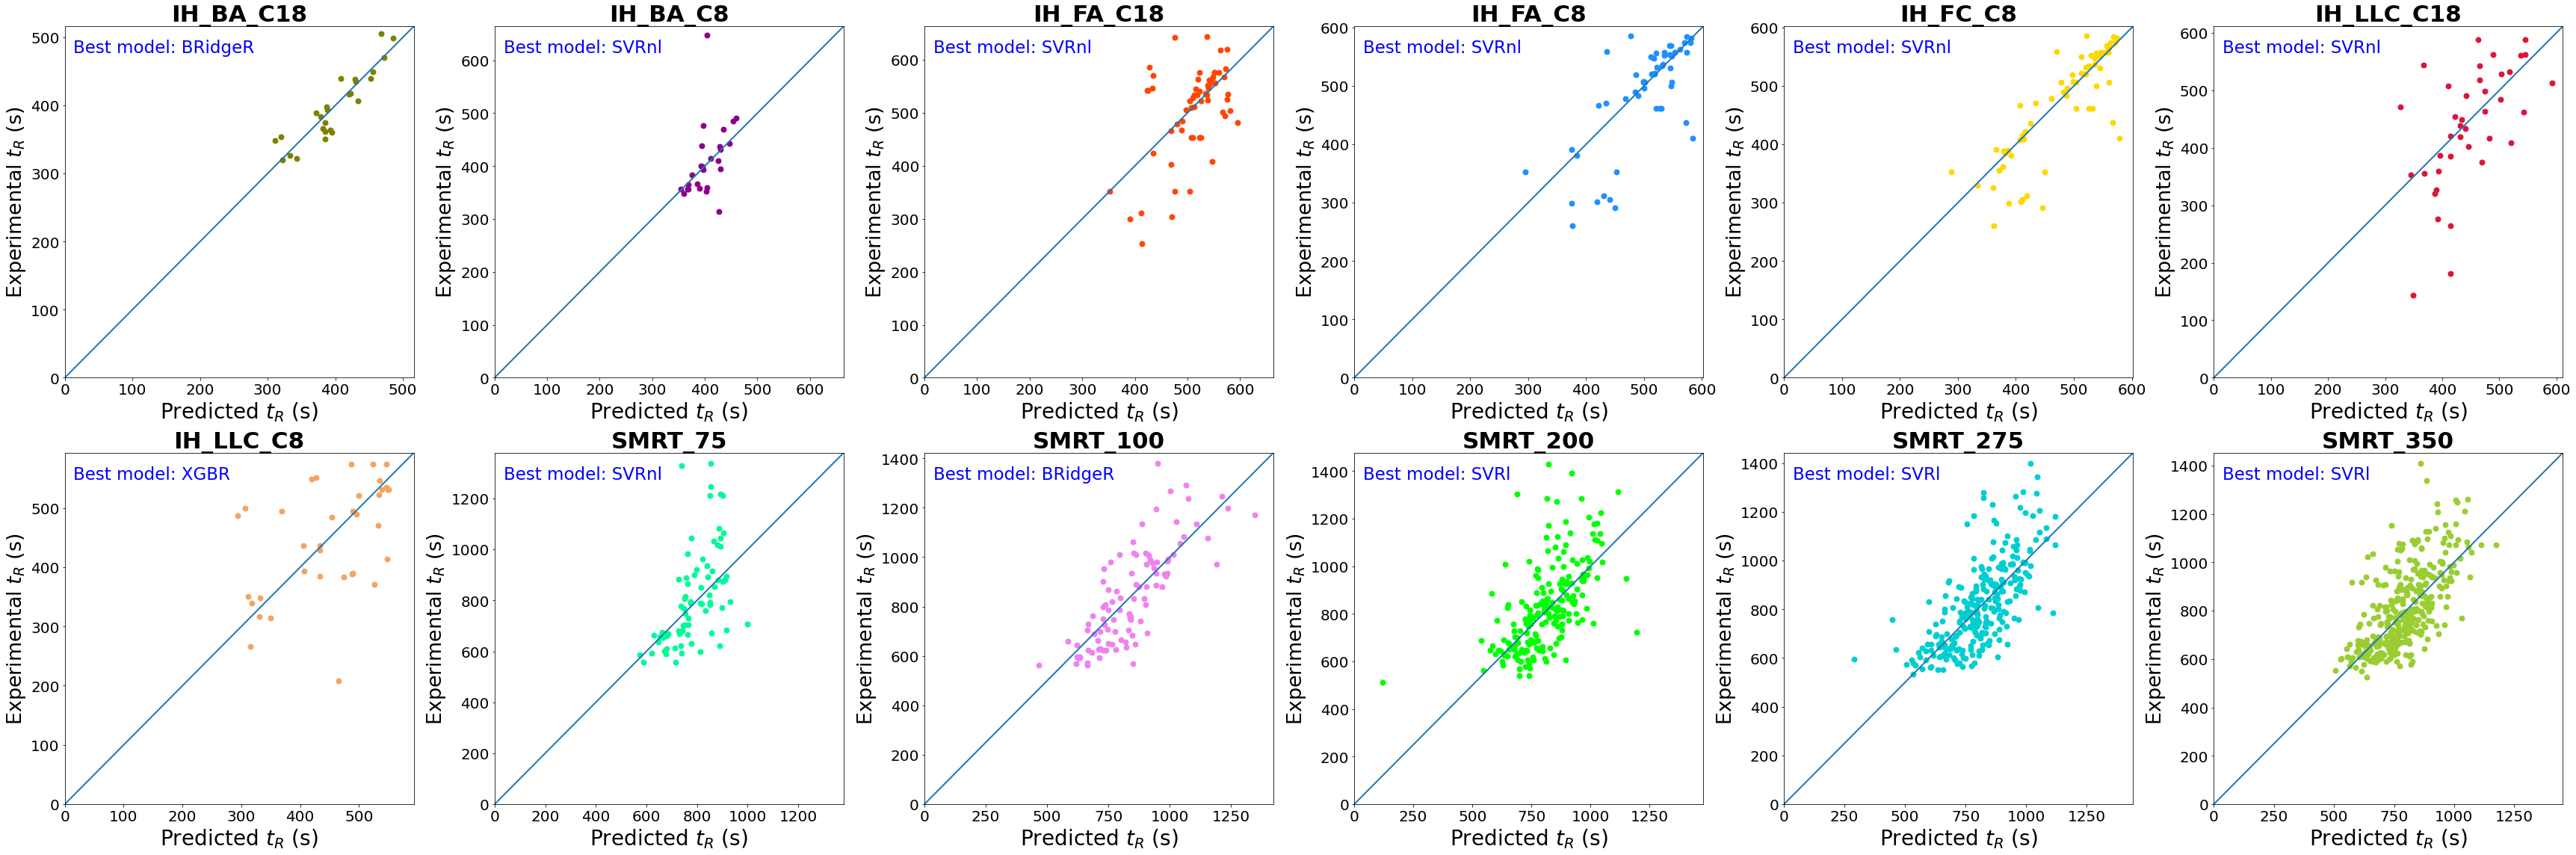

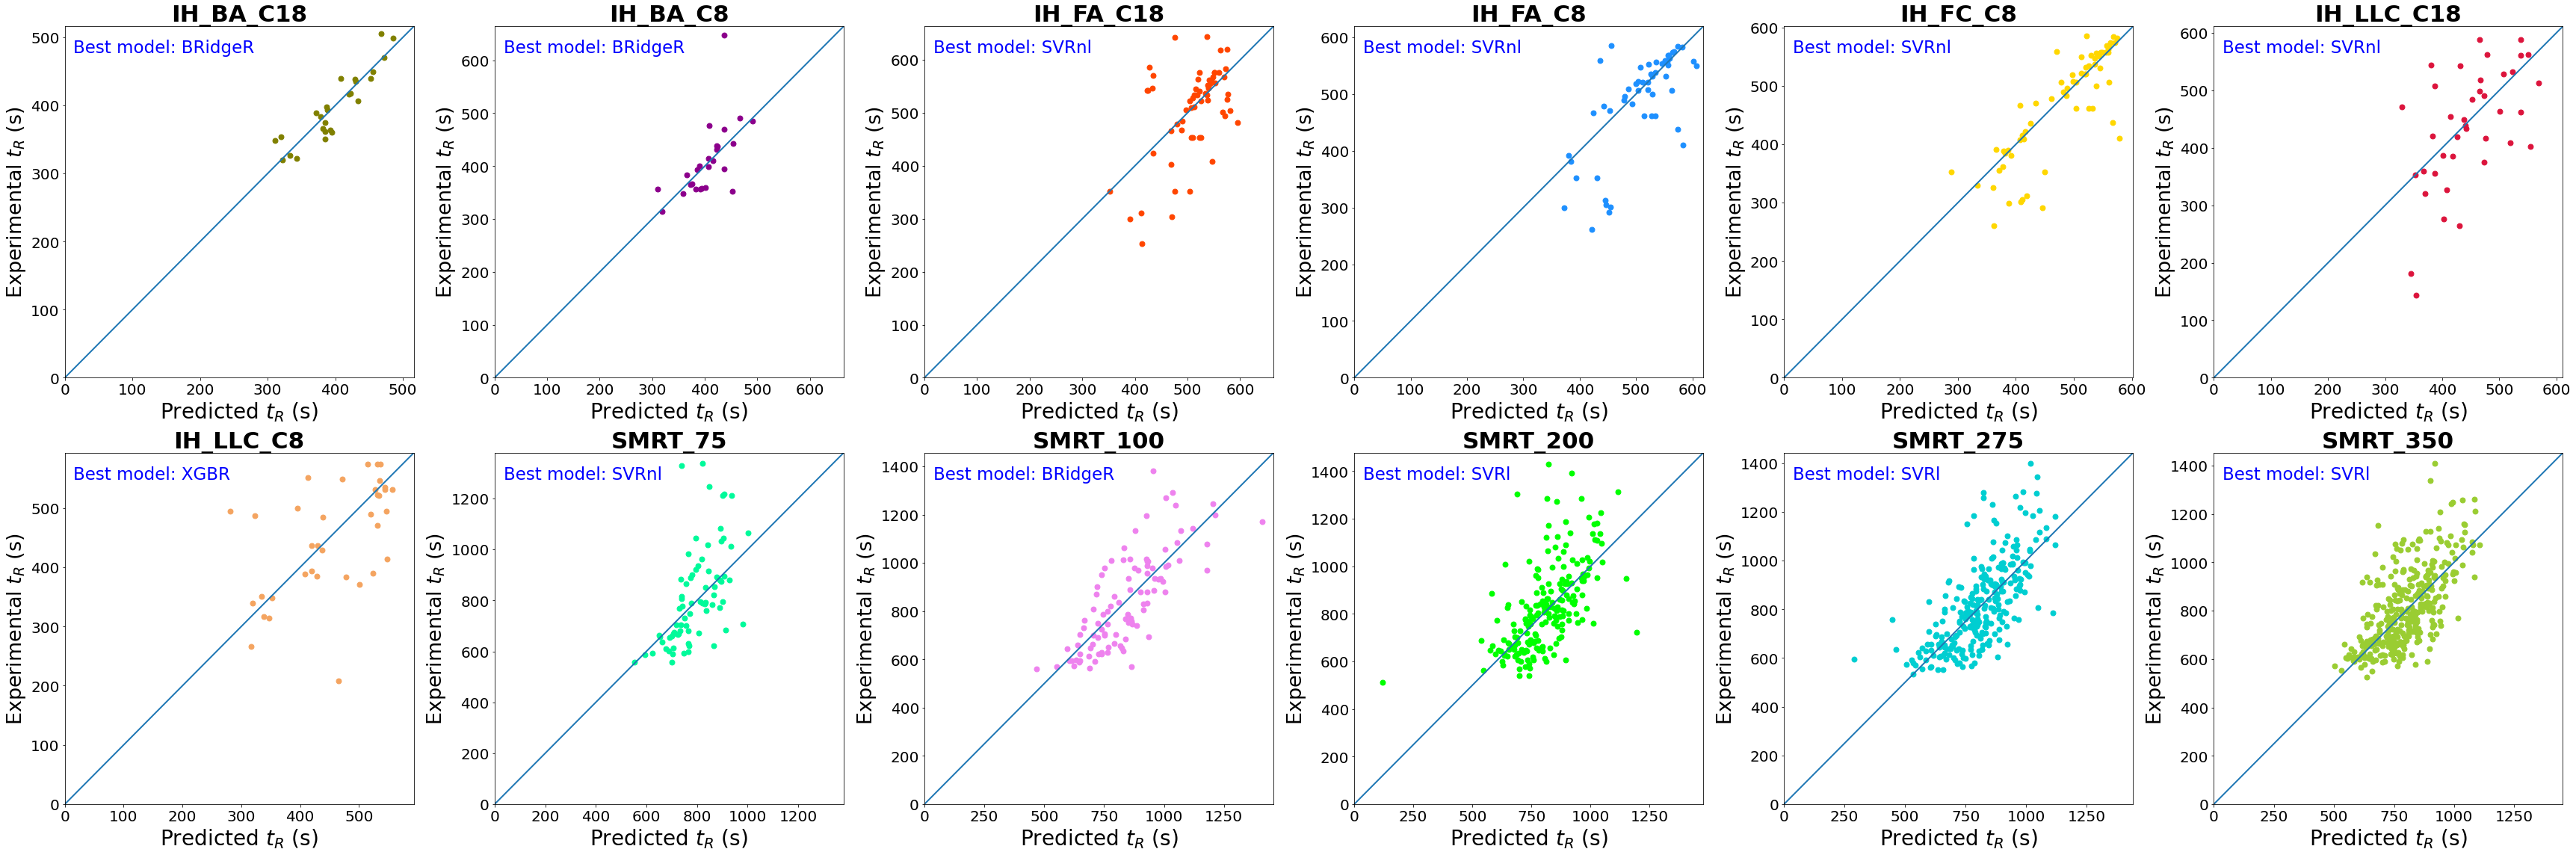

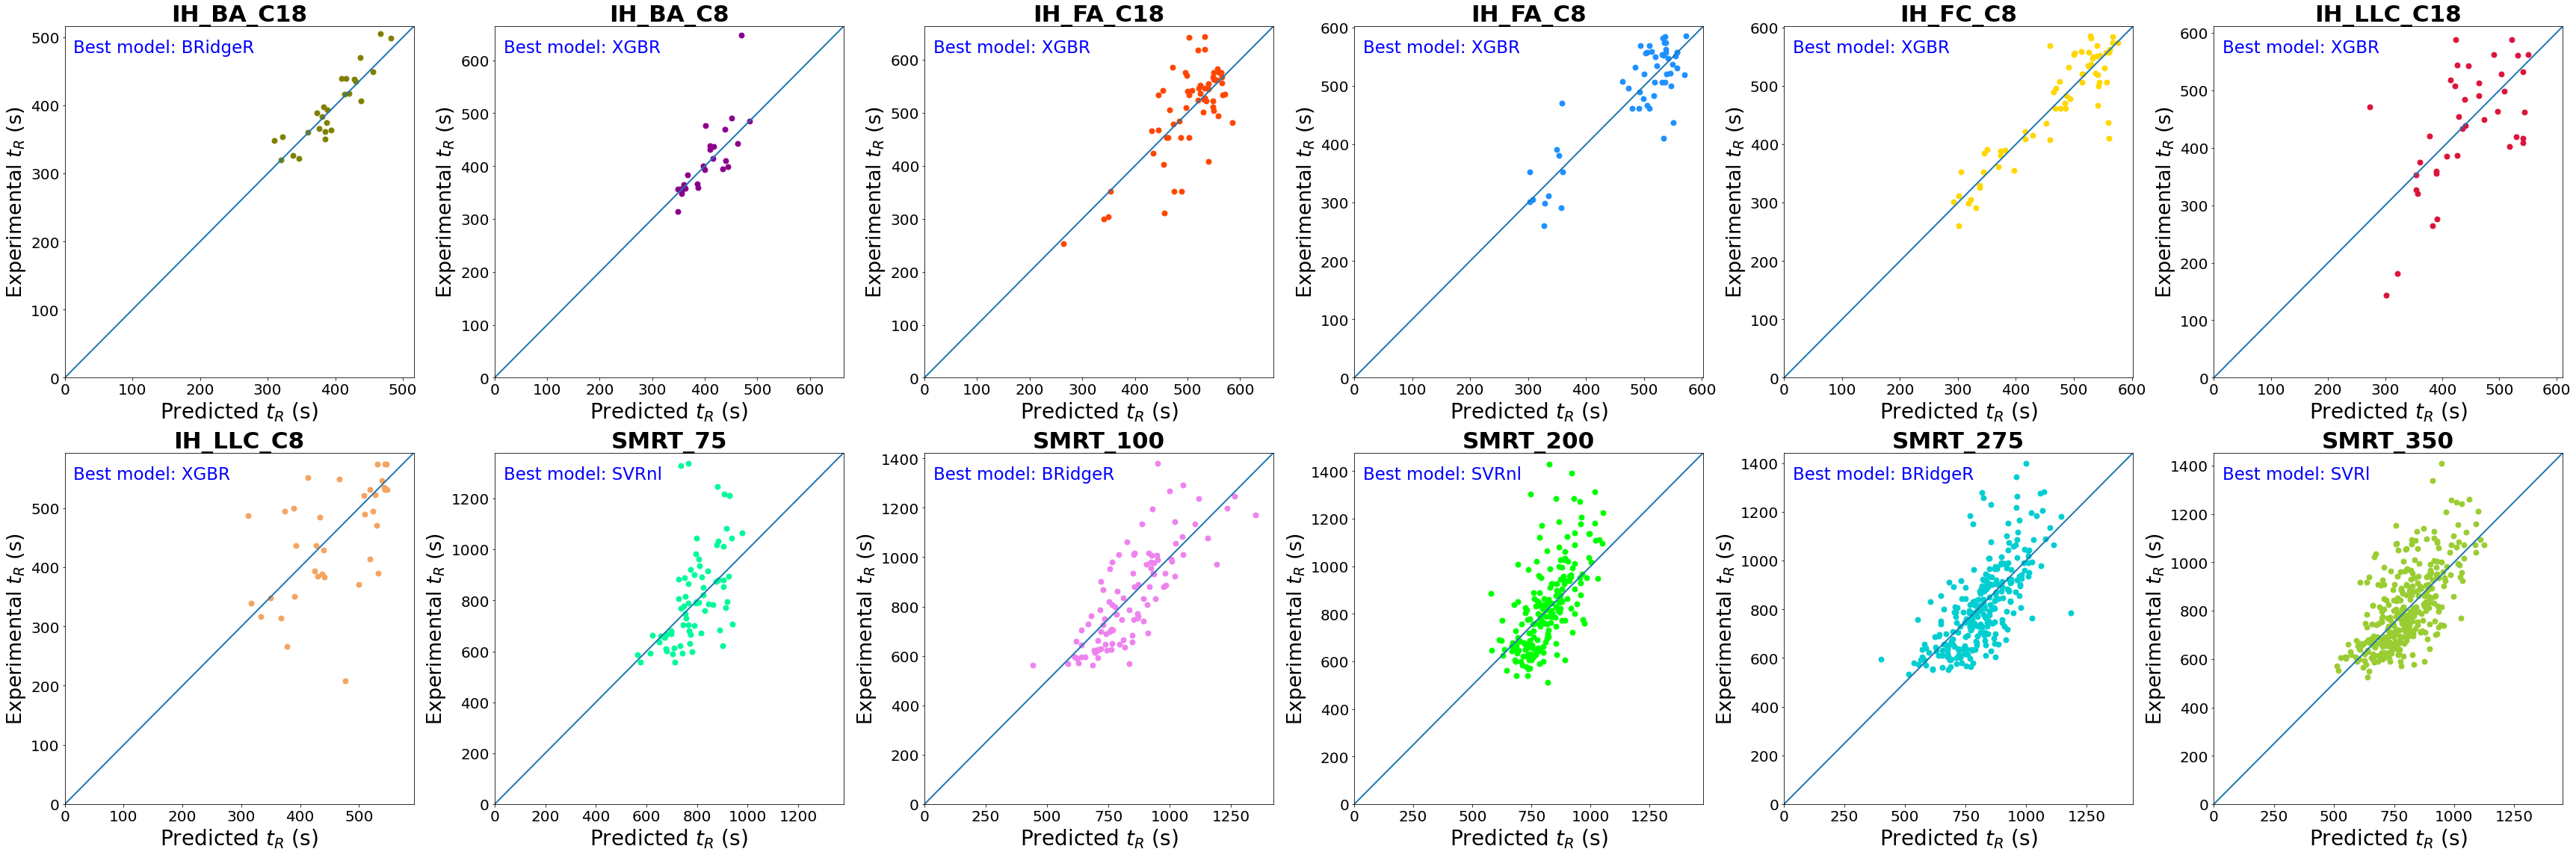

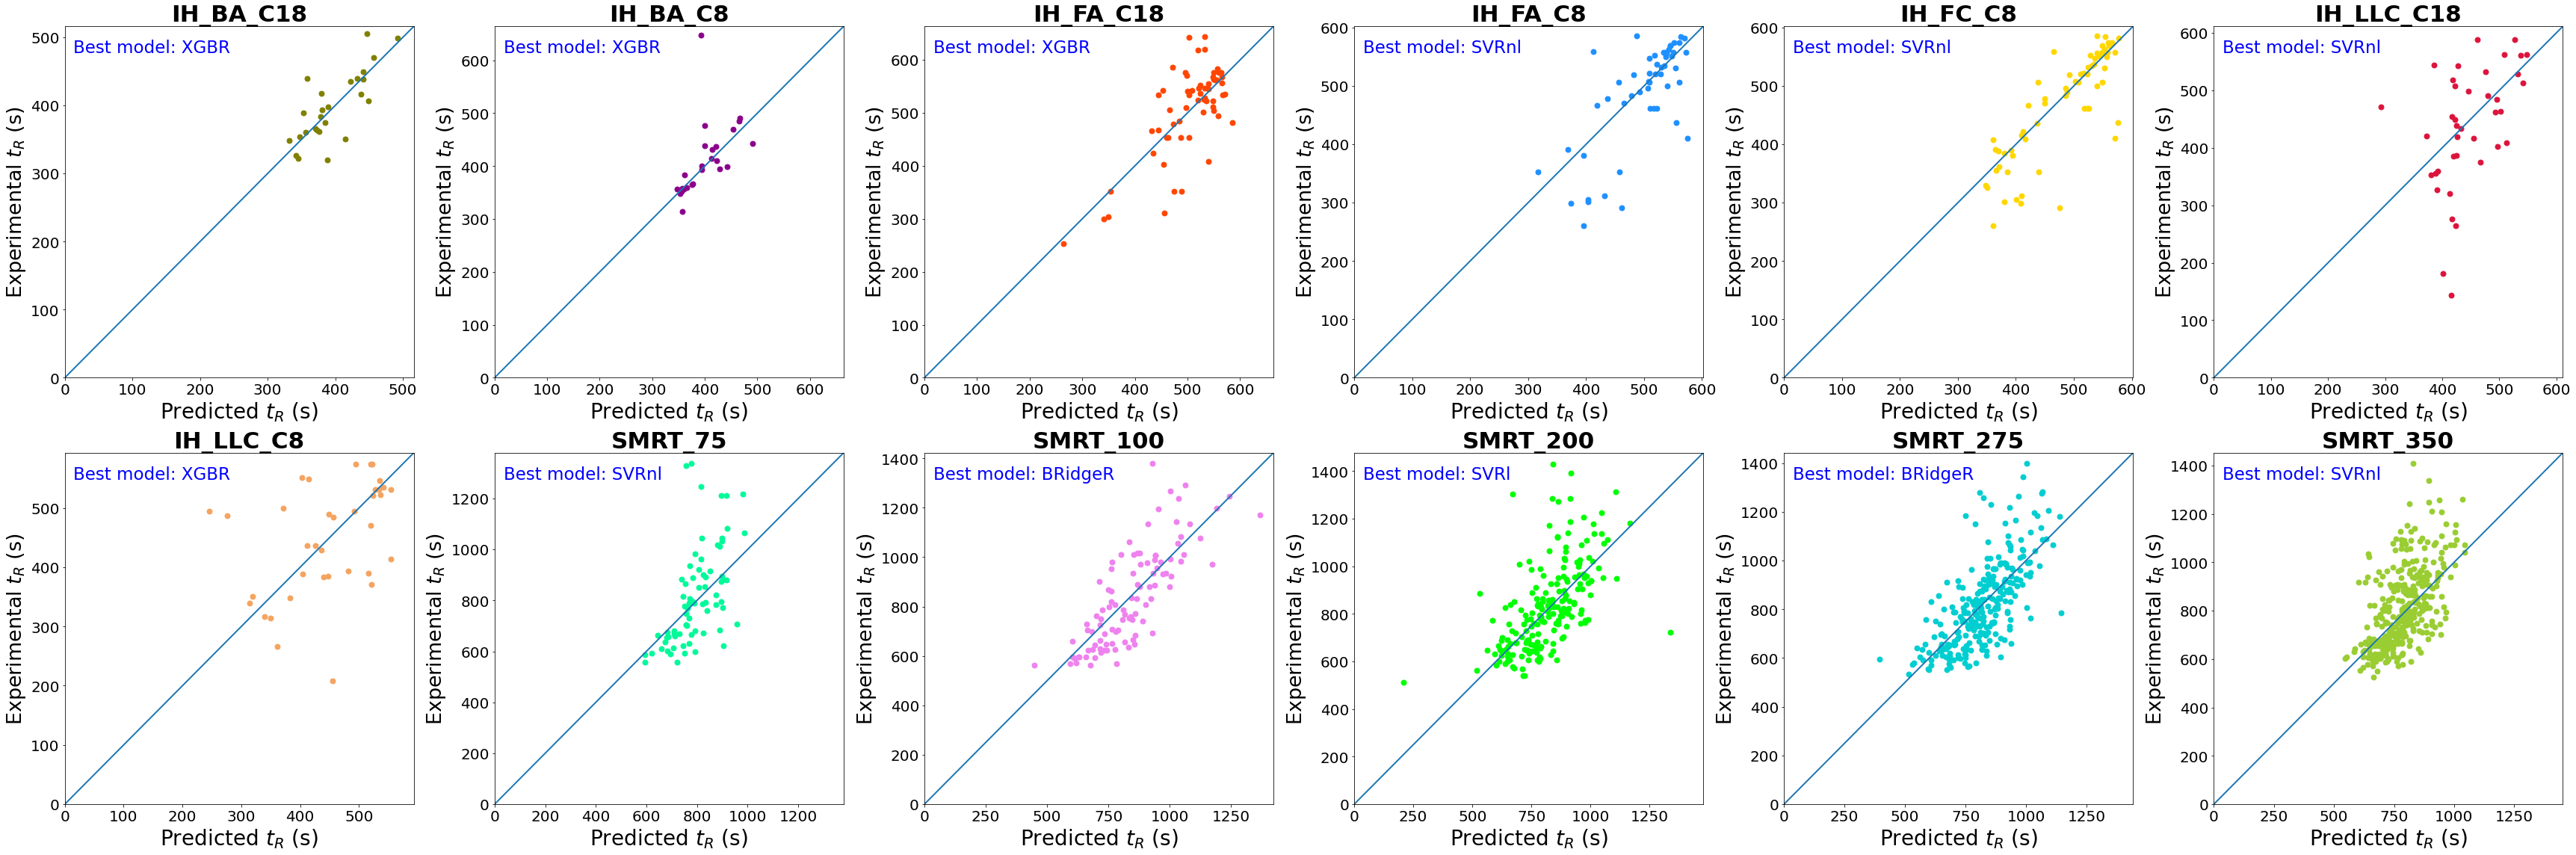

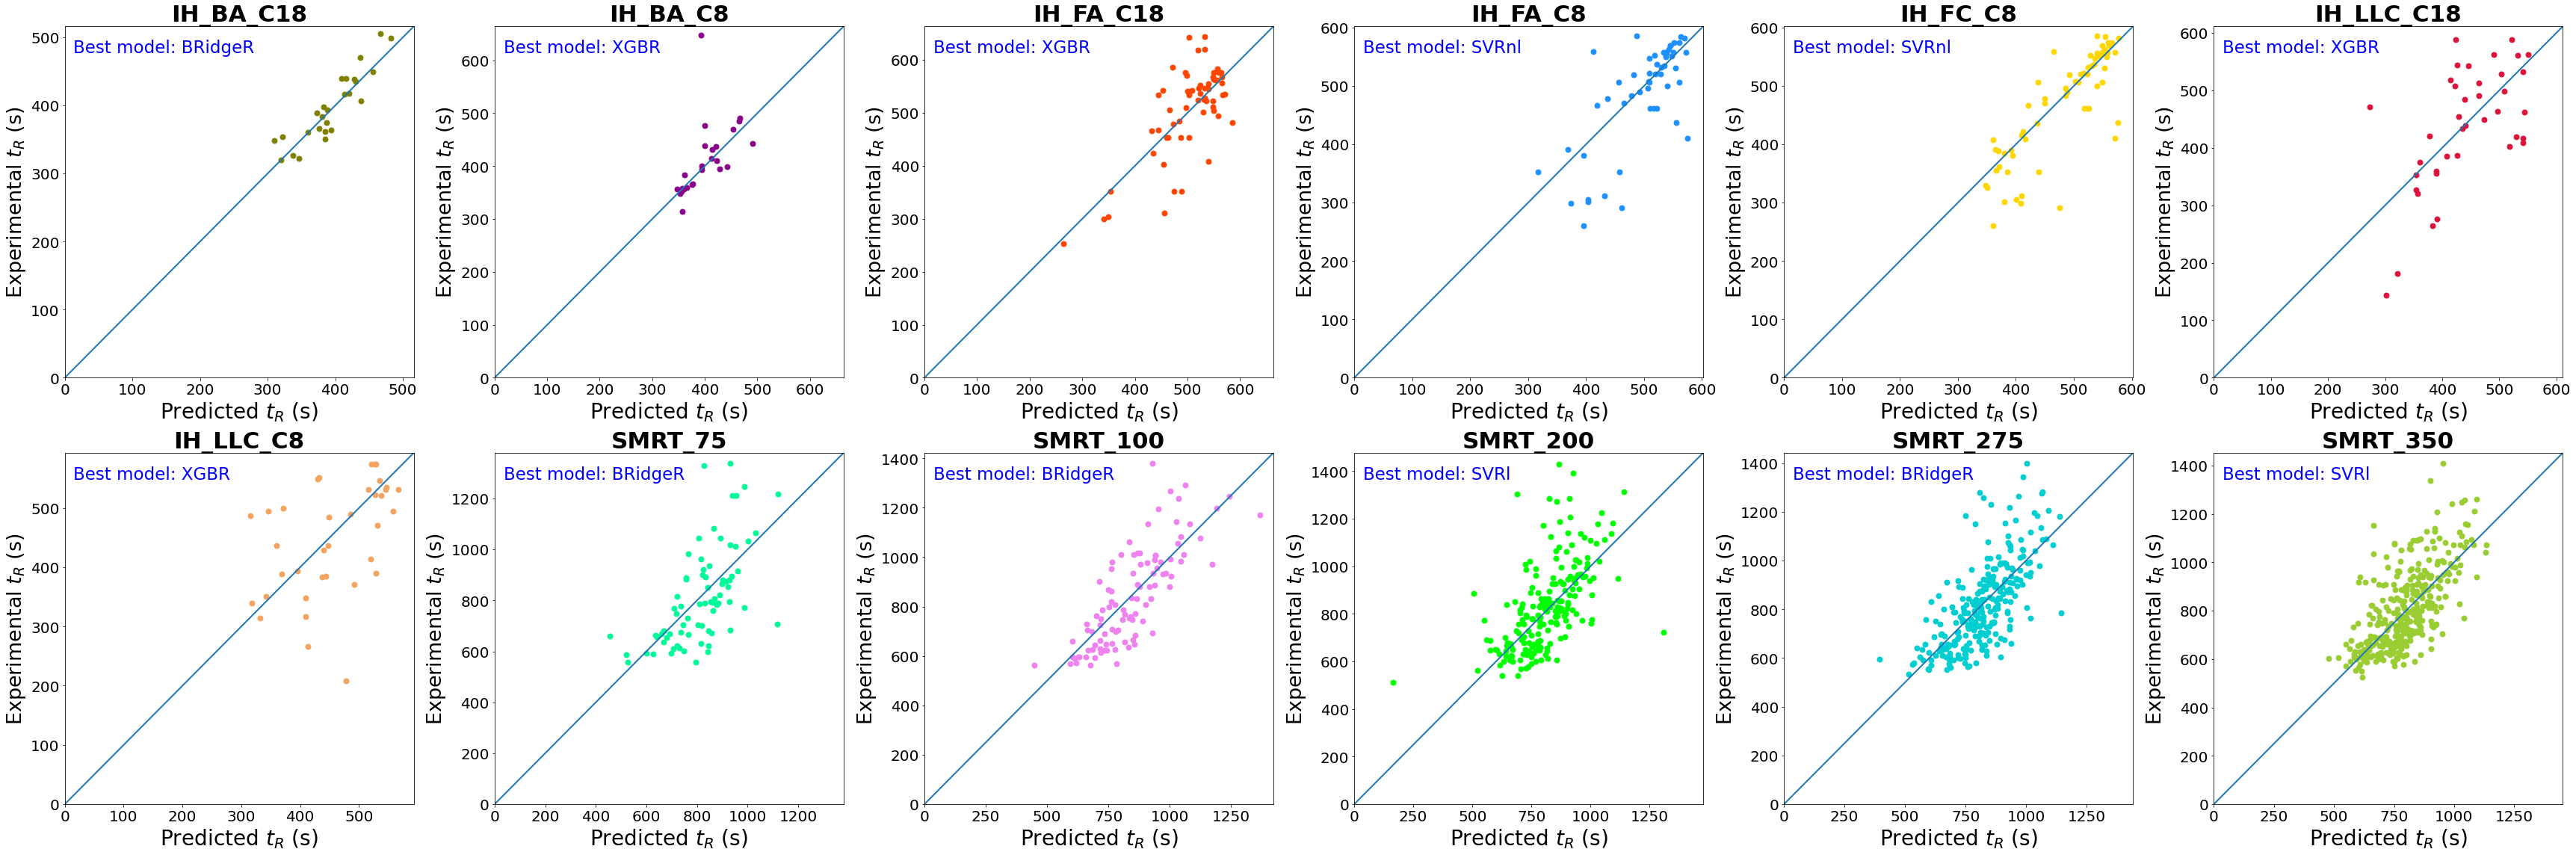

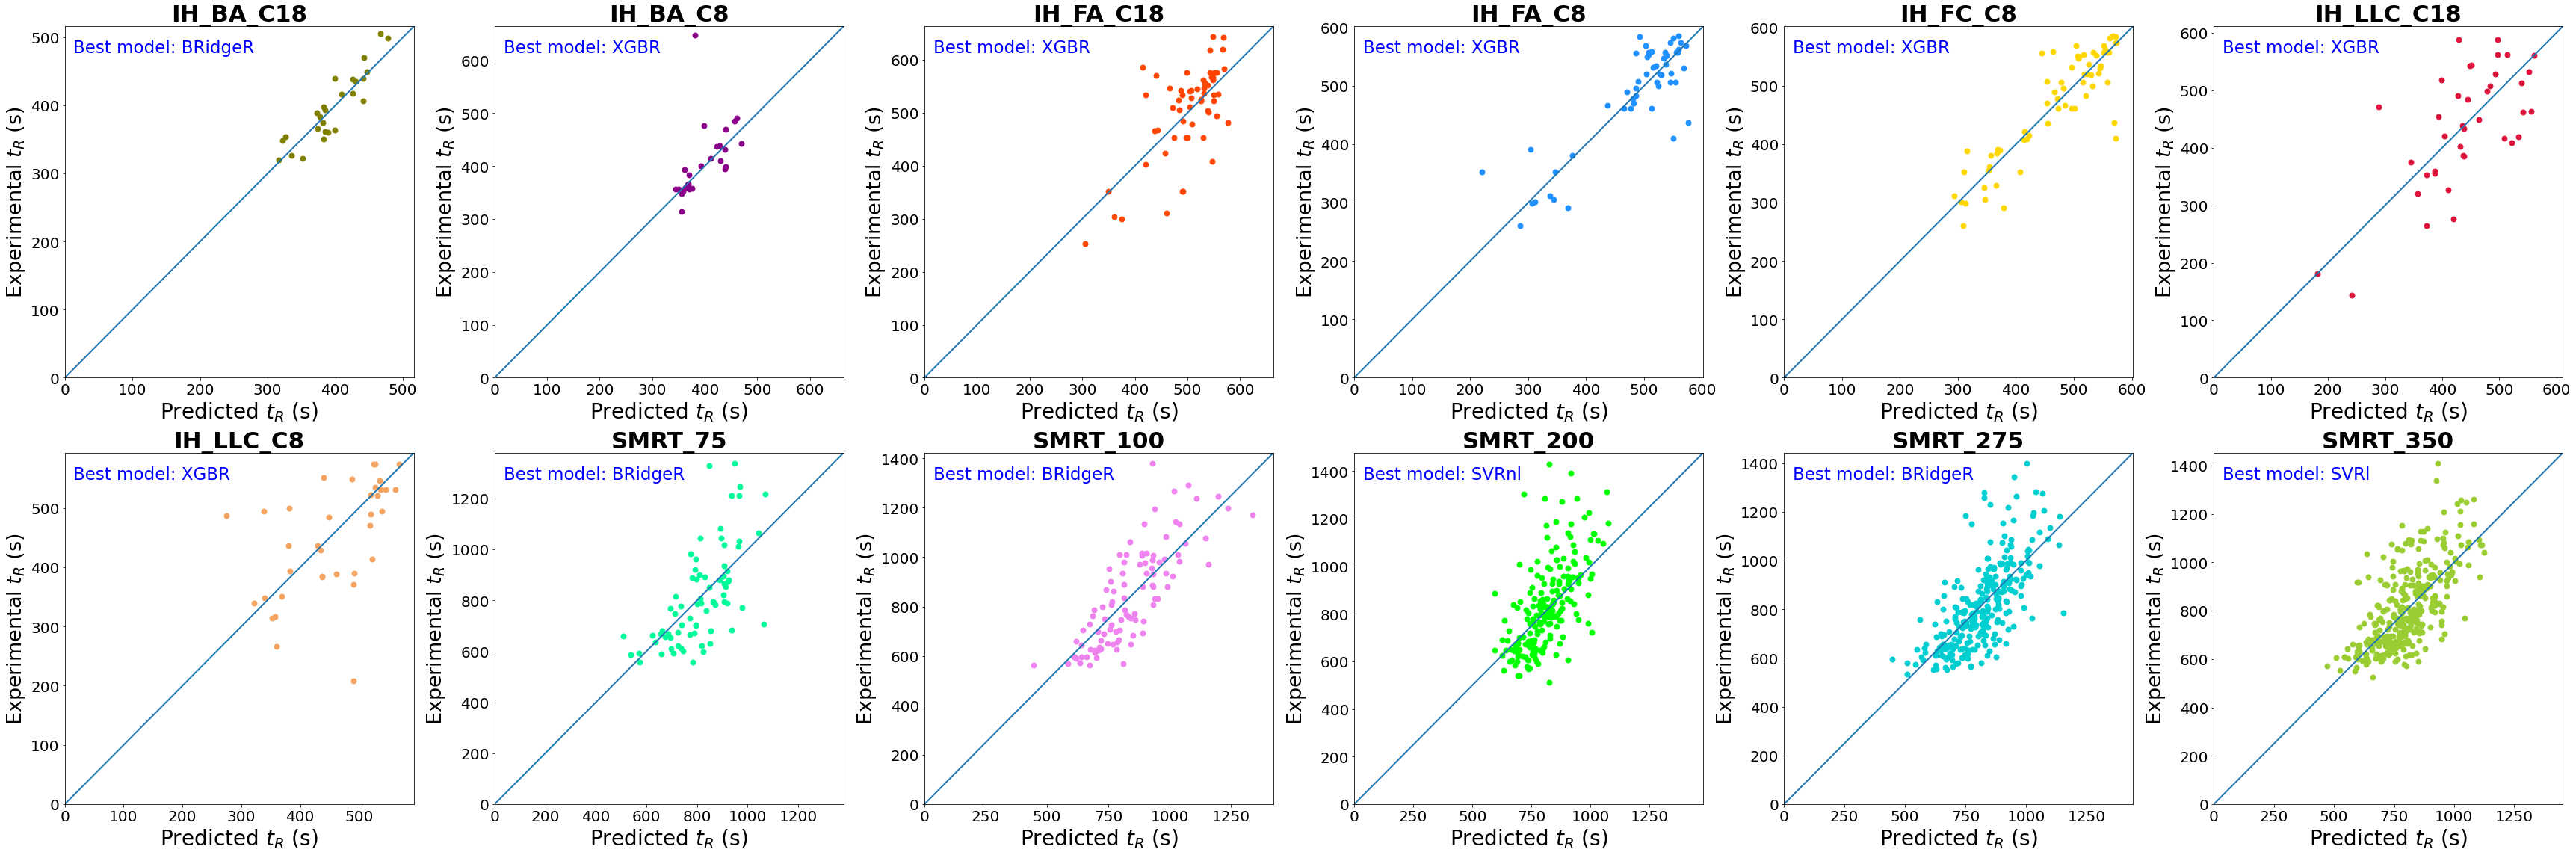

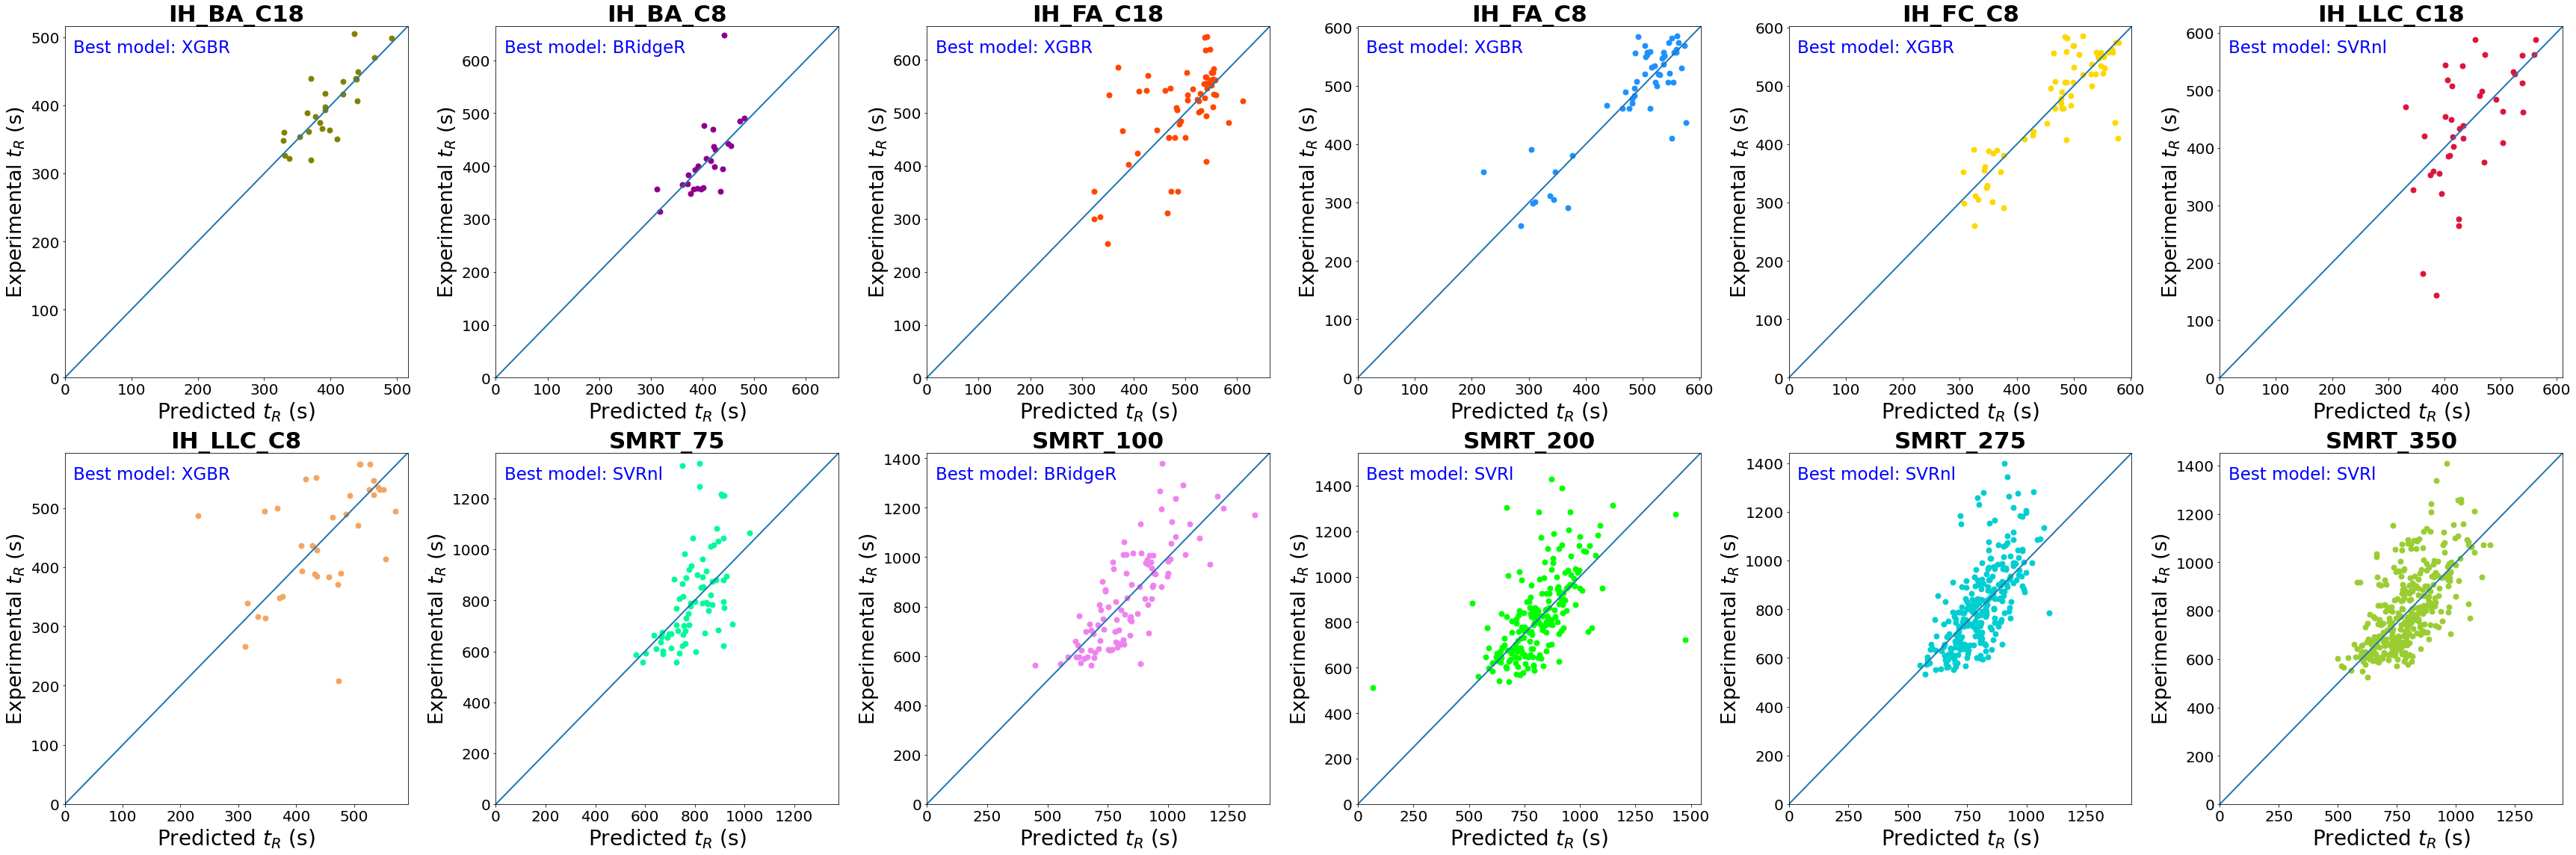

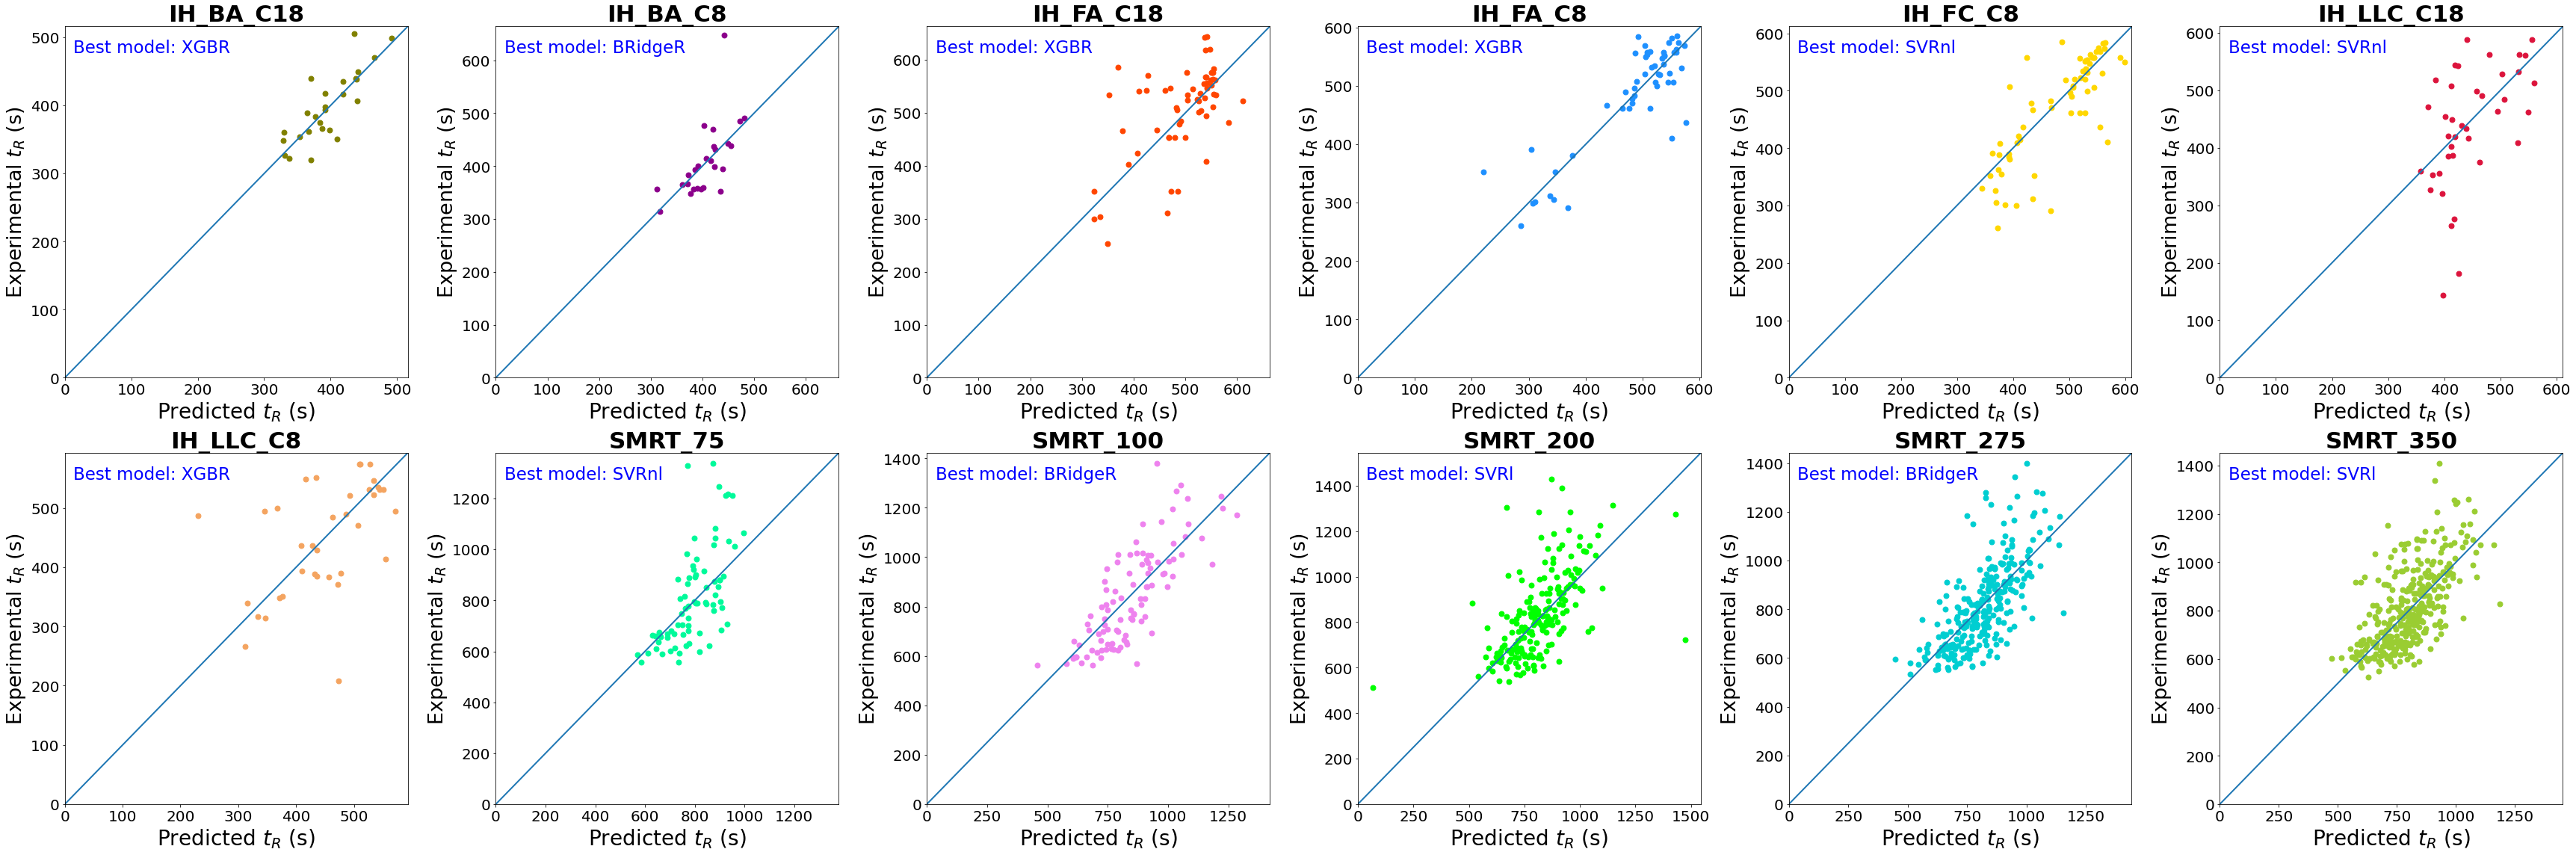

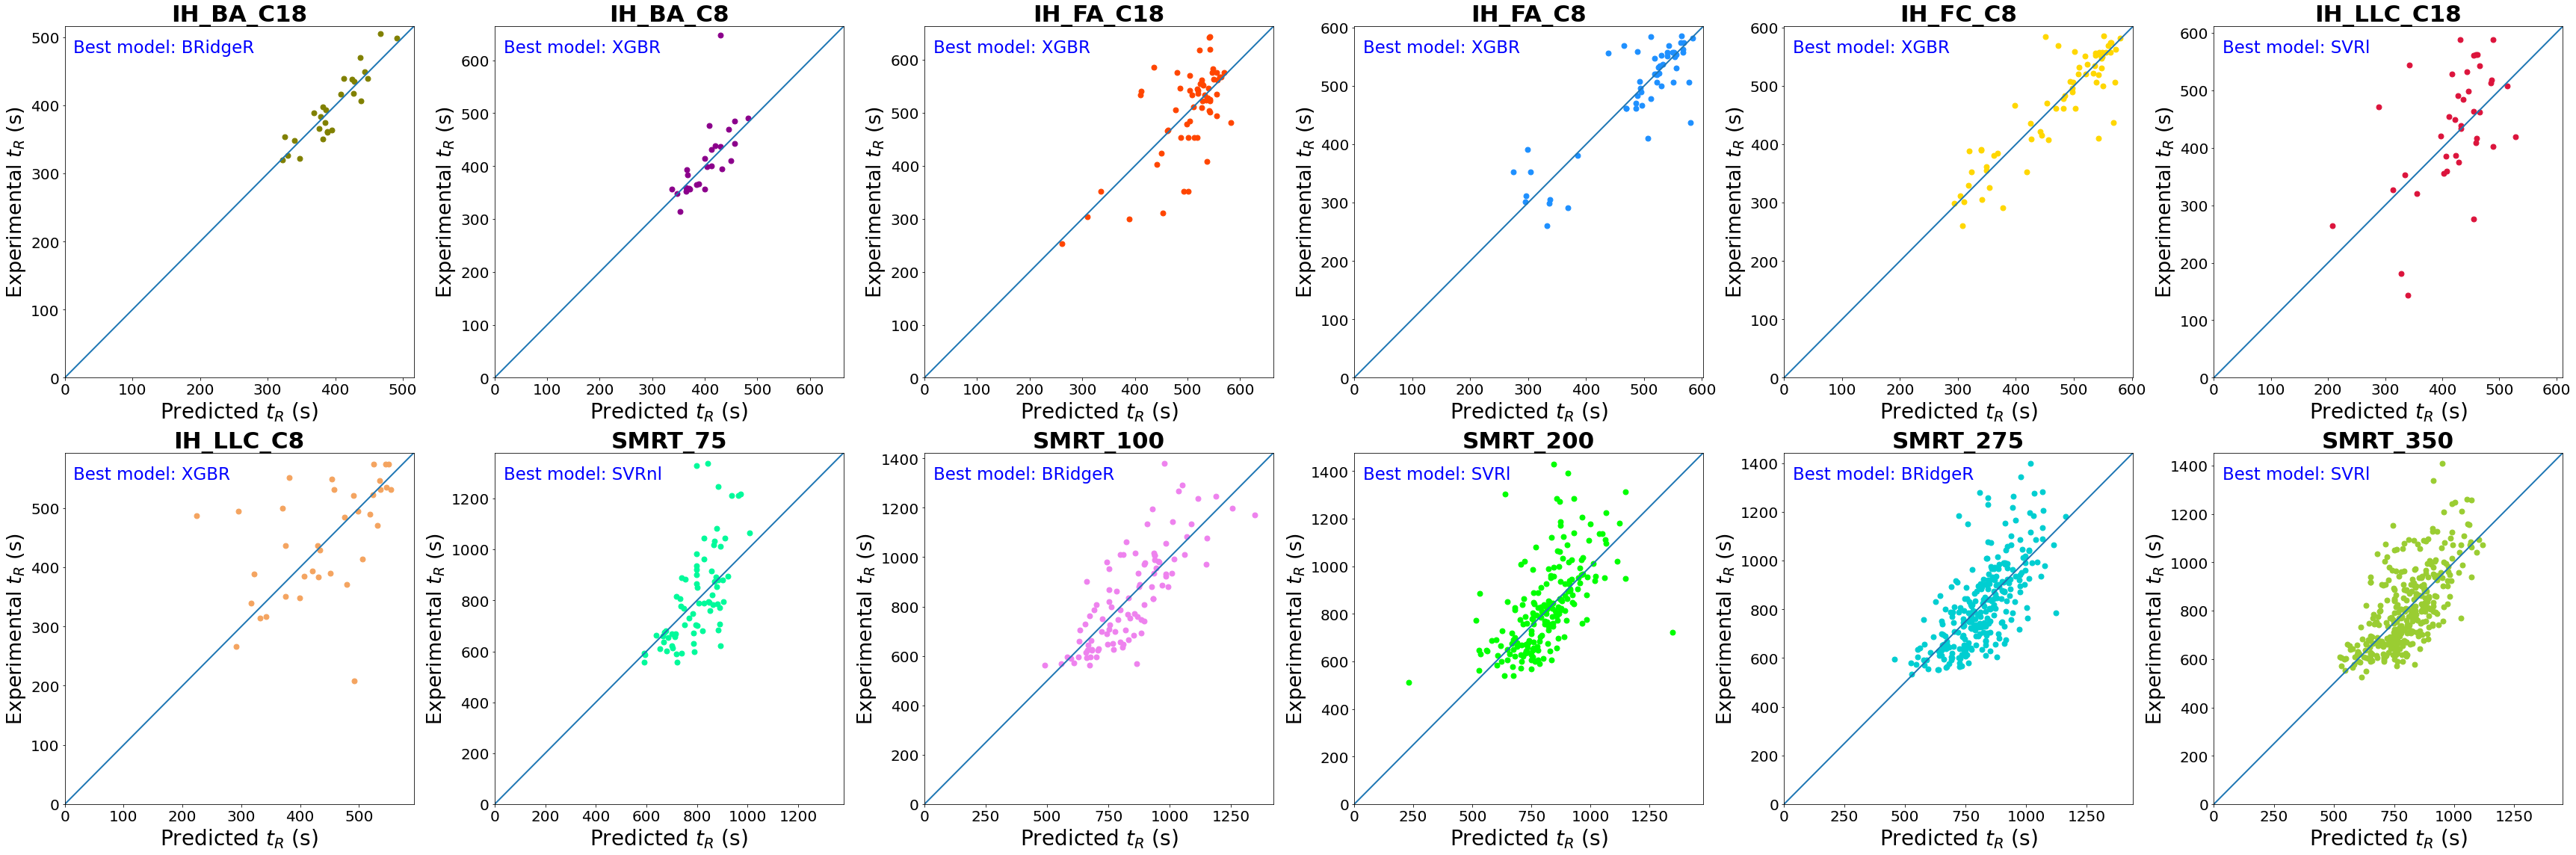

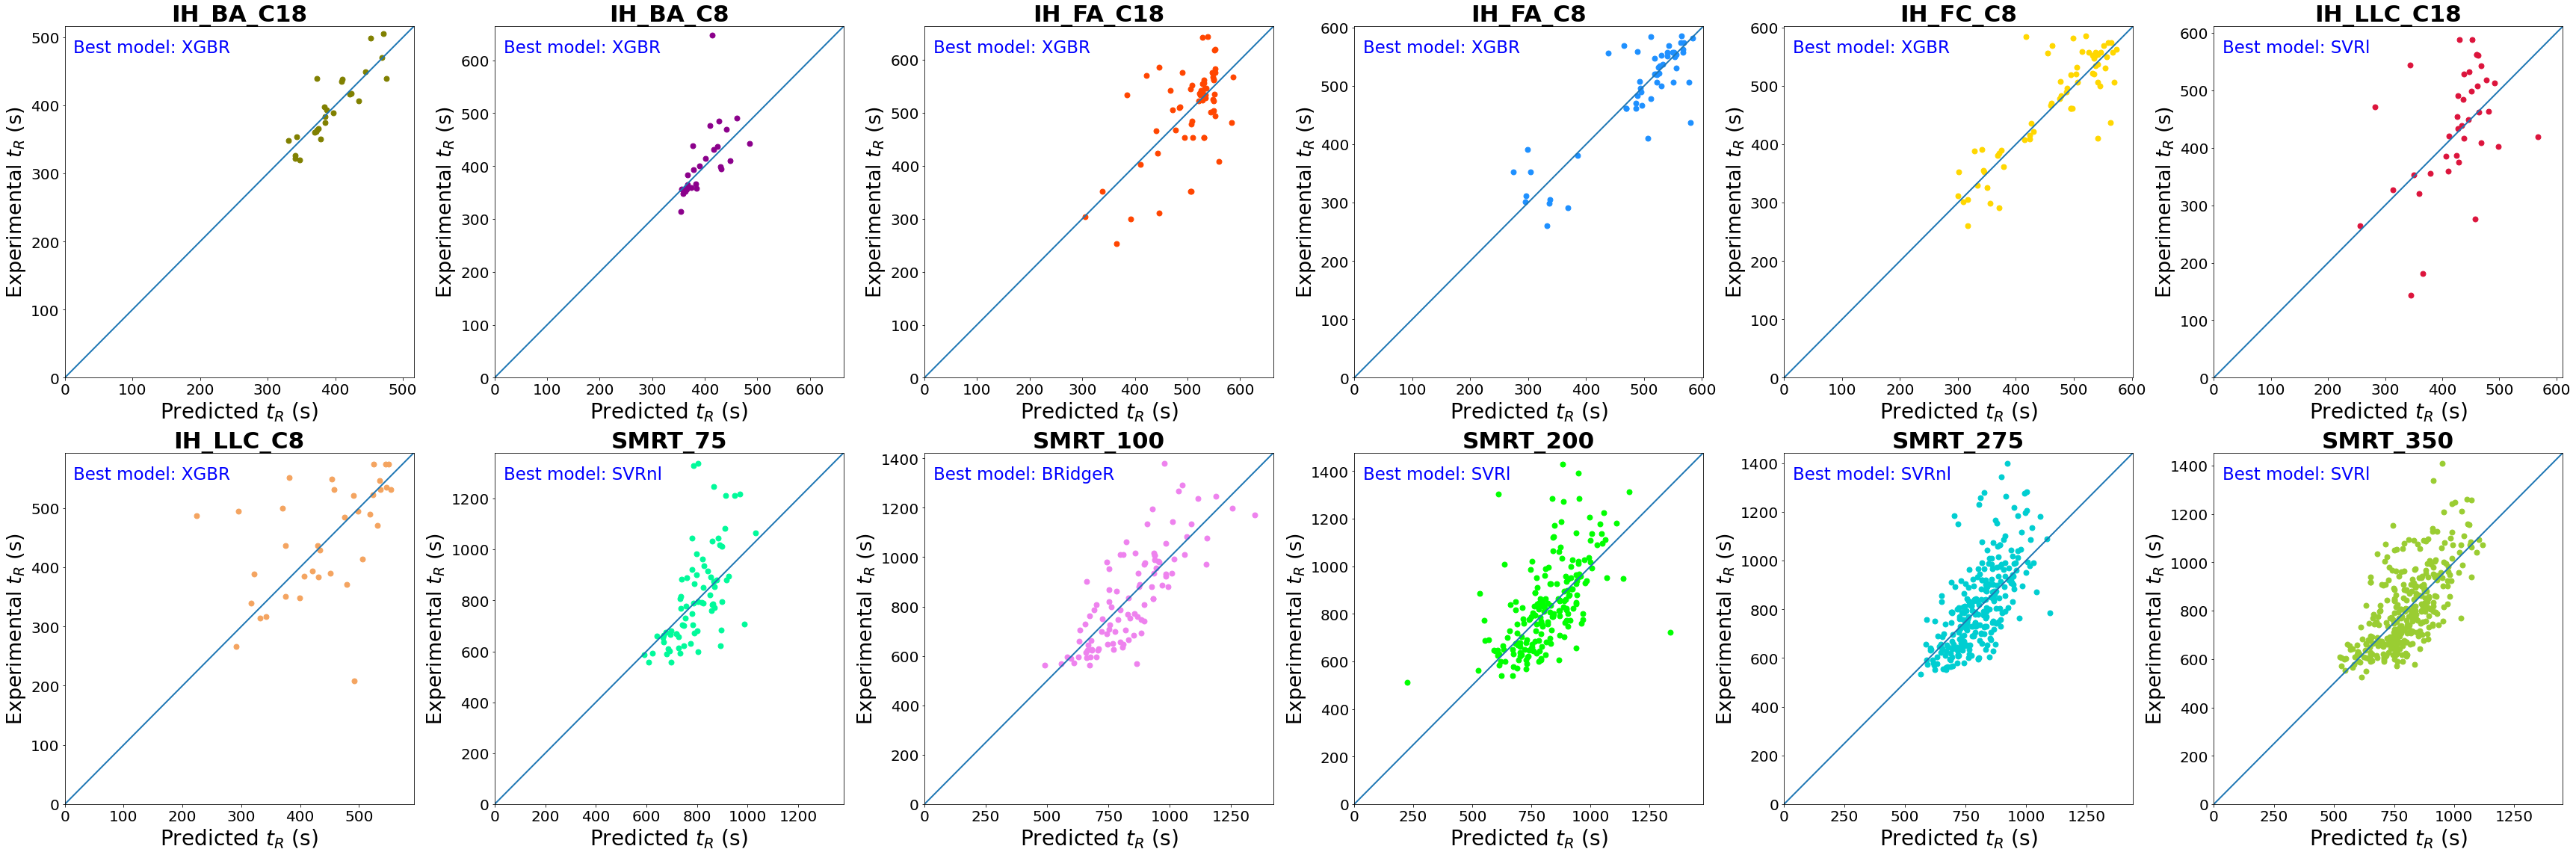

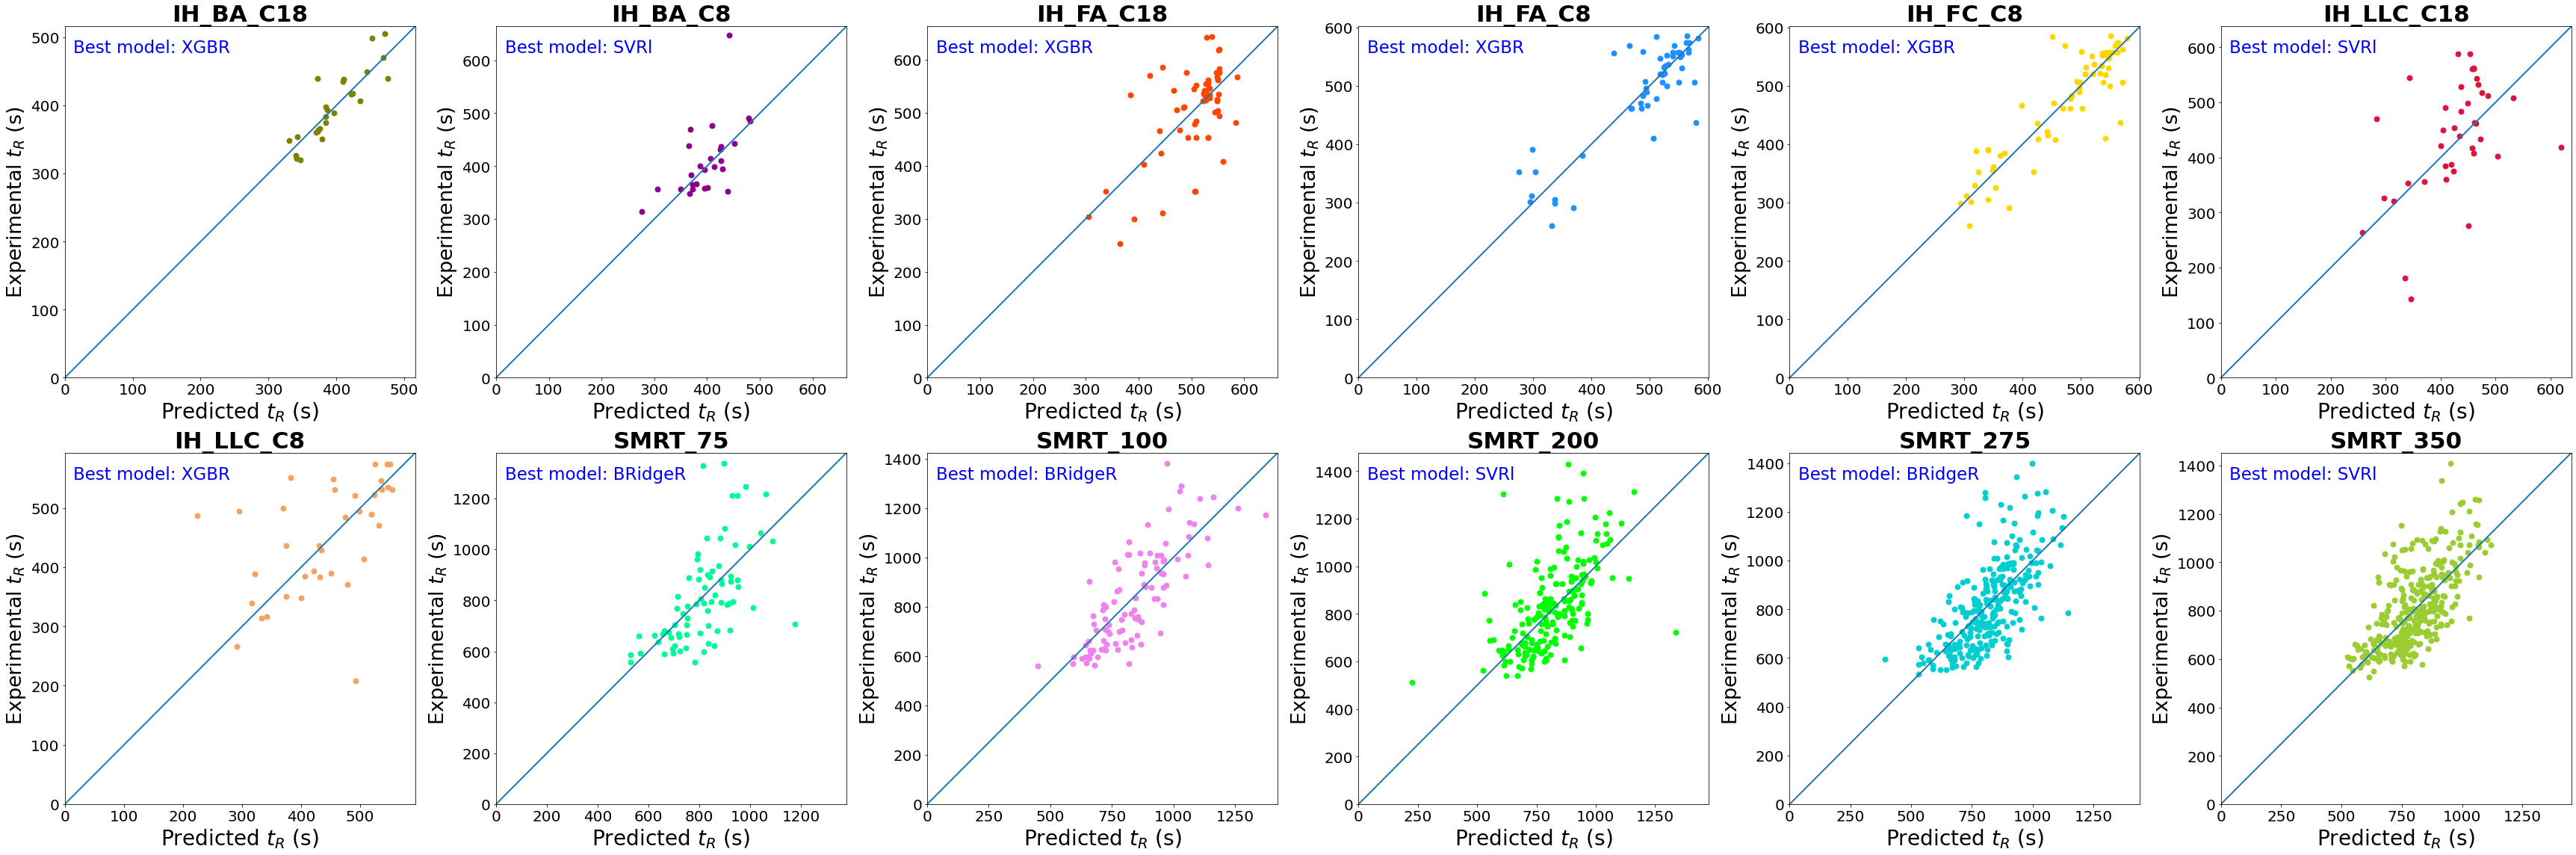

In [28]:
# Create a specific type of Regression-Residuals plots
rr_plot_type = 1

if(rr_plot_type == 3):
    cols_n=3
else:
    cols_n=6
da.create_regr_resid_plots(cols_n=cols_n, col_width=8, rr_plot_type=rr_plot_type,
                           show_plot=True)

#### Store resulting figures dictionary to a single excel file and a separate image file for each metric-datasets' configuration combination

In [29]:
# Directory to store specific plots
if not os.path.exists(res_reg_resd_plots_dir):
    os.makedirs(res_reg_resd_plots_dir)

In [30]:
# In the case of excel files, a single multisheet file is created
# Each sheet corresponds to a specific metric-datasets' configuration
if(rr_plot_type == 1):
    ar_dic_fn = 'Regression_plots.xlsx'
if(rr_plot_type == 2):
    ar_dic_fn = 'Residuals_plots.xlsx'
if(rr_plot_type == 3):
    ar_dic_fn = 'Complex_residuals_plots.xlsx'
ar_dic_fn_lnk = os.path.join(res_reg_resd_plots_dir, ar_dic_fn)
da.export_plots_dict_to_file(da.regr_resid_plots_dic, ar_dic_fn_lnk, kl=2)

In [31]:
# Plots to individual image files
# Create a separate subdirectory

if(rr_plot_type == 1):
    save_dir_n = 'Individual_regression_plots'
    suffix_n = 'regression_plots'
if(rr_plot_type == 2):
    save_dir_n = 'Individual_residuals_plots'
    suffix_n = 'residuals_plots'
if(rr_plot_type == 3):
    save_dir_n = 'Individual_complex_residuals_plots'
    suffix_n = 'complex_residuals_plots'
    
save_dir_lnk = os.path.join(res_reg_resd_plots_dir, save_dir_n)
if not os.path.exists(save_dir_lnk):
    os.makedirs(save_dir_lnk)
    
for cc in da.regr_resid_plots_dic.keys():
    for metric in da.regr_resid_plots_dic[cc].keys():
        fig_n = '%s_%s_%s.tiff' %(metric, cc, suffix_n)
        fig_lnk = os.path.join(save_dir_lnk, fig_n)
        fig = da.regr_resid_plots_dic[cc][metric]
        fig.savefig(fig_lnk, dpi=300, format='tiff', pil_kwargs={"compression": "tiff_lzw"})

#### 4.4 Models performance plots
Collects necessary performance data for each algorithm on all datasets for all combinations of metric-datasets' configurations and then plots them, using the *comp_models_perf_matrices_plots()* function<br>
Creates 2 dictionaries:
 - the models_perf_matrices_dic dictionary with models performance matrices under all conditions<br>
 - the models_perf_plots_dic dictionary with a bar plot for each one of the above conditions<br>
    Both Dictionaries' levels keys:<br>
    metric_CC / {corresponding performance matrix or plot}

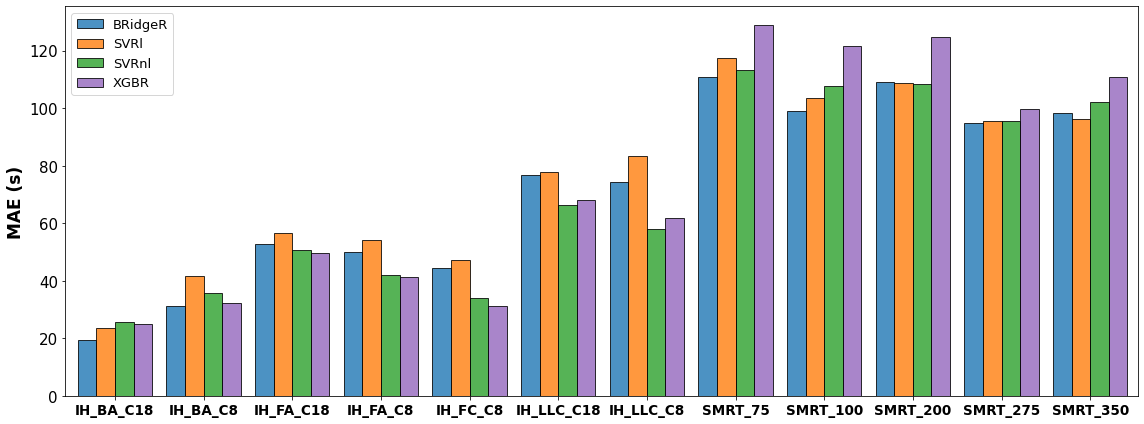

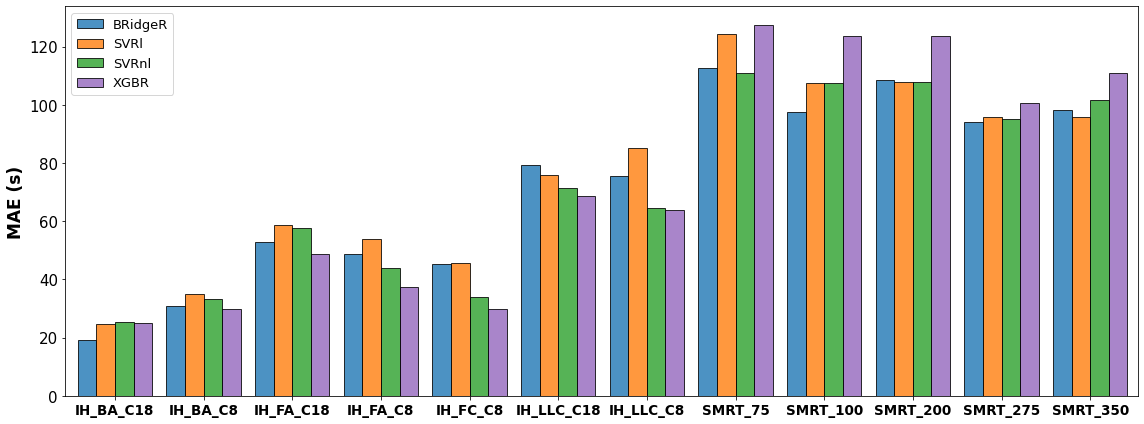

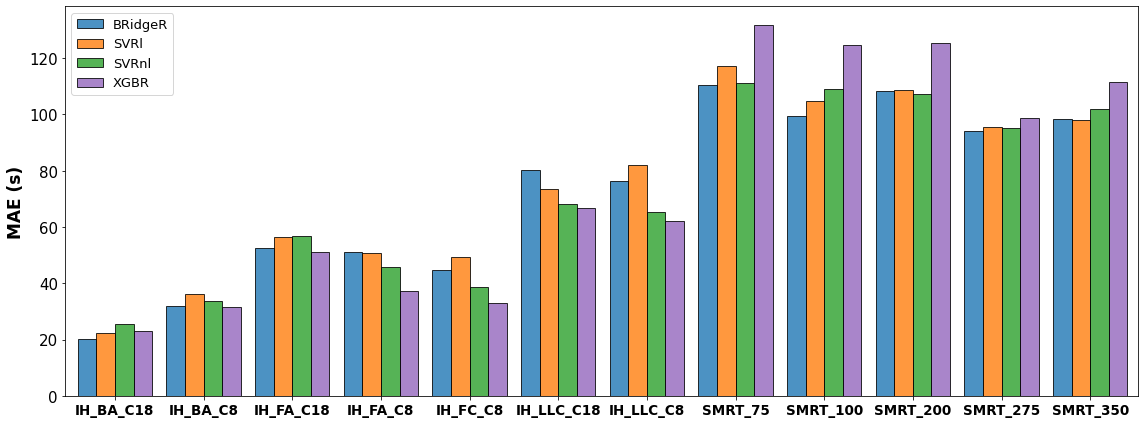

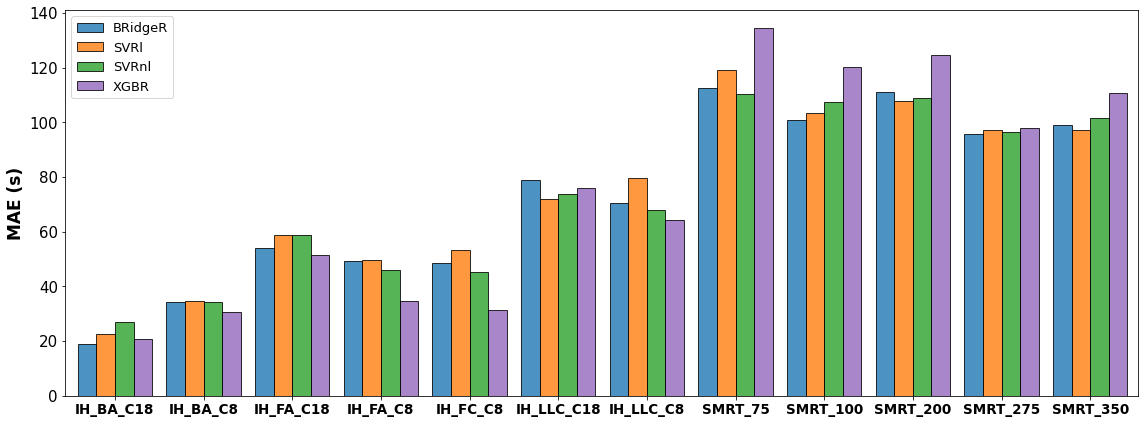

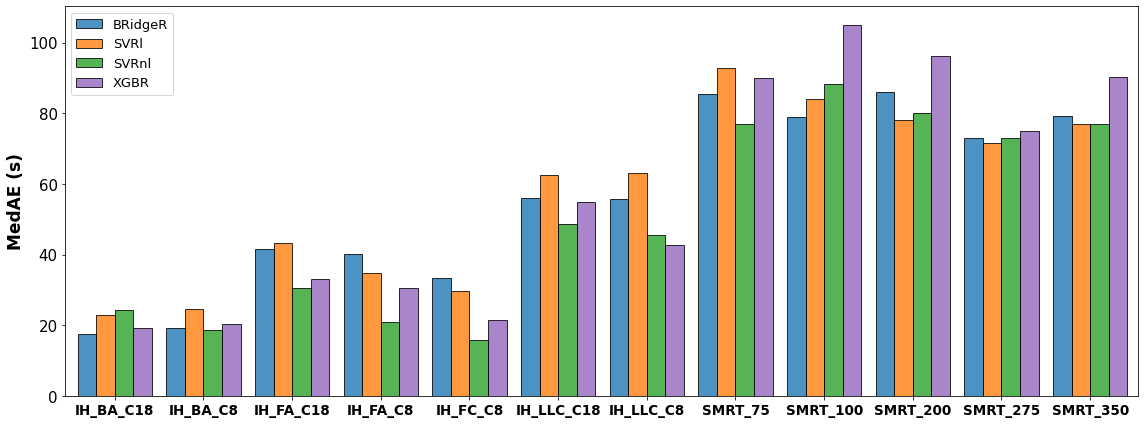

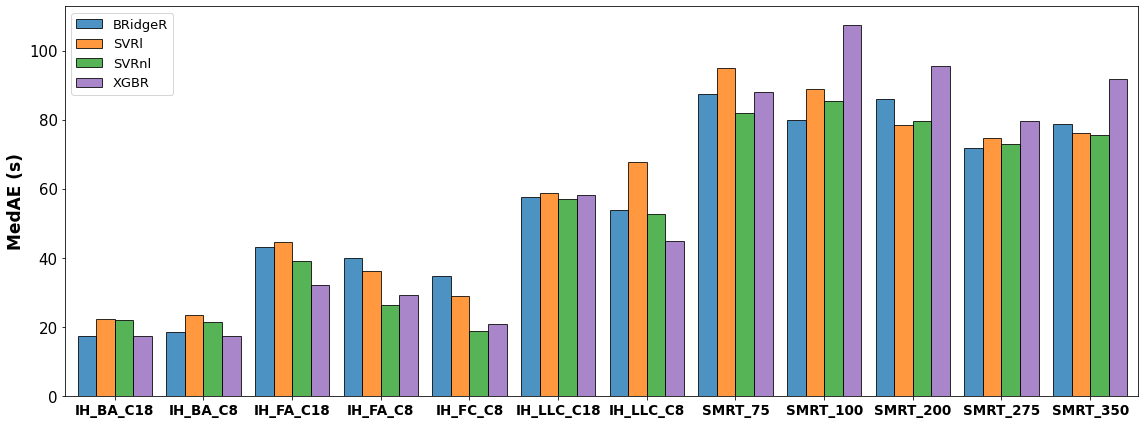

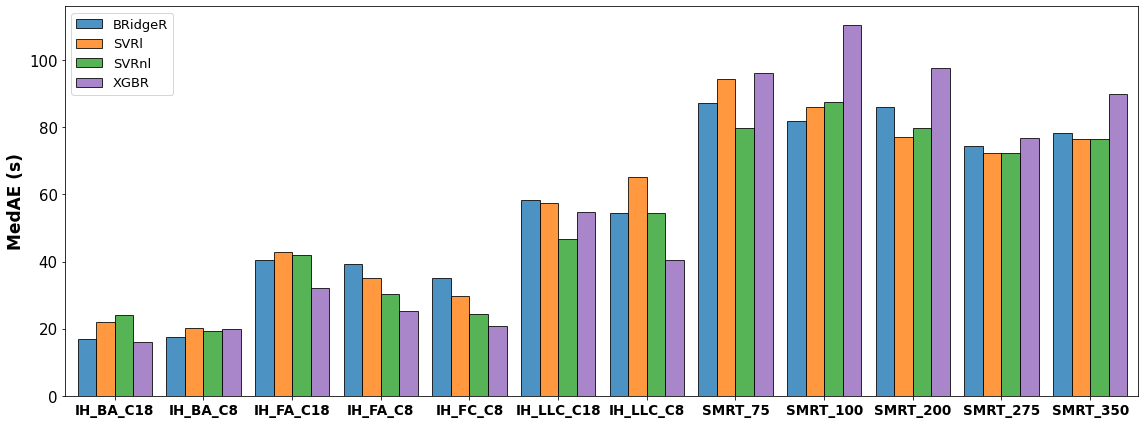

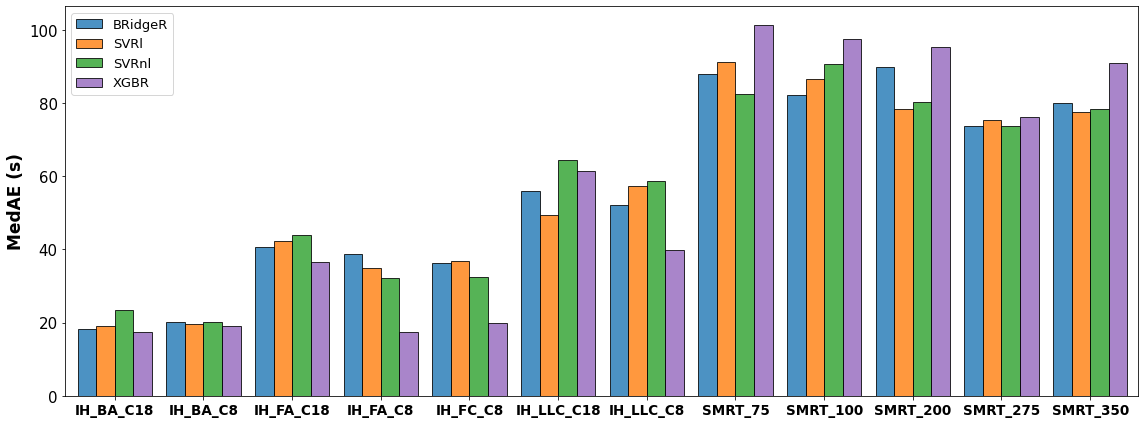

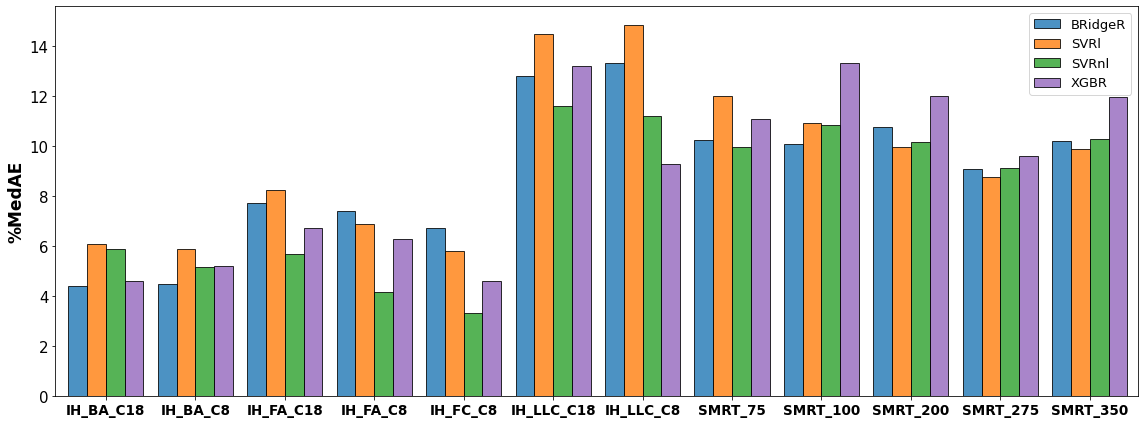

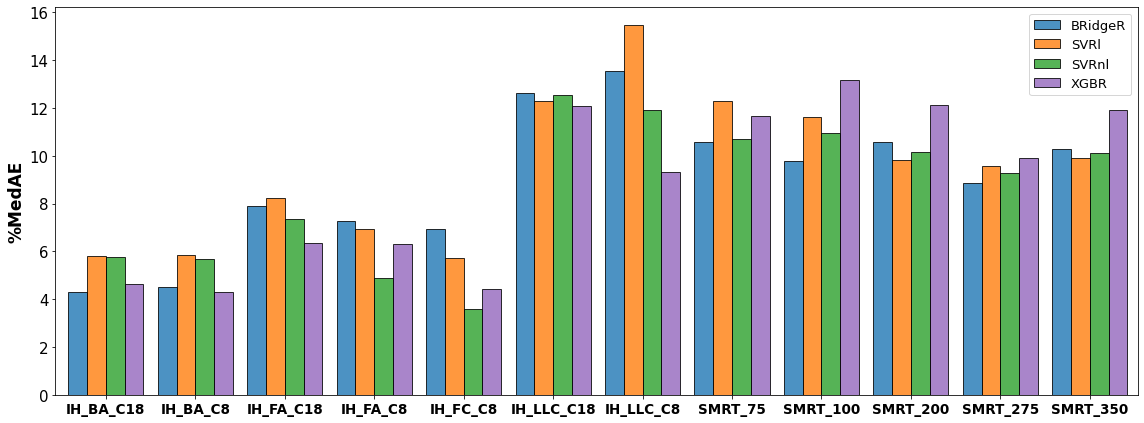

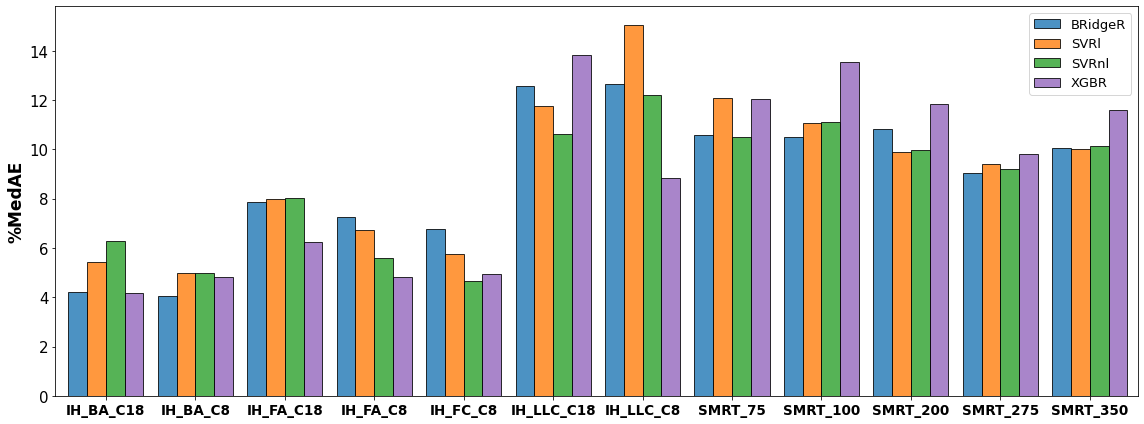

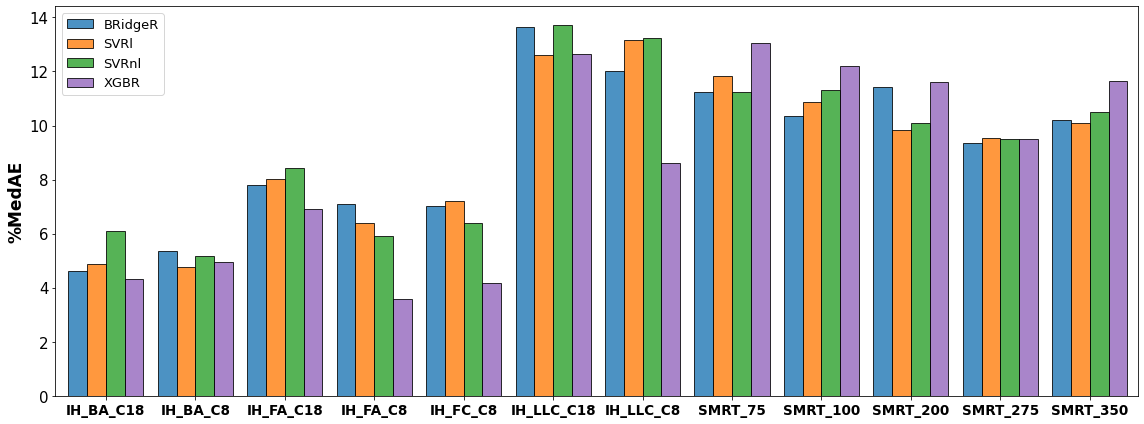

In [32]:
### Create Performance plots
da.comp_models_perf_matrices_plots(width=16, height=6, show_plot=True)

#### Store collected performance data to a single excel file and a separate image file for each metric-datasets' configuration combination

In [33]:
# Directory to store results
if not os.path.exists(res_mod_perf_dir):
    os.makedirs(res_mod_perf_dir)

In [34]:
# Collected performance data to single multisheet excel file
# Each sheet corresponds to a specific metric-datasets' configuration
ex_fn = 'Models_performance.xlsx'
ex_fn_lnk = os.path.join(res_mod_perf_dir, ex_fn)
da.export_dict_to_file(da.models_perf_matrices_dic, ex_fn_lnk, kl=1)

In [35]:
# Plots to individual image files
# Create a separate subdirectory
save_dir_n = 'Individual_models_performance_plots'
save_dir_lnk = os.path.join(res_mod_perf_dir, save_dir_n)
if not os.path.exists(save_dir_lnk):
    os.makedirs(save_dir_lnk)

for key in da.models_perf_plots_dic.keys():
    figure = da.models_perf_plots_dic[key]
    fig_fn = '%s_models_performance_plot.tiff' %key
    figure.savefig(os.path.join(save_dir_lnk, fig_fn), dpi=300, format='tiff', pil_kwargs={"compression": "tiff_lzw"})

In [36]:
# Raise error to terminate execution here
raise ValueError('End of program...')

ValueError: End of program...